# Importing External Libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import random
import pickle
import math
from operator import add
import torch
import torch.nn as nn
import pyphi
%matplotlib inline  
np.set_printoptions(threshold=sys.maxsize)

# Functions Setting Up ECA

Initial state function. If length of initial state is an even number, then insert "1" state in the middle.

In [20]:
def initial_state(width):
    initial = np.zeros((1, width), dtype=int)
    if width % 2 == 0:
        initial = np.insert(initial, int(width / 2), values=0, axis=1)
        initial[0, int(width / 2)] = 1
        return initial[0]
    else:
        initial[0, int(width / 2)] = 1
        return initial[0]

## Various Functions for ECA Rules

The first rule implemented is rule 30, given below. 

In [22]:
def rule30(array):
    row1 = array
    next_row = array.copy()
    for x in range(1, len(row1)-1):
        # Given cell state is "off", then update given the neighbors like - 
        if row1[x] == 0:
            if (row1[x-1] == 0) and (row1[x+1] == 0):
                next_row[x] = 0
                
            if (row1[x-1] == 0) and (row1[x+1] == 1):
                next_row[x] = 1
                
            if (row1[x-1] == 1) and (row1[x+1] == 0):
                next_row[x] = 1
                
            if (row1[x-1] == 1) and (row1[x+1] == 1):
                next_row[x] = 0
    
        # Given cell state is "on", then update given the neighbors like -   
        else:
            if (row1[x-1] == 0) and (row1[x+1] == 0):
                next_row[x] = 1
                
            if (row1[x-1] == 0) and (row1[x+1] == 1):
                next_row[x] = 1
                
            if (row1[x-1] == 1) and (row1[x+1] == 0):
                next_row[x] = 0
                
            if (row1[x-1] == 1) and (row1[x+1] == 1):
                next_row[x] = 0
        
    return np.array(next_row)

Add additional rules here!

In [144]:
def rule54(array):
    row1 = array
    next_row = array.copy()
    for x in range(1, len(row1)-1):
        # Given cell state is "off", then update given the neighbors like - 
        if row1[x] == 0:
            if (row1[x-1] == 0) and (row1[x+1] == 0):
                next_row[x] = 0
                
            if (row1[x-1] == 0) and (row1[x+1] == 1):
                next_row[x] = 1
                
            if (row1[x-1] == 1) and (row1[x+1] == 0):
                next_row[x] = 1
                
            if (row1[x-1] == 1) and (row1[x+1] == 1):
                next_row[x] = 1
    
        # Given cell state is "on", then update given the neighbors like -   
        else:
            if (row1[x-1] == 0) and (row1[x+1] == 0):
                next_row[x] = 1
                
            if (row1[x-1] == 0) and (row1[x+1] == 1):
                next_row[x] = 0
                
            if (row1[x-1] == 1) and (row1[x+1] == 0):
                next_row[x] = 0
                
            if (row1[x-1] == 1) and (row1[x+1] == 1):
                next_row[x] = 0
        
    return np.array(next_row)

In [6]:
def rule110(array):
    row1 = array
    next_row = array.copy()
    for x in range(1, len(row1)-1):
        # Given cell state is "off", then update given the neighbors like - 
        if row1[x] == 0:
            if (row1[x-1] == 0) and (row1[x+1] == 0):
                next_row[x] = 0
                
            if (row1[x-1] == 0) and (row1[x+1] == 1):
                next_row[x] = 1
                
            if (row1[x-1] == 1) and (row1[x+1] == 0):
                next_row[x] = 0
                
            if (row1[x-1] == 1) and (row1[x+1] == 1):
                next_row[x] = 1
    
        # Given cell state is "on", then update given the neighbors like -   
        else:
            if (row1[x-1] == 0) and (row1[x+1] == 0):
                next_row[x] = 1
                
            if (row1[x-1] == 0) and (row1[x+1] == 1):
                next_row[x] = 1
                
            if (row1[x-1] == 1) and (row1[x+1] == 0):
                next_row[x] = 1
                
            if (row1[x-1] == 1) and (row1[x+1] == 1):
                next_row[x] = 0
        
    return np.array(next_row)

In [7]:
def rule90(array):
    row1 = array
    next_row = array.copy()
    for x in range(1, len(row1)-1):
        # Given cell state is "off", then update given the neighbors like - 
        if row1[x] == 0:
            if (row1[x-1] == 0) and (row1[x+1] == 0):
                next_row[x] = 0
                
            if (row1[x-1] == 0) and (row1[x+1] == 1):
                next_row[x] = 1
                
            if (row1[x-1] == 1) and (row1[x+1] == 0):
                next_row[x] = 1
                
            if (row1[x-1] == 1) and (row1[x+1] == 1):
                next_row[x] = 0
    
        # Given cell state is "on", then update given the neighbors like -   
        else:
            if (row1[x-1] == 0) and (row1[x+1] == 0):
                next_row[x] = 0
                
            if (row1[x-1] == 0) and (row1[x+1] == 1):
                next_row[x] = 1
                
            if (row1[x-1] == 1) and (row1[x+1] == 0):
                next_row[x] = 1
                
            if (row1[x-1] == 1) and (row1[x+1] == 1):
                next_row[x] = 0
        
    return np.array(next_row)

In [8]:
def rule94(array):
    row1 = array
    next_row = array.copy()
    for x in range(1, len(row1)-1):
        # Given cell state is "off", then update given the neighbors like - 
        if row1[x] == 0:
            if (row1[x-1] == 0) and (row1[x+1] == 0):
                next_row[x] = 0
                
            if (row1[x-1] == 0) and (row1[x+1] == 1):
                next_row[x] = 1
                
            if (row1[x-1] == 1) and (row1[x+1] == 0):
                next_row[x] = 1
                
            if (row1[x-1] == 1) and (row1[x+1] == 1):
                next_row[x] = 0
    
        # Given cell state is "on", then update given the neighbors like -   
        else:
            if (row1[x-1] == 0) and (row1[x+1] == 0):
                next_row[x] = 1
                
            if (row1[x-1] == 0) and (row1[x+1] == 1):
                next_row[x] = 1
                
            if (row1[x-1] == 1) and (row1[x+1] == 0):
                next_row[x] = 1
                
            if (row1[x-1] == 1) and (row1[x+1] == 1):
                next_row[x] = 0
        
    return np.array(next_row)

## Automated Rule Function

In [23]:
def make_rule(integer):
    binary = str(bin(integer)[2:])
    
    if len(binary) < 8:
        binary = binary.zfill(8)
    
    def rule_function(array):
        row1 = array
        next_row = array.copy()
        for x in range(1, len(row1)-1):
                
            # Given cell state is "off", then update given the neighbors like - 
            if row1[x] == 0:
                if (row1[x-1] == 0) and (row1[x+1] == 0):
                    next_row[x] = int(binary[7])

                if (row1[x-1] == 0) and (row1[x+1] == 1):
                    next_row[x] = int(binary[6])

                if (row1[x-1] == 1) and (row1[x+1] == 0):
                    next_row[x] = int(binary[3])

                if (row1[x-1] == 1) and (row1[x+1] == 1):
                    next_row[x] = int(binary[2])

            # Given cell state is "on", then update given the neighbors like -   
            else:
                if (row1[x-1] == 0) and (row1[x+1] == 0):
                    next_row[x] = int(binary[5])

                if (row1[x-1] == 0) and (row1[x+1] == 1):
                    next_row[x] = int(binary[4])

                if (row1[x-1] == 1) and (row1[x+1] == 0):
                    next_row[x] = int(binary[1])

                if (row1[x-1] == 1) and (row1[x+1] == 1):
                    next_row[x] = int(binary[0])
                    
            next_row[0] = next_row[1]
            next_row[len(row1)-1] = next_row[len(row1)-2]

        return np.array(next_row)

    return rule_function

Text(0.5, 0, 'Cell Index')

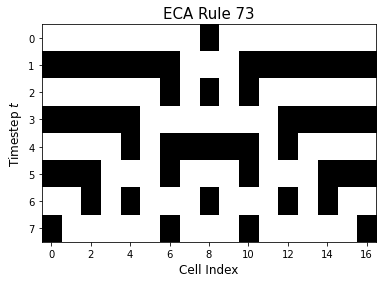

In [63]:
rule_function_blah = make_rule(73)

matrix = apply_rule(rule_function_blah, 8, False, 0, 0)

matrix[-1][0] = 1
matrix[-1][-1] = 1

plt.imshow(matrix, cmap='binary', aspect='auto')
plt.title('ECA Rule 73', fontsize=15)
plt.ylabel("Timestep $t$", fontsize=12)
plt.xlabel("Cell Index", fontsize=12)

In [10]:
# matrix_unperturb = apply_rule(rule_function_check, 300, False, 0, 0)

# matrix_unperturb_region_check = matrix_unperturb[0:40, 260:341]

# plt.imshow(matrix_unperturb_region_check, cmap='hot', aspect='auto')

## Increment Timestep Function (iterating the rule) *AND* Perturbation Function

If we mean to iterate the rule given an initial state 'n' times, then initial state must be **at least** 2\*n in length (padded with zeros). This is because the base of the Rule30 triangle is exactly 2n in length. We use (2\*n + 1) in the code to demark the boundary easier. 

The perturbation flips the state of a particular cell in the 1D array timestep (row).  

In [6]:
# NOTE: 'timestep' variable used to denote the timestep in which the perturbation will occur, and 'n' is the number of...
#... iterations performed by the ECA. 

def apply_rule(rule_function, n, perturbation_boolean, timestep, cell):
    ini_state = initial_state(2*n + 1)
    rv = []
    rv.append(ini_state)
    if perturbation_boolean == True:
        for i in range(1, n):
            if i == timestep:
                timestep_update = rule_function(ini_state)
                if timestep_update[cell] == 0:
                    timestep_update[cell] = 1
                else:
                    timestep_update[cell] = 0
                    
                rv.append(timestep_update)
                ini_state = timestep_update
                
            else:
                timestep_update = rule_function(ini_state)
                rv.append(timestep_update)
                ini_state = timestep_update
          
    else:
        for i in range(1, n):
            timestep_update = rule_function(ini_state)
            rv.append(timestep_update)
            ini_state = timestep_update
        
    return np.array(rv)

Measuring the deviation of timestep (*measurement_timestep*), after some previous timestep (*timestep*) perturbation, to the unperturbed case. We measure the deviation "distance" by counting the number of *incorrect* cells (if the cell does not match the unperturbed case) and dividing by the total state length. 

In [39]:
def differences(a, b):
    if len(a) != len(b):
        raise ValueError("Lists of different length.")
    return sum(i != j for i, j in zip(a, b))

In [12]:
# NOTE: 'measurement_timestep' variable denotes the timestep measured for the perturbed matrix. 

def deviation_distance(rule_function, n, timestep, cell, measurement_timestep):
    unperturbed_matrix = apply_rule(rule_function, n, False, 0, 0)
    perturbed_matrix = apply_rule(rule_function, n, True, timestep, cell)
    
    perturbed_state = perturbed_matrix[measurement_timestep]
    unperturbed_state = unperturbed_matrix[measurement_timestep]
    
    count = differences(perturbed_state, unperturbed_state)
    final_answer = count/len(perturbed_state)
    
    return final_answer    

In [15]:
deviation_distance(rule30, 300, 298, 300, 299)

0.0016638935108153079

## Plotting

### Rule 30.

In [20]:
print(apply_rule(rule30, 1, False, 0, 0))

[[0 1 0]]


Text(0.5, 0, 'Cell Index')

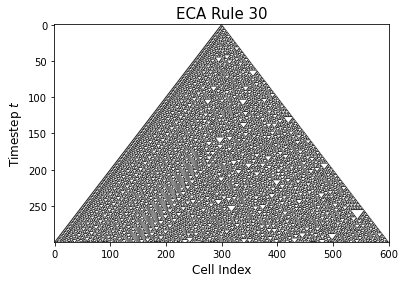

In [21]:
plt.imshow(apply_rule(rule30, 300, False, 0, 0), cmap='binary', aspect='auto')
plt.title('ECA Rule 30', fontsize=15)
plt.ylabel("Timestep $t$", fontsize=12)
plt.xlabel("Cell Index", fontsize=12)

Text(0.5, 0, 'Cell Index')

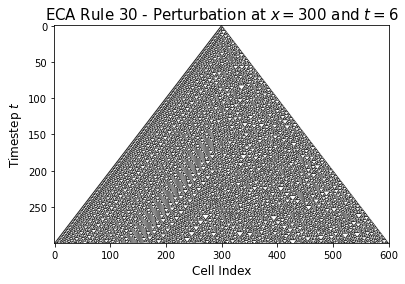

In [18]:
plt.imshow(apply_rule(rule30, 300, True, 6, 300), cmap='binary', aspect='auto')
plt.title('ECA Rule 30 - Perturbation at $x=300$ and $t=6$', fontsize=15)
plt.ylabel("Timestep $t$", fontsize=12)
plt.xlabel("Cell Index", fontsize=12)

### Rule54

Text(0.5, 0, 'Cell Index')

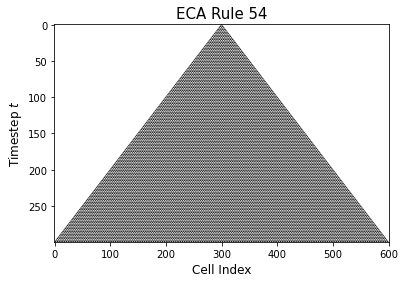

In [19]:
plt.imshow(apply_rule(rule54, 300, False, 0, 0), cmap='binary', aspect='auto')
plt.title('ECA Rule 54', fontsize=15)
plt.ylabel("Timestep $t$", fontsize=12)
plt.xlabel("Cell Index", fontsize=12)

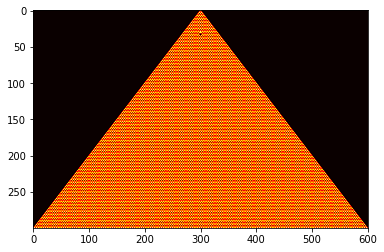

In [18]:
plt.imshow(apply_rule(rule54, 300, True, 30, 300), cmap='hot', aspect='auto')

### Rule110

Text(0.5, 0, 'Cell Index')

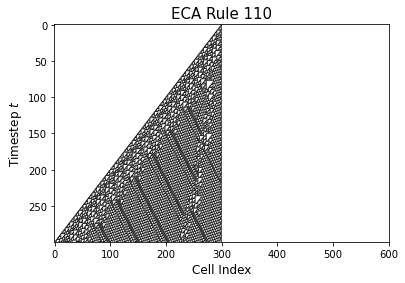

In [107]:
plt.imshow(apply_rule(rule110, 300, False, 0, 0), cmap='binary', aspect='auto')
plt.title('ECA Rule 110', fontsize=15)
plt.ylabel("Timestep $t$", fontsize=12)
plt.xlabel("Cell Index", fontsize=12)

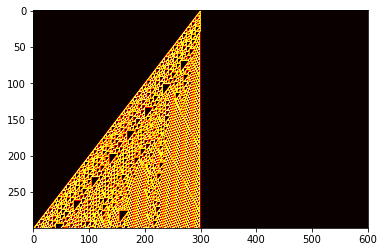

In [20]:
plt.imshow(apply_rule(rule110, 300, True, 30, 300), cmap='hot', aspect='auto')

### Rule90

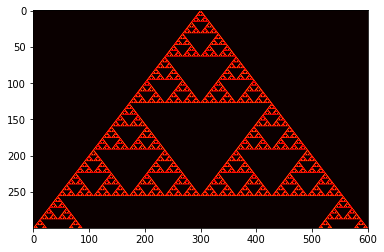

In [21]:
plt.imshow(apply_rule(rule90, 300, False, 0, 0), cmap='hot', aspect='auto')

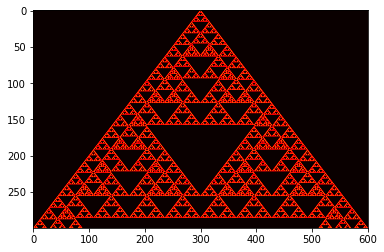

In [22]:
plt.imshow(apply_rule(rule90, 300, True, 30, 300), cmap='hot', aspect='auto')

### Rule94

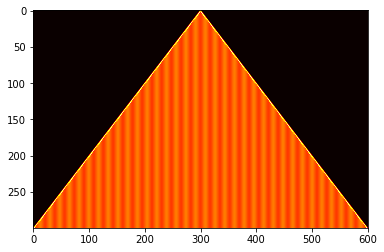

In [23]:
plt.imshow(apply_rule(rule94, 300, False, 0, 0), cmap='hot', aspect='auto')

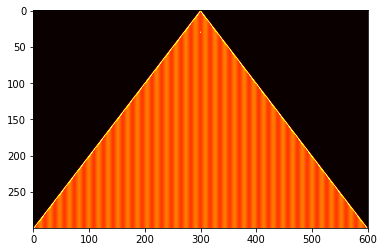

In [24]:
plt.imshow(apply_rule(rule94, 300, True, 30, 300), cmap='hot', aspect='auto')

# Functions Used For ECA Analysis

## Returning a Distribution of Deviation Distance

The question we are trying to tackle is the following: Can we predict anything about a timestep state 5 iterations away for a particular rule, or even 20 or 80, without directly computing the outcome? The evolution of this system is completely deterministic, but this does not eliminate the possibility of acquiring a probability distribution. This is due to the fact that the system is *chaotic* in nature **AND** exhibits emergent phenomena (look at the triangles). Think of the quintessential example of *chaotic* behavior with emergent phenomena, the weather. Even though the weather is a completely closed (not taking into account the injection of energy from external phenomena) and deterministic system, we still attribute a probability to particular weather patterns and emergent phenomena, i.e chance of rain or chance of snow. This is because it is nearly impossible to predict the weather a day (or a week) from now as the evolution of the weather system is extremely sensitive to its initial conditions. We get the famous, "*A butterfly flapping its wings can cause a hurricane*".

**TAKEN FROM WIKIPEDIA**: In chaos theory, the butterfly effect is the sensitive dependence on initial conditions in which a small change in one state of a deterministic nonlinear system can result in large differences in a later state. The term is closely associated with the work of mathematician and meteorologist Edward Lorenz. He noted that butterfly effect is derived from the metaphorical example of the details of a tornado (the exact time of formation, the exact path taken) being influenced by minor perturbations such as a distant butterfly flapping its wings several weeks earlier.

In a similar vein, ECA's exhibit this sensitivity to initial conditions. We need to associate a probability distribution to future states of this deterministic system. We do this by *collecting* examples of how a particular state will evolve under different perturbations around a cell. 

**In order to use IIT's consciousness measure, we need a cause-effect repertoire.**

In [13]:
def distribution(rule_function, n, timestep, around_cell, measurement_timestep, epsilon, trials):
    deviation_distance_list = []
    for i in range(trials):
        x = random.randint(-epsilon, epsilon)
        cell = around_cell + x
        
        deviation_distance_list.append(deviation_distance(rule_function, n, timestep, cell, measurement_timestep))
        
    return deviation_distance_list

In [23]:
# deviation_distance_list = distribution(rule30, 300, 290, 300, 299, 2, 20)
# deviation_distance_list.sort()

In [22]:
# dictionary_count_of_deviation = {i:deviation_distance_list.count(i) for i in deviation_distance_list}

We now have a dictionary where the keys are the *deviation distance* and the value of each key is the number of times that particular *deviation distance* got recorded at the *measurement_timestep*. Again, we get different *deviation distances* because we are perturbing around a cell. 

## Bar Chart

In [28]:
# blah = list(dict.fromkeys(deviation_distance_list))
# shortened_keys = [float(elem) for elem in ('%.5f' % elem for elem in blah)]

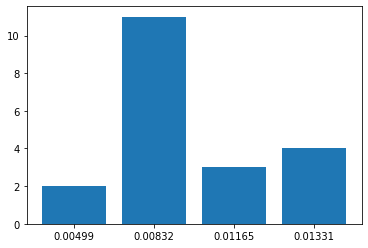

In [29]:
# plt.bar(range(len(dictionary_count_of_deviation)), list(dictionary_count_of_deviation.values()), align='center')
# plt.xticks(range(len(dictionary_count_of_deviation)), list(shortened_keys))


# plt.show()

## Probability Distribution

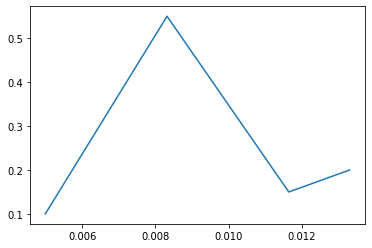

In [30]:
# lists = sorted(dictionary_count_of_deviation.items()) 
# x, y = zip(*lists) 

# y = np.array(y)/sum(list(y))

# plt.plot(x, y)
# plt.show()

**Probability Distribution Function**

In [24]:
# def prob_distribution(dictionary_count, title_string):
#     lists = sorted(dictionary_count.items()) 
#     x, y = zip(*lists) 

#     y = np.array(y)/sum(list(y))

#     plt.xlabel("Deviation Distance")
#     plt.ylabel("Probability")
#     plt.title(title_string)
#     plt.plot(x, y)
    
#     return plt.show()

## We acquire a handful of distributions by changing the cell location!

First let us modify the *distribution* function such that it incorporates sorting in ascending order and assigning a unique *probability/count* dictionary to different cell locations. We will do this by storing it as a **list of dictionaries**. 

In [14]:
def multiple_distributions(rule_function, n, timestep, around_cell_list, measurement_timestep, epsilon, trials):
    deviation_distance_list_list = []

    for j in range(len(around_cell_list)):
        deviation_distance_list = []
        
        for i in range(trials):
            x = random.randint(-epsilon, epsilon)
            cell = around_cell_list[j] + x
            deviation_distance_list.append(deviation_distance(rule_function, n, timestep, cell, measurement_timestep))
            
        deviation_distance_list.sort()
        dictionary_count_of_deviation = {i:deviation_distance_list.count(i) for i in deviation_distance_list}
        
        deviation_distance_list_list.append(dictionary_count_of_deviation)
            
    return deviation_distance_list_list

In [25]:
deviation_distance_list_list = multiple_distributions(rule30, 300, 290, [300, 200, 400], 299, 2, 20)

In [26]:
print(deviation_distance_list_list[0])
print(deviation_distance_list_list[1])
print(deviation_distance_list_list[2])

{0.004991680532445923: 5, 0.008319467554076539: 6, 0.011647254575707155: 2, 0.013311148086522463: 7}
{0.008319467554076539: 10, 0.009983361064891847: 2, 0.011647254575707155: 8}
{0.008319467554076539: 12, 0.013311148086522463: 3, 0.014975041597337771: 2, 0.019966722129783693: 3}


Now that we have multiple (three in this case, one for each particular cell) distributions of deviation distance based on repeated trials of random perturbations around a particular cell at timestep $t = 290$, we can plot each one as a probability distribution!

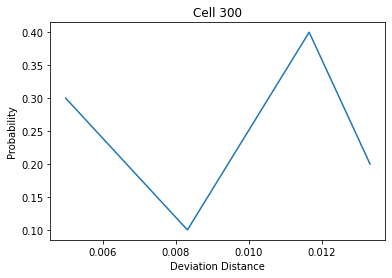

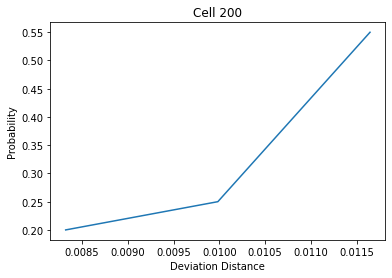

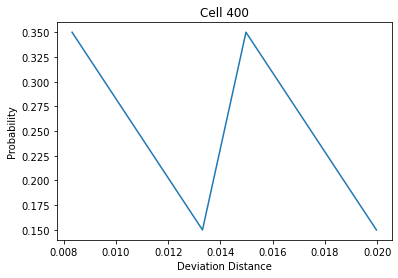

In [35]:
prob_distribution(deviation_distance_list_list[0], "Cell 300")
prob_distribution(deviation_distance_list_list[1], "Cell 200")
prob_distribution(deviation_distance_list_list[2], "Cell 400")

## Removing Trials and Naive Integrated Information

**Now, the repeated trials around a particular cell might not make too much sense since each unique perturbation will lead to the same deviation distance (exact same measurement timestep state). So why not just take only one datapoint of each unique perturbation around the cell? And instead of allowing perturbations of range $2$, let us limit this to range $1$ around the cell because the ECA rules only depend on immediate neighbors.**

In [24]:
def multiple_distributions_no_trials(rule_function, n, timestep, around_cell_list, measurement_timestep):
    deviation_distance_list_list = []
    x_list = [-1, 0, 1]

    for j in range(len(around_cell_list)):
        deviation_distance_list = []
        
        for i in range(3):
            x = x_list[i]
            cell = around_cell_list[j] + x
            deviation_distance_list.append(deviation_distance(rule_function, n, timestep, cell, measurement_timestep))
        
        deviation_distance_list_list.append(deviation_distance_list)
            
    return deviation_distance_list_list

In [25]:
around_cell_list = [200, 300, 400]
deviation_distance_list_list = multiple_distributions_no_trials(rule30, 300, 290, around_cell_list, 299)

In [26]:
print(deviation_distance_list_list[0])
print(deviation_distance_list_list[1])
print(deviation_distance_list_list[2])

[0.009983361064891847, 0.008319467554076539, 0.011647254575707155]
[0.004991680532445923, 0.013311148086522463, 0.011647254575707155]
[0.008319467554076539, 0.014975041597337771, 0.019966722129783693]


Since we simply have one datapoint for each unique perturbation around a particular cell, it would not make sense to plot a probability distribution of the deviation distance likelihood as they would all be $33.3$%. **In a naive sense, we can take the average deviation distance** of each unique perturbation around a particular cell and ascribe that value to the particular cell in question. 

**Averaging Function**

In [23]:
def average_deviation_given_list(deviation_distance_list_list, around_cell_list):
    
    average_deviation_list = []
    
    for i in range(len(around_cell_list)):
        average = sum(deviation_distance_list_list[i])/3
        average_deviation_list.append(average)
    
    return average_deviation_list

In [214]:
average_deviation_given_list(deviation_distance_list_list, around_cell_list)

[0.009983361064891847, 0.009983361064891847, 0.014420410427066002]

**Plotting Function for Average**

In [44]:
def plot_for_average(average_list, around_cell_list, title_string, x_string, y_string):

    plt.style.use('ggplot')
    x = around_cell_list
    x_pos = [i for i, _ in enumerate(x)]
    y = average_list

    fig = plt.figure(figsize=(12,4))
    plt.bar(x_pos, y, color='green')
    plt.xlabel(x_string)
    plt.ylabel(y_string)
    plt.title(title_string)

    plt.xticks(x_pos, x)
  

    return plt.show()

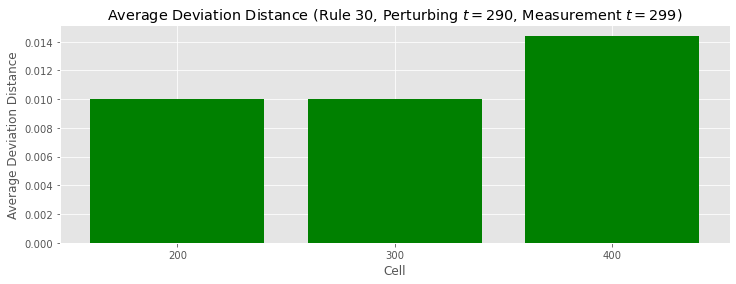

In [27]:
average_list = average_deviation_given_list(deviation_distance_list_list, around_cell_list)
plot_for_average(average_list, around_cell_list, "Average Deviation Distance (Rule 30, Perturbing $t=290$, Measurement $t=299$)", "Cell", "Average Deviation Distance")

This is obviously a very naive way of quantifying the change in the measurement timestep $t = 299$ given a cell perturbation at timestep $t = 290$. For one, the measurement timestep $t = 299$ can be vastly different between perturbations around **different** cells but still have the same deviation distance. And we lose the nuances in the exactitude of how the deviation distances change with specific perturbations. **How can this help us in our broader investigation of emergent phenomena in various ECA's, and how can we use IIT/Machine Learning from this basis to connect the two?** Before we answer that pertinent question, let us plot this distribution in its entirety to see if we can retrieve any valuable information from it. 

In [220]:
# around_cell_list = [i for i in range(100, 501, 20)]
# print(around_cell_list)

[100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500]


In [221]:
# deviation_distance_list_list = multiple_distributions_no_trials(rule30, 300, 290, around_cell_list, 299)

In [222]:
# average_list = average_deviation_given_list(deviation_distance_list_list, around_cell_list)

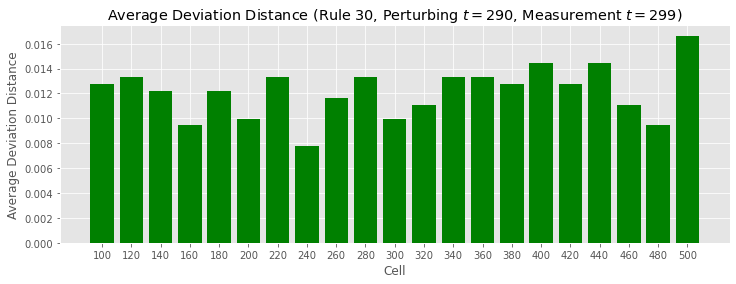

In [224]:
# plot_for_average(average_list, around_cell_list, "Average Deviation Distance (Rule 30, Perturbing $t = 290$, Measurement $t = 299$)", "Cell", "Average Deviation Distance")

# Comparing Measurement Timesteps

Let us compare the change in deviation distance between measurement timesteps, still perturbing $+1$, $0$ and $-1$ around the cells, using the list of cells stated below.

In [225]:
# around_cell_list = [i for i in range(100, 501, 20)]
# print(around_cell_list)

[100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500]


Let us sequentially plot the deviation distance for every measurement timestep after $t = 290$ and see if we can extrapolate some pattern. Again, any insight given by these graphs are extremely naive because we are using the average deviation distance measured at the measurement timestep given a perturbation of a cell at time $t$. Nothing more than that. **If we can extrapolate some notion of macroscopic emergence from this, then we can use IIT's (small)phi and (big)Phi measures of consciousness to see if there is a correspondence between these measures and emergence.**

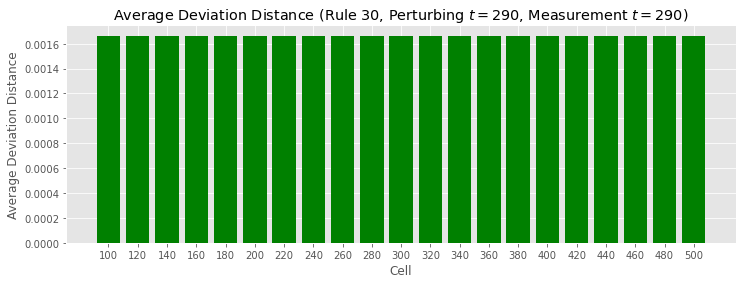

In [230]:
# deviation_distance_list_list = multiple_distributions_no_trials(rule30, 300, 290, around_cell_list, 290)
# average_list = average_deviation_given_list(deviation_distance_list_list, around_cell_list)
# plot_for_average(average_list, around_cell_list, "Average Deviation Distance (Rule 30, Perturbing $t = 290$, Measurement $t = 290$)", "Cell", "Average Deviation Distance")

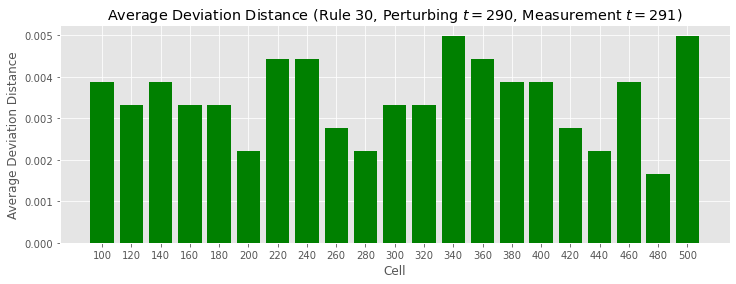

In [232]:
# deviation_distance_list_list = multiple_distributions_no_trials(rule30, 300, 290, around_cell_list, 291)
# average_list = average_deviation_given_list(deviation_distance_list_list, around_cell_list)
# plot_for_average(average_list, around_cell_list, "Average Deviation Distance (Rule 30, Perturbing $t = 290$, Measurement $t = 291$)", "Cell", "Average Deviation Distance")

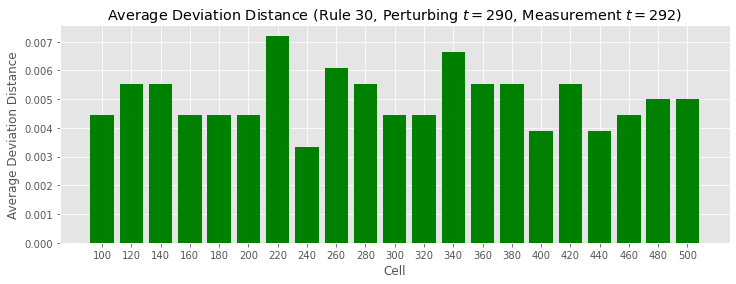

In [233]:
# deviation_distance_list_list = multiple_distributions_no_trials(rule30, 300, 290, around_cell_list, 292)
# average_list = average_deviation_given_list(deviation_distance_list_list, around_cell_list)
# plot_for_average(average_list, around_cell_list, "Average Deviation Distance (Rule 30, Perturbing $t = 290$, Measurement $t = 292$)", "Cell", "Average Deviation Distance")

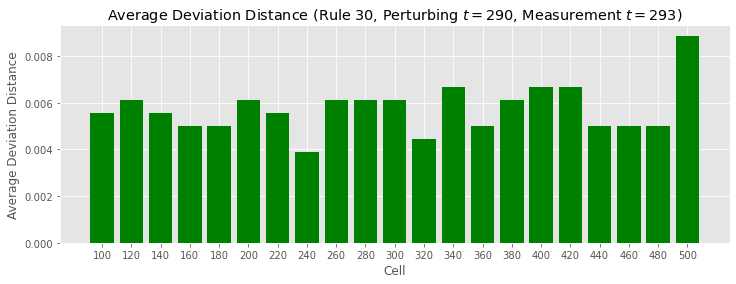

In [234]:
# deviation_distance_list_list = multiple_distributions_no_trials(rule30, 300, 290, around_cell_list, 293)
# average_list = average_deviation_given_list(deviation_distance_list_list, around_cell_list)
# plot_for_average(average_list, around_cell_list, "Average Deviation Distance (Rule 30, Perturbing $t = 290$, Measurement $t = 293$)", "Cell", "Average Deviation Distance")

In [52]:
# deviation_distance_list_list = multiple_distributions_no_trials(rule30, 300, 290, around_cell_list, 294)
# average_list = average_deviation_given_list(deviation_distance_list_list, around_cell_list)
# plot_for_average(average_list, around_cell_list, "Rule 30, Perturbing $t = 290$, Measurement Timestep $t = 294$", "Cell", "Deviation Distance")

In [53]:
# deviation_distance_list_list = multiple_distributions_no_trials(rule30, 300, 290, around_cell_list, 295)
# average_list = average_deviation_given_list(deviation_distance_list_list, around_cell_list)
# plot_for_average(average_list, around_cell_list, "Rule 30, Perturbing $t = 290$, Measurement Timestep $t = 295$", "Cell", "Deviation Distance")

In [54]:
# deviation_distance_list_list = multiple_distributions_no_trials(rule30, 300, 290, around_cell_list, 296)
# average_list = average_deviation_given_list(deviation_distance_list_list, around_cell_list)
# plot_for_average(average_list, around_cell_list, "Rule 30, Perturbing $t = 290$, Measurement Timestep $t = 296$", "Cell", "Deviation Distance")

In [55]:
# deviation_distance_list_list = multiple_distributions_no_trials(rule30, 300, 290, around_cell_list, 297)
# average_list = average_deviation_given_list(deviation_distance_list_list, around_cell_list)
# plot_for_average(average_list, around_cell_list, "Rule 30, Perturbing $t = 290$, Measurement Timestep $t = 297$", "Cell", "Deviation Distance")

In [56]:
# deviation_distance_list_list = multiple_distributions_no_trials(rule30, 300, 290, around_cell_list, 298)
# average_list = average_deviation_given_list(deviation_distance_list_list, around_cell_list)
# plot_for_average(average_list, around_cell_list, "Rule 30, Perturbing $t = 290$, Measurement Timestep $t = 298$", "Cell", "Deviation Distance")

In [57]:
# deviation_distance_list_list = multiple_distributions_no_trials(rule30, 300, 290, around_cell_list, 299)
# average_list = average_deviation_given_list(deviation_distance_list_list, around_cell_list)
# plot_for_average(average_list, around_cell_list, "Rule 30, Perturbing $t = 290$, Measurement Timestep $t = 299$", "Cell", "Deviation Distance")

A couple points of immediate notice:

> The first being that the average deviation distance increases the larger the measurement timestep. This is fairly obvious and makes sense. Since the system is chaotic, i.e sensitive to initial conditions, the earlier the perturbations the larger the deviation at a later timestep will be. This is analogous to the double pendulum scenario. 

> The second and more interesting observation is that there is a significant jump in deviation distance between measurement timestep $292$ and $293$ given a perturbation around and including cell $500$ at timestep $290$. This suggests that there is a massive difference between the unperturbed case and the perturbed case. If there is a massive difference, then this suggests that the perturbation occurred in a symmetric large-scale structure, one that might be characterized as a **emergent** structure. **You may wonder** why timestep $291$ does not show an immediate increase in deviation distance. That is because the ripple in the emergent structure did not have enough time to propagate. 

Below a zoom-in of the large triangular structure in the unpeturbed case and the change/destruction of the large-scale structure in the perturbed case. **Ignore the axes please.** But for reference, notice the bottom of an inverted black triangle in the unperturbed case (large-scale structure). The perturbation happens at y-axis $1$ and turns a black cell to a white cell.  

(291.0, 286.0)

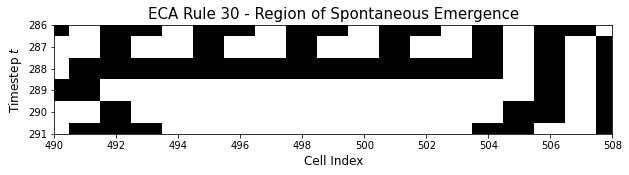

In [107]:
matrix_perturb = apply_rule(rule30, 300, True, 290, 501)
matrix_unperturb = apply_rule(rule30, 300, False, 0, 0)

matrix_unperturb[289][492:506]

# matrix_perturb_region_check = matrix_perturb[289:300, 490:510]
# matrix_unperturb_region_check = matrix_unperturb[289:300, 490:510]

plt.figure(figsize = (10,2))
plt.imshow(matrix_unperturb, cmap='binary', aspect='auto')
plt.title('ECA Rule 30 - Region of Spontaneous Emergence', fontsize=15)
plt.ylabel("Timestep $t$", fontsize=12)
plt.xlabel("Cell Index", fontsize=12)
plt.xlim([490, 508])
plt.ylim([291, 286])

(299.0, 285.0)

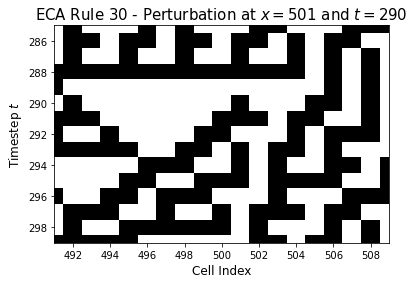

In [37]:
plt.imshow(matrix_perturb, cmap='binary', aspect='auto')
plt.title('ECA Rule 30 - Perturbation at $x=501$ and $t=290$', fontsize=15)
plt.ylabel("Timestep $t$", fontsize=12)
plt.xlabel("Cell Index", fontsize=12)
plt.xlim([491, 509])
plt.ylim([299, 285])

This ultimately suggests that cell $500$ at timestep $290$ contains more vital information for the *correct*/unperturbed continuation of rule 30. That would mean that if we were to base a machine learning model to predict what rule we're witnessing in the unperturbed case given the same initial condition, this particular cell would be a useful/appropriate check for rule 30. Or in other words, contains valuable integrated information. 

(299.0, 285.0)

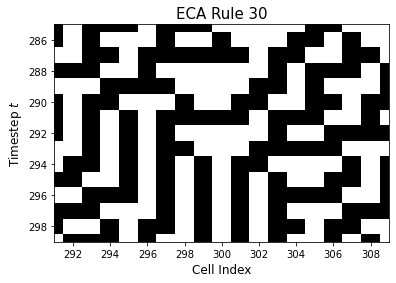

In [28]:
matrix_perturb = apply_rule(rule30, 300, True, 290, 300)
matrix_unperturb = apply_rule(rule30, 300, False, 0, 0)

# matrix_perturb_region_check = matrix_perturb[289:300, 290:310]
# matrix_unperturb_region_check = matrix_unperturb[289:300, 290:310]

plt.imshow(matrix_unperturb, cmap='binary', aspect='auto')
plt.title('ECA Rule 30', fontsize=15)
plt.ylabel("Timestep $t$", fontsize=12)
plt.xlabel("Cell Index", fontsize=12)
plt.xlim([291, 309])
plt.ylim([299, 285])

(299.0, 285.0)

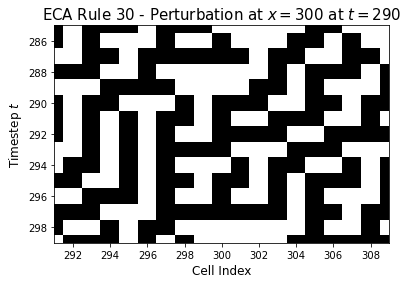

In [29]:
plt.imshow(matrix_perturb, cmap='binary', aspect='auto')
plt.title('ECA Rule 30 - Perturbation at $x=300$ at $t=290$', fontsize=15)
plt.ylabel("Timestep $t$", fontsize=12)
plt.xlabel("Cell Index", fontsize=12)
plt.xlim([291, 309])
plt.ylim([299, 285])

Text(0.5, 0, 'Cell Index')

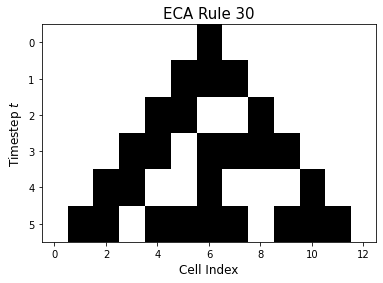

In [186]:
matrix_perturb = apply_rule(rule30, 6, True, 2, 6)
matrix_unperturb = apply_rule(rule30, 6, False, 0, 0)

# matrix_perturb_region_check = matrix_perturb[250:270, 530:570]
# matrix_unperturb_region_check = matrix_unperturb[230:290, 510:590]

plt.imshow(matrix_unperturb, cmap='binary', aspect='auto')
plt.title('ECA Rule 30', fontsize=15)
plt.ylabel("Timestep $t$", fontsize=12)
plt.xlabel("Cell Index", fontsize=12)
# plt.xlim([510, 590])
# plt.ylim([290, 230])

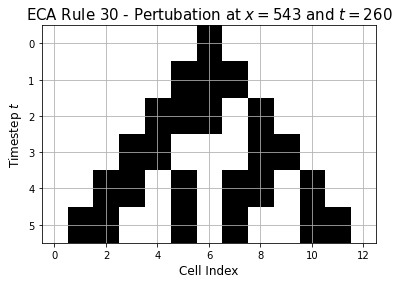

In [184]:
plt.imshow(matrix_perturb, cmap='binary', aspect='auto')
plt.title('ECA Rule 30 - Pertubation at $x=543$ and $t=260$', fontsize=15)
plt.ylabel("Timestep $t$", fontsize=12)
plt.xlabel("Cell Index", fontsize=12)
plt.grid()
# plt.xlim([0, 12])
# plt.ylim([5, 4])

# Comparing a Single Cell Perturbation Across Measurement Timesteps

It would be also interesting to illustrate the change in deviation distance for a particular perturbation at timestep $t$ across multiple measurement timesteps in a single graph. We shall implement this below. 

In [43]:
def deviation_distanceS(rule_function, n, timestep, cell, up_to_measurement_timesteps):
    unperturbed_matrix = apply_rule(rule_function, n, False, 0, 0)
    perturbed_matrix = apply_rule(rule_function, n, True, timestep, cell)
    final_answer_list = []
    
    for i in range(timestep, up_to_measurement_timesteps):
        
        perturbed_state = perturbed_matrix[i]
        unperturbed_state = unperturbed_matrix[i]

        count = differences(perturbed_state, unperturbed_state)
        final_answer = count/len(perturbed_state)
        final_answer_list.append(final_answer)
    
    return final_answer_list

In [42]:
def single_perturbation_multiple_timesteps(rule_function, n, timestep, around_cell, up_to_measurement_timesteps):
    deviation_distance_list_list = [0, 0, 0]
    average_list = []
    x_list = [-1, 0, 1]

    for i in range(3):
        x = x_list[i]
        cell = around_cell + x
        deviation_distance_list = deviation_distanceS(rule_function, n, timestep, cell, up_to_measurement_timesteps)
        deviation_distance_list_list[i] = deviation_distance_list
        
    
    for j in range(len(deviation_distance_list)):
        average_list.append(deviation_distance_list_list[0][j] + deviation_distance_list_list[1][j] + deviation_distance_list_list[2][j])
    
    average_list = np.array(average_list)/3
    average_list.tolist()
     
    return average_list

In [50]:
measurement_timestep_list = [i for i in range(290, 300)]

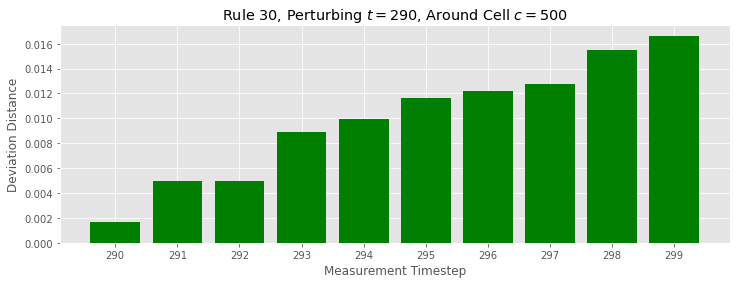

In [51]:
average_list = single_perturbation_multiple_timesteps(rule30, 300, 290, 500, 300)
plot_for_average(average_list, measurement_timestep_list, "Rule 30, Perturbing $t = 290$, Around Cell $c = 500$", "Measurement Timestep", "Deviation Distance")

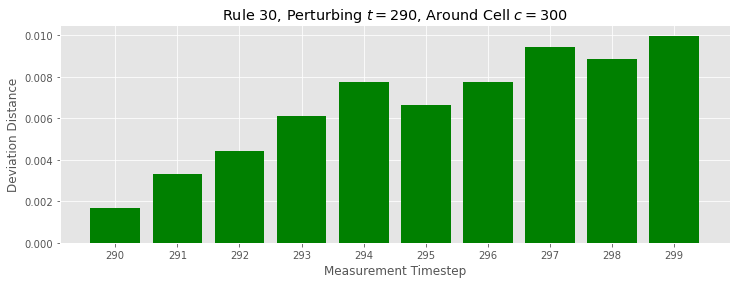

In [52]:
average_list = single_perturbation_multiple_timesteps(rule30, 300, 290, 300, 300)
plot_for_average(average_list, measurement_timestep_list, "Rule 30, Perturbing $t = 290$, Around Cell $c = 300$", "Measurement Timestep", "Deviation Distance")

In [53]:
measurement_timestep_list = [i for i in range(260, 275)]

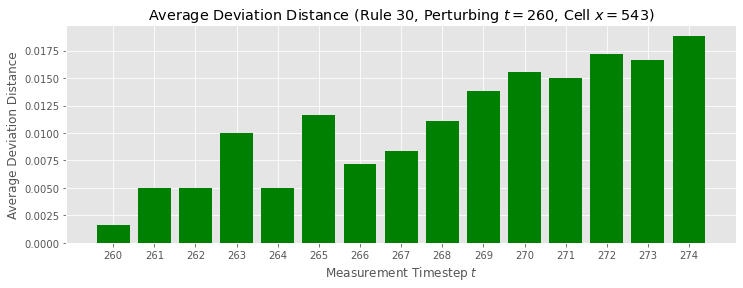

In [55]:
average_list = single_perturbation_multiple_timesteps(rule30, 300, 260, 543, 275)
plot_for_average(average_list, measurement_timestep_list, "Average Deviation Distance (Rule 30, Perturbing $t = 260$, Cell $x = 543$)", "Measurement Timestep $t$", "Average Deviation Distance")

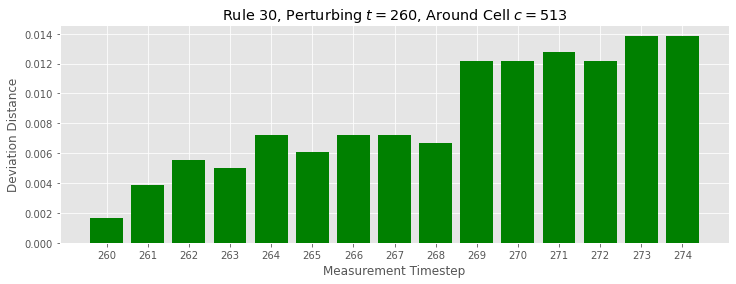

In [71]:
average_list = single_perturbation_multiple_timesteps(rule30, 300, 260, 513, 275)
plot_for_average(average_list, measurement_timestep_list, "Rule 30, Perturbing $t = 260$, Around Cell $c = 513$", "Measurement Timestep", "Deviation Distance")

# Implementing The Voted Perceptron (Proof of Concept)

Again, the **preliminary motivation** for this thesis would be to implement a machine learning model (various models if time permits) to see if we can predict whether or not a perturbation happened at time $t$ within an emergent structure simply by looking at the progression of deviation distances till the measurement timestep $t+n$. After we implement the machine learning model, we can perform IIT analysis on the model/ECA to quantify various IIT metrics and evaluate the computational complexity or likelihood of emergence in a particular ECA.

## Label of Datapoint, Perturbation in Emergent Structure or Not? 

First, we need to gather our training dataset. We need an automated method of checking whether or not a perturbation happened within an emergent structure and storing the progression of deviation distances. We will assign a value of 1 if the perturbation happened in an emergent structure (0 otherwise). How will we automate this process? **Well, let us say that a perturbation occurred in an emergent structure if 75% of the cells within a 5x5 block (with the perturbation in the center) are the same value.**

In [56]:
def check_emergence(rule_function, n, timestep, cell):
    cell_one_number = 0
    matrix_unperturb = apply_rule(rule_function, n, False, 0, 0)
    
    value_holder = matrix_unperturb[timestep, cell]
    matrix_unperturb[timestep, cell] = 2
    submatrix = matrix_unperturb[timestep-2:timestep+3, cell-2:cell+3]
    
    #matrix_unperturb_region_check = matrix_unperturb[(timestep-10):(timestep+10), (cell-10):(cell+10)]
    
    for row in submatrix:
        for cell in row:
            if cell == 1:
                cell_one_number += 1
    
    if cell_one_number >= (.75 * 24) or cell_one_number <= (.25 * 24):
        emergence_guess = 1
    else:
        emergence_guess = 0

    matrix_unperturb[timestep, cell] = value_holder    
    
    #plt.imshow(matrix_unperturb_region_check, cmap='hot', aspect='auto')
    
    return emergence_guess

In [57]:
check_emergence(rule30, 300, 260, 543)

1

Below is a function that collects training data. A single *datapoint* 

In [58]:
def collect_training_data(rule_function, n, num_of_datapoints):
    
    training_data_list = []
    
    for i in range(num_of_datapoints):
        
        list_for_datapoint = []
        
        if i%10 == 0:
            print(i)
            
        timestep = random.randint(4, n-1)
        
        if timestep >= (n-15):
            continue
            
        around_cell = random.randint(n-timestep, n+timestep)
        up_to_measurement_timesteps = timestep + 15
        emergence_guess = check_emergence(rule_function, n, timestep, around_cell)
        if emergence_guess == 1:
            print("Got one!")
        
        if len(training_data_list) > 100 and emergence_guess == 0:
            continue
            
        average_list = single_perturbation_multiple_timesteps(rule_function, n, timestep, around_cell, up_to_measurement_timesteps)
        
        list_for_datapoint.append(average_list)
        list_for_datapoint.append(emergence_guess)
        list_for_datapoint.append(timestep)
        list_for_datapoint.append(around_cell)
        
        training_data_list.append(list_for_datapoint)
    
    return training_data_list

In [75]:
# training_data_list = collect_training_data(rule30, 300, 20000)

# with open("Saved_Training_Data.txt", "wb") as fp:   #Pickling
#     pickle.dump(training_data_list, fp)

In [49]:
count = 0

with open("Saved_Training_Data.txt", "rb") as fp:   # Unpickling
    training_data = pickle.load(fp)
    
for item in training_data:
    if item[1] == 0:
        count += 1
        
print(count)

101


## Voted Perceptron 

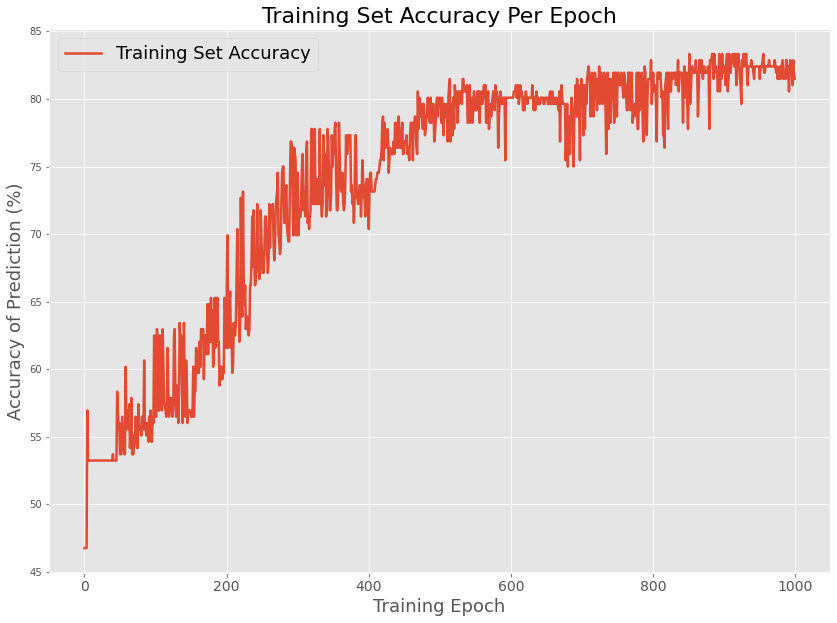

Highest Training Accuracy = 83.33333333333334
The epoch for which these values were obtained = 955


In [60]:
### = Main Section/Comment
# = Sub Section/Comment

###Initializing variables.
#Initialized weight vector.
w = np.zeros(len(training_data[0][0])) 

#Vote count and y_prime.
c = 0
y_prime = int

#Updated c*w.
voteWeightVector = 0 

#Lists for keeping count of the accuracy.
lforTrain = np.zeros(len(training_data))
# lforVal = np.zeros(len(validation_data))

#Counts for accuracy check.
countforTrain = 0 
countforValid = 0
prediction = 0 
accTrain = 0 
accValid = 0
previousaccTrain = 0
previousaccVal = 0
matchTrain = 0
matchVal = 0 
epochcount = 0
epochcountVal = 0
plotlistTrain = []
plotlistValid = []
xlist = []

###Used to train the Voted Perceptron to convergence.
for epoch in range(1000):

  countforTrain = 0
  countforValid = 0 
  voteWeightVector = 0

  ###The Voted Perceptron algorithm, with 0(1) memory.
  for i in range(len(training_data)):

    #Activation function.
    if np.dot(w, training_data[i][0]) >= 0:
        y_prime = 1
    else:
        y_prime = 0

    #Vote count.
    if y_prime == training_data[i][1]:
        c += 1

    #If y_prime guess is incorrect, then w*c is updated.
    else:
        voteWeightVector += np.dot(w, c)

        c = 1
        signSwitch = [element * (training_data[i][1] - y_prime) for element 
                     in training_data[i][0]]
        w = list(map(add, w, signSwitch))
  
  #Updating the w*c again. Making sure latest w and number
  #...of votes gets accounted for. 
  voteWeightVector += np.dot(w, c)

  ###Training Set - Making a prediction and accuracy count for epoch.
  for k in range(len(training_data)):
    if np.dot(voteWeightVector, training_data[k][0]) >= 0:
      lforTrain[k] = 1
    else:
      lforTrain[k] = 0
    if lforTrain[k] == training_data[k][1]:
      countforTrain += 1
  accTrain = (countforTrain/len(training_data)) * 100

#   ###Validation Set - Making a prediction and accuracy count for epoch.
#   for k in range(len(validation_data)):
#     if np.dot(voteWeightVector, validation_data[k][0]) >= 0:
#       lforVal[k] = 1
#     else:
#       lforVal[k] = 0
#     if lforVal[k] == validation_data[k][1]:
#       countforValid += 1
#   accValid = (countforValid/len(validation_data)) * 100

  ###Lists for plotting training/validation set accuracy per epoch.
  plotlistTrain.append(accTrain)
#   plotlistValid.append(accValid)

  #List for x-axis in plot.
  xlist.append(epoch)

  ###Keeping track of the epoch which has highest training accuracy.
  if accTrain >= previousaccTrain:
    previousaccTrain = accTrain
    matchTrain = accTrain
    epochcount = epoch
    
#   ###Keeping track of the epoch which has highest validation accuracy.
#   if accValid >= previousaccVal:
#     previousaccVal = accValid
#     matchVal = accValid
#     epochcountVal = epoch
  
###Calling the plot.
plt.figure(figsize=(14,10))
plt.plot(xlist, plotlistTrain, label='Training Set Accuracy', lw=2.5)
# plt.plot(xlist, plotlistValid, label='Validation Set Accuracy', lw=2.5)
plt.xticks(fontsize=14)
plt.title('Rule 30 - Training Set Accuracy Per Epoch', fontsize=22)
plt.xlabel('Training Epoch', fontsize=18)
plt.ylabel('Accuracy of Prediction (%)', fontsize=18)
plt.legend(fontsize=18)
plt.savefig("ValidSetAccuracyVotedPerceptron.png", bbox_inches="tight")
plt.show()

###Prints the highest validation set accuracy, the corresponding...
#... training accuracy and the epoch.
print("Highest Training Accuracy =", matchTrain)
print("The epoch for which these values were obtained =", epochcount)
# print("Highest Validation Accuracy =", matchVal)
# print("The epoch for which these values were obtained =", epochcountVal)

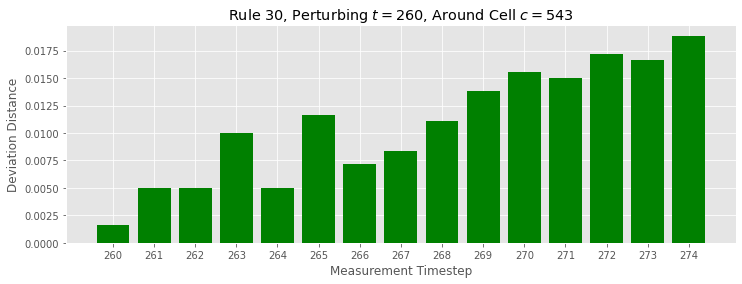

In [78]:
average_list = single_perturbation_multiple_timesteps(rule30, 300, 260, 543, 275)
plot_for_average(average_list, measurement_timestep_list, "Rule 30, Perturbing $t = 260$, Around Cell $c = 543$", "Measurement Timestep", "Deviation Distance")

In [62]:
if np.dot(voteWeightVector, average_list) >= 0:
    guess = 1
else:
    guess = 0

print(guess)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [80]:
# validation_data_list = collect_training_data(rule30, 300, 10000)

# with open("Saved_Validation_Data.txt", "wb") as pf:   #Pickling
#     pickle.dump(validation_data_list, pf)

In [51]:
with open("Saved_Validation_Data.txt", "rb") as pf:   # Unpickling
    validation_data = pickle.load(pf)
    
print(validation_data[0])

[array([0.00166389, 0.00332779, 0.00499168, 0.00554631, 0.00776484,
       0.0088741 , 0.00942873, 0.01053799, 0.01331115, 0.0177482 ,
       0.01552967, 0.01552967, 0.01996672, 0.01996672, 0.02273988]), 0, 212, 89]


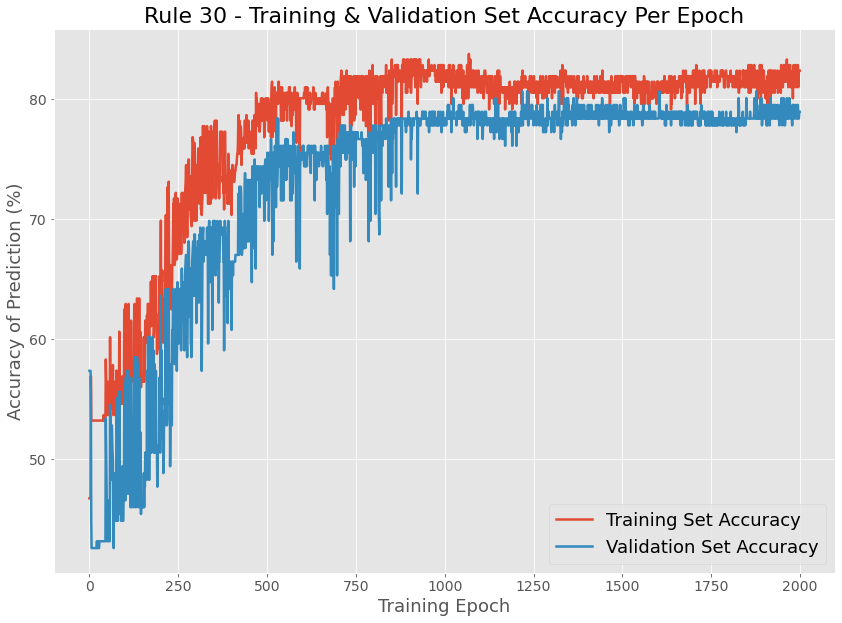

Highest Training Accuracy = 83.79629629629629
The epoch for which these values were obtained = 1068
Highest Validation Accuracy = 80.68181818181817
The epoch for which these values were obtained = 1877


In [52]:
### = Main Section/Comment
# = Sub Section/Comment

###Initializing variables.
#Initialized weight vector.
w = np.zeros(len(training_data[0][0])) 

#Vote count and y_prime.
c = 0
y_prime = int

#Updated c*w.
voteWeightVector = 0 

#Lists for keeping count of the accuracy.
lforTrain = np.zeros(len(training_data))
lforVal = np.zeros(len(validation_data))

#Counts for accuracy check.
countforTrain = 0 
countforValid = 0
prediction = 0 
accTrain = 0 
accValid = 0
previousaccTrain = 0
previousaccVal = 0
matchTrain = 0
matchVal = 0 
epochcount = 0
epochcountVal = 0
plotlistTrain = []
plotlistValid = []
xlist = []
curious_list = []

###Used to train the Voted Perceptron to convergence.
for epoch in range(2000):

  countforTrain = 0
  countforValid = 0 
  voteWeightVector = 0
  curious_list = []

  ###The Voted Perceptron algorithm, with 0(1) memory.
  for i in range(len(training_data)):

    #Activation function.
    if np.dot(w, training_data[i][0]) >= 0:
        y_prime = 1
    else:
        y_prime = 0

    #Vote count.
    if y_prime == training_data[i][1]:
        c += 1

    #If y_prime guess is incorrect, then w*c is updated.
    else:
        voteWeightVector += np.dot(w, c)

        c = 1
        signSwitch = [element * (training_data[i][1] - y_prime) for element 
                     in training_data[i][0]]
        w = list(map(add, w, signSwitch))
  
  #Updating the w*c again. Making sure latest w and number
  #...of votes gets accounted for. 
  voteWeightVector += np.dot(w, c)

  ###Training Set - Making a prediction and accuracy count for epoch.
  for k in range(len(training_data)):
    if np.dot(voteWeightVector, training_data[k][0]) >= 0:
      lforTrain[k] = 1
    else:
      lforTrain[k] = 0
    if lforTrain[k] == training_data[k][1]:
      countforTrain += 1
  accTrain = (countforTrain/len(training_data)) * 100

  ###Validation Set - Making a prediction and accuracy count for epoch.
  for k in range(len(validation_data)):
    if np.dot(voteWeightVector, validation_data[k][0]) >= 0:
        lforVal[k] = 1
    else:
        lforVal[k] = 0
    if lforVal[k] == validation_data[k][1]:
        countforValid += 1
    elif lforVal[k] == 1 and validation_data[k][1] == 0:
        curious_list.append(k)
  accValid = (countforValid/len(validation_data)) * 100

  ###Lists for plotting training/validation set accuracy per epoch.
  plotlistTrain.append(accTrain)
  plotlistValid.append(accValid)

  #List for x-axis in plot.
  xlist.append(epoch)

  ###Keeping track of the epoch which has highest training accuracy.
  if accTrain >= previousaccTrain:
    previousaccTrain = accTrain
    matchTrain = accTrain
    epochcount = epoch
    
  ###Keeping track of the epoch which has highest validation accuracy.
  if accValid >= previousaccVal:
    previousaccVal = accValid
    matchVal = accValid
    epochcountVal = epoch
  
###Calling the plot.
plt.figure(figsize=(14,10))
plt.plot(xlist, plotlistTrain, label='Training Set Accuracy', lw=2.5)
plt.plot(xlist, plotlistValid, label='Validation Set Accuracy', lw=2.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Rule 30 - Training & Validation Set Accuracy Per Epoch', fontsize=22)
plt.xlabel('Training Epoch', fontsize=18)
plt.ylabel('Accuracy of Prediction (%)', fontsize=18)
plt.legend(fontsize=18)
plt.savefig("ValidSetAccuracyVotedPerceptron.png", bbox_inches="tight")
plt.show()

###Prints the highest validation set accuracy, the corresponding...
#... training accuracy and the epoch.
print("Highest Training Accuracy =", matchTrain)
print("The epoch for which these values were obtained =", epochcount)
print("Highest Validation Accuracy =", matchVal)
print("The epoch for which these values were obtained =", epochcountVal)

[1, 9, 14, 16, 17, 18, 21, 25, 27, 28, 30, 31, 32, 41, 47, 51, 52, 54, 60, 62, 63, 65, 70, 71, 74, 77, 87, 89, 91, 98, 100]
144 370


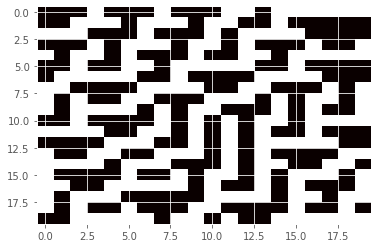

In [83]:
print(curious_list)
print(validation_data[1][2], validation_data[1][3])

matrix_perturb = apply_rule(rule30, 300, True, 144, 370)
matrix_unperturb = apply_rule(rule30, 300, False, 0, 0)

matrix_perturb_region_check = matrix_perturb[134:154, 360:380]
matrix_unperturb_region_check = matrix_unperturb[134:154, 360:380]

plt.imshow(matrix_unperturb_region_check, cmap='hot', aspect='auto')

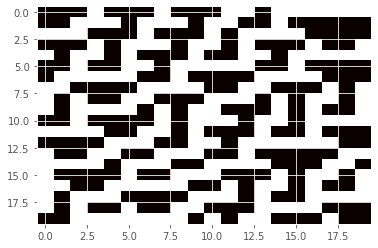

In [84]:
plt.imshow(matrix_perturb_region_check, cmap='hot', aspect='auto')

Can we do better? Yes, we can. Our *intrinsic* hyperparameters regardless of the model chosen are as follows:
> The number of future measurement timesteps storing the deviation distances (temporal).

> And the averaging choice of perturbation (spatial).

So not only optimize these quantities for each rule, but also the learning model, i.e CNNs, RNNs, or Deep MLPs. Then Calculate the IIT metrics for each rule, and compare to the known computational complexity of each rule. 

# Collect Data For Various Rules (hurdles have to be crossed)

Let us examine rule90, for example. The size and number of emergent structures present in rule90 is greater than rule30. This is a problem because we manually set the criteria for what constitutes an *emergent* structure. For example, if we compare rule30 to rule90 we see that there is a certain level of arbitrariness when it comes to definining an emergent structure...

(270.0, 230.0)

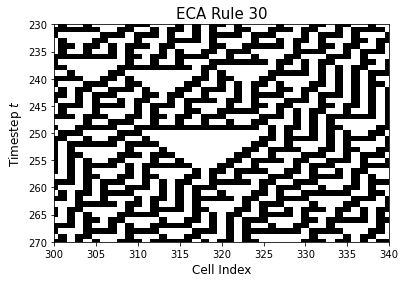

In [38]:
#A zoomed-in visual representation of rule30 (y-axis:Between 250 and 270, x-axis:Between 280 and 320).

matrix_unperturb = apply_rule(rule30, 300, False, 0, 0)

matrix_unperturb_region_check = matrix_unperturb[250:270, 280:320]

plt.imshow(matrix_unperturb, cmap='binary', aspect='auto')
plt.title('ECA Rule 30', fontsize=15)
plt.ylabel("Timestep $t$", fontsize=12)
plt.xlabel("Cell Index", fontsize=12)
plt.xlim([300, 340])
plt.ylim([270, 230])

In the plot above, who's to say that smaller triangles present **(present at (8, 11.5) for example)** is **not** an emergent structure caused by rule30? Remember, in our *emergence_check* function, we arbitrarily defined an emergent structure as one that contains at least 75% of the same state within a **5x5 block**. So this small triangle that *emerged* from rule30 is **not** an *emergent* structure in our criteria. This distinction needs to be driven home, because in a sense every state that evolves from an initial condition *emerges* from the rule. Rule30 produces numerous small triangles but it is only the bigger triangles that we are consider as *emergent* structure. This leads us to a key insight, that there are *emergent* structures at various spatial scales that arise from the same deterministic rules. 

This idea in and of itself is not new. Comparing with the analogy to the atmospheric/weather system, there are spontaneous eddie currents or vortices that arise and dissipate with the evolution of time over the whole spatial state (surface of the earth). This is exactly what is happening with rule30 and the small triangles. The larger triangles present in rule30 would be analogous to large-scale eddie currents, i.e hurricanes. We would want the *emergence_check* function to correctly label hurricanes. What is a hurricane if not a big eddie current? 

The hurdle arises when we want to switch over to a different rule. To keep the analogy with atmospheric/weather phenomena, if we look at a hurricane on earth and place it within the atmospheric torrent of jupiter, it will look like an eddie current. My point is that what consitutes a hurricane depends on what planet you're observing, or in this case, what rule. If we look at the scale of emergent structures that occur in rule90...

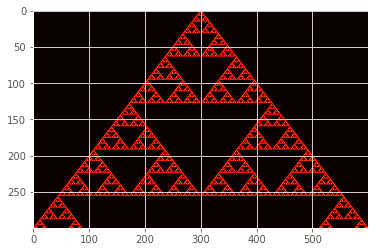

In [86]:
matrix_unperturb = apply_rule(rule90, 300, False, 0, 0)

matrix_unperturb_region_check = matrix_unperturb[0:300, 0:600]

plt.imshow(matrix_unperturb_region_check, cmap='hot', aspect='auto')

... We can see that the scale of the largest structures are of the order of the whole triangle itself. A **5x5** block check would not do. And in this case, since this is a Sierpiński triangle, a fractal, it is uniquely tricky. We will be facing some more unique structures shortly. And as seen below, when taking the same slice of rule90 as we did with rule30 we can see the scale difference of the emergent structures in rule90. You can not even tell if the system is still evolving or has simply terminated after the 270th timestep...

Text(0.5, 0, 'Cell Index')

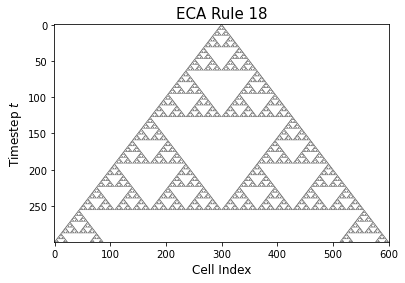

In [48]:
#A zoomed-in visual representation of rule90 (y-axis:Between 250 and 270, x-axis:Between 280 and 320). The same slice as...
#... the rule30 image shown above for comparison. 

matrix_unperturb = apply_rule(rule90, 300, False, 0, 0)

matrix_unperturb_region_check = matrix_unperturb[250:270, 280:320]

plt.imshow(matrix_unperturb, cmap='binary', aspect='auto')
plt.title('ECA Rule 18', fontsize=15)
plt.ylabel("Timestep $t$", fontsize=12)
plt.xlabel("Cell Index", fontsize=12)
# plt.xlim([300, 340])
# plt.ylim([270, 230])

... It is only when we zoom out significantly that we can tell that the blackness below is the start of the *causal* Sierpiński triangle (seen in the red image above).

**A slightly more refined question one can ask would be the following: So how do we automate the choice of what constitutes as an emergent structure given a rule?**

## Automate Emergent Check Criteria for Various Rules?

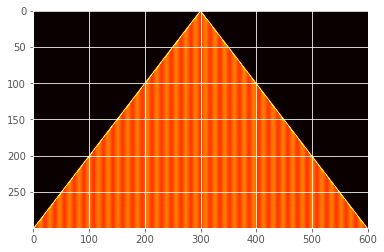

In [88]:
plt.imshow(apply_rule(rule94, 300, False, 0, 0), cmap='hot', aspect='auto')

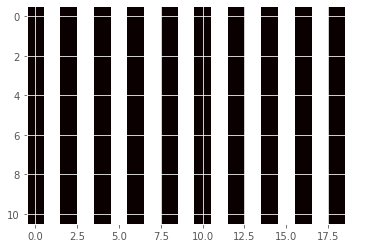

In [89]:
matrix_unperturb = apply_rule(rule94, 300, False, 0, 0)

matrix_unperturb_region_check = matrix_unperturb[289:300, 290:310]

plt.imshow(matrix_unperturb_region_check, cmap='hot', aspect='auto')

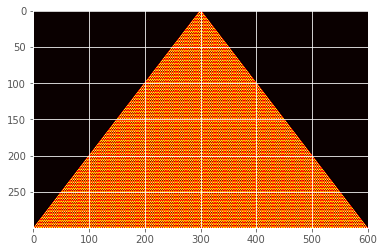

In [90]:
plt.imshow(apply_rule(rule54, 300, False, 0, 0), cmap='hot', aspect='auto')

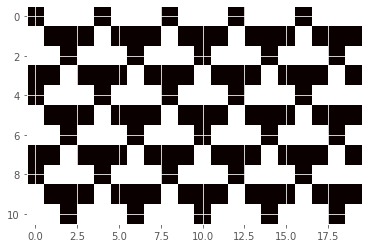

In [91]:
matrix_unperturb = apply_rule(rule54, 300, False, 0, 0)

matrix_unperturb_region_check = matrix_unperturb[289:300, 290:310]

plt.imshow(matrix_unperturb_region_check, cmap='hot', aspect='auto')

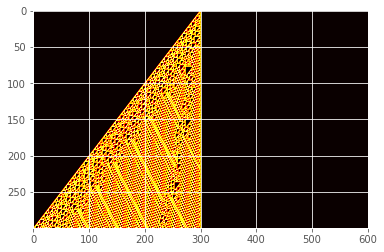

In [92]:
plt.imshow(apply_rule(rule110, 300, False, 0, 0), cmap='hot', aspect='auto')

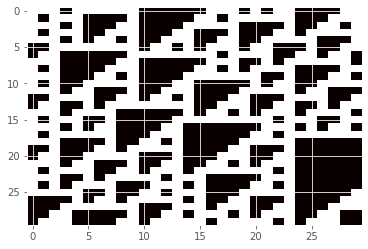

In [93]:
matrix_unperturb = apply_rule(rule110, 300, False, 0, 0)

matrix_unperturb_region_check = matrix_unperturb[60:90, 250:280]

plt.imshow(matrix_unperturb_region_check, cmap='hot', aspect='auto')

In [94]:
# area_of_interest_string is the boundary/region/shape of the global structure of the generated rule given the...
#... initial condition of a single starting cell being 1.

# The string can be "triangle", "half_triangle_right", "half_triangle_left" or "random".

def find_emergent_criteria(rule_function, n, area_of_interest_string, iteration_number):
    
    emergent_boundary_list = []
    cell_one_number = 0
    matrix_unperturb = apply_rule(rule_function, n, False, 0, 0)
    count = 0

#################################################################################################
    if area_of_interest_string == "triangle":
        
        for i in range(iteration_number):
            
            timestep = random.randint(4, n-1)
            around_cell = random.randint(n-timestep, n+timestep)
            
            for j in range(int(n/int(0.02*n))):
                cell_one_number = 0
                region_for_ratio = matrix_unperturb[timestep-j:timestep+j+1, around_cell-j:around_cell+j+1]
                
                for row in region_for_ratio:
                    for cell in row:
                        if cell == 1:
                            cell_one_number += 1
                            
                if cell_one_number >= (.76 * (region_for_ratio.shape[0] * region_for_ratio.shape[1])) or cell_one_number <= (.24 * (region_for_ratio.shape[0] * region_for_ratio.shape[1])):
                    if j == int(n/int(0.02*n)) - 1:
                        shape = (region_for_ratio.shape[0], region_for_ratio.shape[1])
                        emergent_boundary_list.append(shape)
                        
                    else:
                        continue  
                
                else:
                    if j == 1:
                        break
                                        
                    if j != 1:
                        shape = (region_for_ratio.shape[0], region_for_ratio.shape[1])
                        emergent_boundary_list.append(shape)
                        break    
    
        if len(emergent_boundary_list) < (0.01)*iteration_number or len(emergent_boundary_list) > (0.99)*iteration_number:
            return "Fixed State"
    
        else:
        
            a = 0
            b = 0

            for item in emergent_boundary_list:
                a += item[0]
                b += item[1]

            length = a/len(emergent_boundary_list)
            height = b/len(emergent_boundary_list)

            return (length, height)
##################################################################################################################
    if area_of_interest_string == "half_triangle_right":
        
        for i in range(iteration_number):
            
            timestep = random.randint(4, n-1)
            around_cell = random.randint(n, n+timestep)
            
            for j in range(int(n/int(0.02*n))):
                cell_one_number = 0
                region_for_ratio = matrix_unperturb[timestep-j:timestep+j+1, around_cell-j:around_cell+j+1]
                
                for row in region_for_ratio:
                    for cell in row:
                        if cell == 1:
                            cell_one_number += 1
                            
                if cell_one_number >= (.76 * (region_for_ratio.shape[0] * region_for_ratio.shape[1])) or cell_one_number <= (.24 * (region_for_ratio.shape[0] * region_for_ratio.shape[1])):
                    if j == int(n/int(0.02*n)) - 1:
                        shape = (region_for_ratio.shape[0], region_for_ratio.shape[1])
                        emergent_boundary_list.append(shape)
                        
                    else:
                        continue  
                
                else:
                    if j == 1:
                        break
                                        
                    if j != 1:
                        shape = (region_for_ratio.shape[0], region_for_ratio.shape[1])
                        emergent_boundary_list.append(shape)
                        break    
    
        if len(emergent_boundary_list) < (0.01)*iteration_number or len(emergent_boundary_list) > (0.99)*iteration_number:
            return "Fixed State"

        else:

            a = 0
            b = 0

            for item in emergent_boundary_list:
                a += item[0]
                b += item[1]

            length = a/len(emergent_boundary_list)
            height = b/len(emergent_boundary_list)

            return (length, height)
#######################################################################################################     
    if area_of_interest_string == "half_triangle_left":
        
        for i in range(iteration_number):
            
            timestep = random.randint(4, n-1)
            around_cell = random.randint(n-timestep, n)
            
            for j in range(int(n/int(0.02*n))):
                cell_one_number = 0
                region_for_ratio = matrix_unperturb[timestep-j:timestep+j+1, around_cell-j:around_cell+j+1]
                
                for row in region_for_ratio:
                    for cell in row:
                        if cell == 1:
                            cell_one_number += 1
                            
                if cell_one_number >= (.76 * (region_for_ratio.shape[0] * region_for_ratio.shape[1])) or cell_one_number <= (.24 * (region_for_ratio.shape[0] * region_for_ratio.shape[1])):
                    if j == int(n/int(0.02*n)) - 1:
                        shape = (region_for_ratio.shape[0], region_for_ratio.shape[1])
                        emergent_boundary_list.append(shape)
                        
                    else:
                        continue  
                
                else:
                    if j == 1:
                        break
                                        
                    if j != 1:
                        shape = (region_for_ratio.shape[0], region_for_ratio.shape[1])
                        emergent_boundary_list.append(shape)
                        break    
    
        if len(emergent_boundary_list) < (0.01)*iteration_number or len(emergent_boundary_list) > (0.99)*iteration_number:
            return "Fixed State"

        else:

            a = 0
            b = 0

            for item in emergent_boundary_list:
                a += item[0]
                b += item[1]

            length = a/len(emergent_boundary_list)
            height = b/len(emergent_boundary_list)

            return (length, height)
#####################################################################################################################
    if area_of_interest_string == "random":
        
        for i in range(iteration_number):
            
            timestep = random.randint(2, n-1)
            around_cell = random.randint(0, 2*n)
            
            for j in range(int(n/int(0.02*n))):
                cell_one_number = 0
                region_for_ratio = matrix_unperturb[timestep-j:timestep+j+1, around_cell-j:around_cell+j+1]
                
                for row in region_for_ratio:
                    for cell in row:
                        if cell == 1:
                            cell_one_number += 1
                            
                if cell_one_number >= (.76 * (region_for_ratio.shape[0] * region_for_ratio.shape[1])) or cell_one_number <= (.24 * (region_for_ratio.shape[0] * region_for_ratio.shape[1])):
                    if j == int(n/int(0.02*n)) - 1:
                        shape = (region_for_ratio.shape[0], region_for_ratio.shape[1])
                        emergent_boundary_list.append(shape)
                        count += 1
                        
                    else:
                        continue  
                
                else:
                    count = 0
                    if j == 1:
                        break
                                        
                    if j != 1:
                        shape = (region_for_ratio.shape[0], region_for_ratio.shape[1])
                        emergent_boundary_list.append(shape)
                        break  
                        
                        
            if count > 10:
                return "Fixed State/Giant Emergent Structure"
            
    
        if len(emergent_boundary_list) < (0.01)*iteration_number or len(emergent_boundary_list) > (0.99)*iteration_number:
            return "Fixed State"

        else:

            a = 0
            b = 0

            for item in emergent_boundary_list:
                a += item[0]
                b += item[1]

            length = a/len(emergent_boundary_list)
            height = b/len(emergent_boundary_list)

            return (length, height)

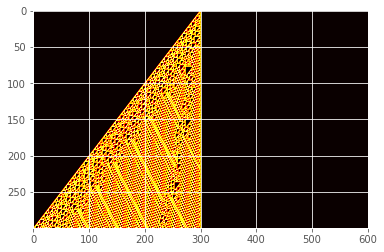

In [95]:
rule_function_check = make_rule(110)

plt.imshow(apply_rule(rule_function_check, 300, False, 0, 0), cmap='hot', aspect='auto')

In [96]:
emergent_shape = find_emergent_criteria(rule_function_check, 300, "half_triangle_left", 1000)

print(emergent_shape)

(5.25, 5.25)


## Implementing the Automated Emergent Boundary in "Emergence Check" Function

In [97]:
def check_emergence_modified(rule_function, n, timestep, cell, tup):
    cell_one_number = 0
    matrix_unperturb = apply_rule(rule_function, n, False, 0, 0)
    
    value_holder = matrix_unperturb[timestep, cell]
    matrix_unperturb[timestep, cell] = 2
    
    length = math.floor(tup[0]/2) 
    width = math.floor(tup[1]/2)
    
    submatrix = matrix_unperturb[timestep-length:timestep+(length+1), cell-width:cell+(width+1)]

    for row in submatrix:
        for cell in row:
            if cell == 1:
                cell_one_number += 1
    
    area = (math.floor(tup[0]) * math.floor(tup[1]))
    
    if cell_one_number >= (.80 * area) or cell_one_number <= (.20 * area):
        emergence_guess = 1
    else:
        emergence_guess = 0

    matrix_unperturb[timestep, cell] = value_holder    

    return emergence_guess 

In [98]:
def collect_training_data_modified(rule_function, n, num_of_datapoints, area_of_interest_string, tup):
    
    training_data_list = []
    count_for_emergence = 0
    
    for i in range(num_of_datapoints):
        
        list_for_datapoint = []
        
        if i%10 == 0:
            print(i)
            
        timestep = random.randint(4, n-1)
        
        if timestep >= (n-15):
            continue
            
            
        if area_of_interest_string == "triangle":
            around_cell = random.randint(n-timestep, n+timestep)
        if area_of_interest_string == "half_triangle_right":
            around_cell = random.randint(n, n+timestep)
        if area_of_interest_string == "half_triangle_left":
            around_cell = random.randint(n-timestep, n)  
        if area_of_interest_string == "random":
            around_cell = random.randint(0, 2*n)
        if area_of_interest_string == "half_triangle_right_skew":
            around_cell = random.randint(n-int(timestep/2), n+timestep)
        if area_of_interest_string == "half_triangle_left_skew":
            around_cell = random.randint(n-timestep, n+int(timestep/2))
            
            
        up_to_measurement_timesteps = timestep + 15
        
        
        emergence_guess = check_emergence_modified(rule_function, n, timestep, around_cell, tup)
        if emergence_guess == 1:
            print("Got one!")
            count_for_emergence += 1
        
        if len(training_data_list) > 100 and emergence_guess == 0:
            continue
            
        average_list = single_perturbation_multiple_timesteps(rule_function, n, timestep, around_cell, up_to_measurement_timesteps)
        
        list_for_datapoint.append(average_list)
        list_for_datapoint.append(emergence_guess)
        list_for_datapoint.append(timestep)
        list_for_datapoint.append(around_cell)
        
        training_data_list.append(list_for_datapoint)
        
        if count_for_emergence == 100:
            break
    
    return training_data_list

# Collecting Training Data for Each Rule! 

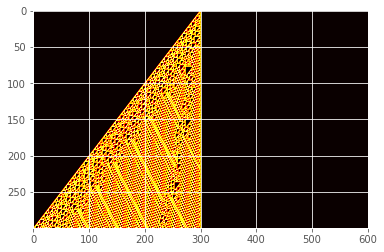

In [99]:
# First we collect training data for rule110

rule_function_use = make_rule(110)

plt.imshow(apply_rule(rule_function_use, 300, False, 0, 0), cmap='hot', aspect='auto')

In [100]:
emergent_shape = find_emergent_criteria(rule_function_use, 300, "half_triangle_left", 1000)
print(emergent_shape)

(5.107438016528926, 5.115702479338843)


In [101]:
# training_data_list = collect_training_data_modified(rule_function_use, 300, 20000, "half_triangle_left", emergent_shape)

# with open("Saved_Training_Data_For_Rule110.txt", "wb") as fp:   #Pickling
#     pickle.dump(training_data_list, fp)

In [53]:
count = 0
training_data_test = []

with open("Saved_Training_Data_For_Rule110.txt", "rb") as fp:   # Unpickling
    training_data = pickle.load(fp)
    
for item in training_data:
    if item[1] == 1:
        training_data_test.append(item)
        count += 1
        
print(count)


84


In [50]:
yoyo = 30
tup = emergent_shape
cell_one_number = 0

matrix_unperturb = apply_rule(rule_function_use, 300, False, 0, 0)

length = math.floor(tup[0]/2) 
width = math.floor(tup[1]/2)
matrix_unperturb[training_data_test[yoyo][2], training_data_test[yoyo][3]] = 2
submatrix = matrix_unperturb[training_data_test[yoyo][2]-length:training_data_test[yoyo][2]+(length+1), training_data_test[yoyo][3]-width:training_data_test[yoyo][3]+(width+1)]

for row in submatrix:
    for cell in row:
        if cell == 1:
            cell_one_number += 1

area = (math.floor(tup[0]) * math.floor(tup[1]))

if cell_one_number >= (.80 * area) or cell_one_number <= (.20 * area):
    emergence_guess = 1
    print('whats up')
    print(cell_one_number)
else:
    emergence_guess = 0
    print('nah', cell_one_number)

matrix_unperturb_region_check = matrix_unperturb[training_data_test[yoyo][2]-10:training_data_test[yoyo][2]+11, training_data_test[yoyo][3]-10:training_data_test[yoyo][3]+11]

plt.imshow(matrix_unperturb_region_check, cmap='hot', aspect='auto')

NameError: name 'emergent_shape' is not defined

In [104]:
check_emergence_modified(rule_function_use, 300, 110, 234, (emergent_shape))

1

nah 16


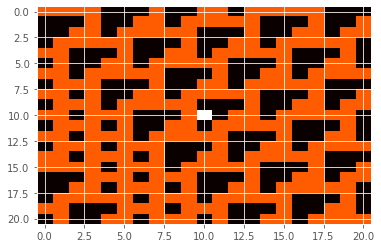

In [105]:
timestep = 280
cell = 200
tup = emergent_shape
cell_one_number = 0
length = math.floor(tup[0]/2) 
width = math.floor(tup[1]/2)


matrix_unperturb = apply_rule(rule_function_use, 300, False, 0, 0)
matrix_unperturb[timestep, cell] = 2

matrix_unperturb_region_check = matrix_unperturb[timestep-10:timestep+11, cell-10:cell+11]

submatrix = matrix_unperturb[timestep-length:timestep+(length+1), cell-width:cell+(width+1)]

for row in submatrix:
    for cell in row:
        if cell == 1:
            cell_one_number += 1
        
        cell = 2

area = (math.floor(tup[0]) * math.floor(tup[1])) - 1

if cell_one_number >= (.80 * area) or cell_one_number <= (.20 * area):
    emergence_guess = 1
    print('whats up')
    print(cell_one_number)
else:
    emergence_guess = 0
    print('nah', cell_one_number)


plt.imshow(matrix_unperturb_region_check, cmap='hot', aspect='auto')

In [106]:
# validation_data_list = collect_training_data_modified(rule_function_use, 300, 10000, "half_triangle_left", emergent_shape)

# with open("Saved_Validation_Data_For_Rule110.txt", "wb") as pf:   #Pickling
#     pickle.dump(validation_data_list, pf)

In [54]:
count = 0 

with open("Saved_Validation_Data_For_Rule110.txt", "rb") as pf:   # Unpickling
    validation_data = pickle.load(pf)

for item in validation_data:
    if item[1] == 1:
        print(item)
        count += 1
        
print(count)

[array([0.00166389, 0.00332779, 0.00499168, 0.00443705, 0.00665557,
       0.00610094, 0.00721021, 0.0088741 , 0.0088741 , 0.01053799,
       0.0088741 , 0.00942873, 0.00721021, 0.01053799, 0.01109262]), 1, 81, 277]
[array([0.00166389, 0.00332779, 0.00554631, 0.00610094, 0.00776484,
       0.00665557, 0.00831947, 0.00776484, 0.00942873, 0.01386578,
       0.00942873, 0.01275652, 0.01220189, 0.01220189, 0.01552967]), 1, 153, 279]
[array([0.00166389, 0.00332779, 0.00443705, 0.00554631, 0.00554631,
       0.00776484, 0.00665557, 0.00776484, 0.0088741 , 0.00776484,
       0.00831947, 0.00610094, 0.00610094, 0.00998336, 0.01109262]), 1, 100, 280]
[array([0.00166389, 0.00332779, 0.00443705, 0.00554631, 0.00499168,
       0.00665557, 0.00776484, 0.00665557, 0.00721021, 0.0088741 ,
       0.00942873, 0.01109262, 0.01275652, 0.0160843 , 0.01386578]), 1, 188, 148]
[array([0.00166389, 0.00332779, 0.00443705, 0.00499168, 0.00721021,
       0.00942873, 0.00665557, 0.00942873, 0.01275652, 0.00942873

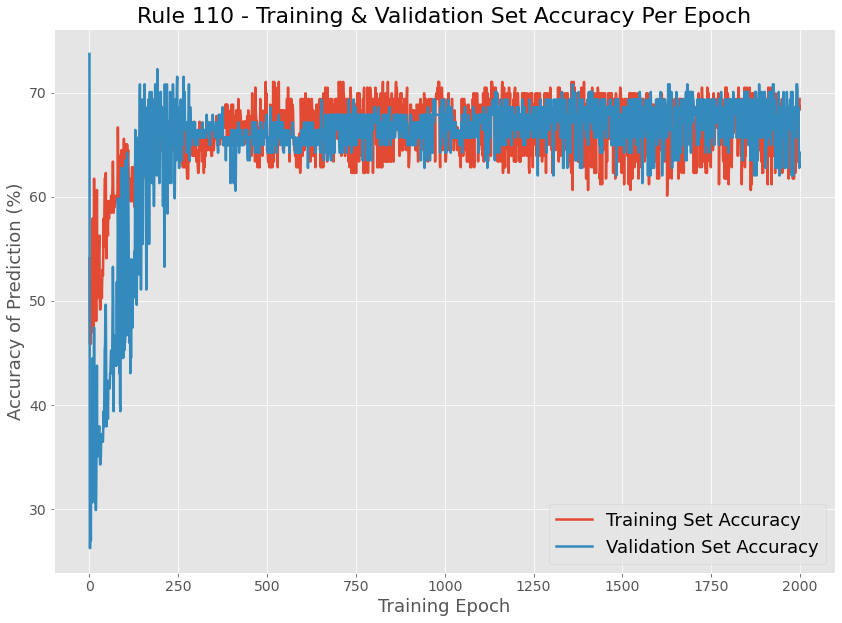

Highest Training Accuracy = 71.03825136612022
The epoch for which these values were obtained = 1392
Highest Validation Accuracy = 73.72262773722628
The epoch for which these values were obtained = 0


In [55]:
### = Main Section/Comment
# = Sub Section/Comment

###Initializing variables.
#Initialized weight vector.
w = np.zeros(len(training_data[0][0])) 

#Vote count and y_prime.
c = 0
y_prime = int

#Updated c*w.
voteWeightVector = 0 

#Lists for keeping count of the accuracy.
lforTrain = np.zeros(len(training_data))
lforVal = np.zeros(len(validation_data))

#Counts for accuracy check.
countforTrain = 0 
countforValid = 0
prediction = 0 
accTrain = 0 
accValid = 0
previousaccTrain = 0
previousaccVal = 0
matchTrain = 0
matchVal = 0 
epochcount = 0
epochcountVal = 0
plotlistTrain = []
plotlistValid = []
xlist = []
curious_list = []

###Used to train the Voted Perceptron to convergence.
for epoch in range(2000):

  countforTrain = 0
  countforValid = 0 
  voteWeightVector = 0
  curious_list = []

  ###The Voted Perceptron algorithm, with 0(1) memory.
  for i in range(len(training_data)):

    #Activation function.
    if np.dot(w, training_data[i][0]) >= 0:
        y_prime = 1
    else:
        y_prime = 0

    #Vote count.
    if y_prime == training_data[i][1]:
        c += 1

    #If y_prime guess is incorrect, then w*c is updated.
    else:
        voteWeightVector += np.dot(w, c)

        c = 1
        signSwitch = [element * (training_data[i][1] - y_prime) for element 
                     in training_data[i][0]]
        w = list(map(add, w, signSwitch))
  
  #Updating the w*c again. Making sure latest w and number
  #...of votes gets accounted for. 
  voteWeightVector += np.dot(w, c)

  ###Training Set - Making a prediction and accuracy count for epoch.
  for k in range(len(training_data)):
    if np.dot(voteWeightVector, training_data[k][0]) >= 0:
      lforTrain[k] = 1
    else:
      lforTrain[k] = 0
    if lforTrain[k] == training_data[k][1]:
      countforTrain += 1
  accTrain = (countforTrain/len(training_data)) * 100

  ###Validation Set - Making a prediction and accuracy count for epoch.
  for k in range(len(validation_data)):
    if np.dot(voteWeightVector, validation_data[k][0]) >= 0:
        lforVal[k] = 1
    else:
        lforVal[k] = 0
    if lforVal[k] == validation_data[k][1]:
        countforValid += 1
    elif lforVal[k] == 1 and validation_data[k][1] == 0:
        curious_list.append(k)
  accValid = (countforValid/len(validation_data)) * 100

  ###Lists for plotting training/validation set accuracy per epoch.
  plotlistTrain.append(accTrain)
  plotlistValid.append(accValid)

  #List for x-axis in plot.
  xlist.append(epoch)

  ###Keeping track of the epoch which has highest training accuracy.
  if accTrain >= previousaccTrain:
    previousaccTrain = accTrain
    matchTrain = accTrain
    epochcount = epoch
    
  ###Keeping track of the epoch which has highest validation accuracy.
  if accValid >= previousaccVal:
    previousaccVal = accValid
    matchVal = accValid
    epochcountVal = epoch
  
###Calling the plot.
plt.figure(figsize=(14,10))
plt.plot(xlist, plotlistTrain, label='Training Set Accuracy', lw=2.5)
plt.plot(xlist, plotlistValid, label='Validation Set Accuracy', lw=2.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Rule 110 - Training & Validation Set Accuracy Per Epoch', fontsize=22)
plt.xlabel('Training Epoch', fontsize=18)
plt.ylabel('Accuracy of Prediction (%)', fontsize=18)
plt.legend(fontsize=18)
plt.savefig("ValidSetAccuracyVotedPerceptron.png", bbox_inches="tight")
plt.show()

###Prints the highest validation set accuracy, the corresponding...
#... training accuracy and the epoch.
print("Highest Training Accuracy =", matchTrain)
print("The epoch for which these values were obtained =", epochcount)
print("Highest Validation Accuracy =", matchVal)
print("The epoch for which these values were obtained =", epochcountVal)

## Another Rule (Rule 73)

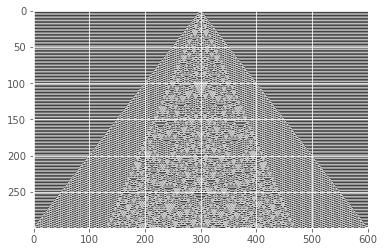

In [30]:
rule_function_use = make_rule(73)

plt.imshow(apply_rule(rule_function_use, 300, False, 0, 0), cmap='binary', aspect='auto')

In [110]:
# emergent_shape = find_emergent_criteria(rule_function_use, 300, "random", 1000)
# print(emergent_shape)
emergent_shape = (6, 6)

whatsup 8 36 27.0 9.0


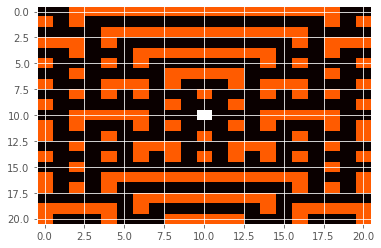

In [111]:
timestep = 208
cell = 300
tup = emergent_shape
cell_one_number = 0
cell_number = 0
length = math.floor(tup[0]/2) 
width = math.floor(tup[1]/2)


matrix_unperturb = apply_rule(rule_function_use, 300, False, 0, 0)
matrix_unperturb[timestep, cell] = 2

matrix_unperturb_region_check = matrix_unperturb[timestep-10:timestep+11, cell-10:cell+11]

submatrix = matrix_unperturb[timestep-length:timestep+(length), cell-width:cell+(width)]

for row in submatrix:
    for cell in row:
        cell_number += 1
        if cell == 1:
            cell_one_number += 1
 

area = (math.floor(tup[0]) * math.floor(tup[1]))

if cell_one_number >= (.75 * area) or cell_one_number <= (.25 * area):
    emergence_guess = 1
    print('whatsup', cell_one_number, cell_number,.75 * area,.25 * area)

else:
    emergence_guess = 0
    print('nah', cell_one_number, cell_number,.75 * area,.25 * area)


plt.imshow(matrix_unperturb_region_check, cmap='hot', aspect='auto')

In [112]:
check_emergence_modified(rule_function_use, 300, 208, 300, (6, 6))

0

In [113]:
def check_emergence_modified(rule_function, n, timestep, cell, tup):
    cell_one_number = 0
    matrix_unperturb = apply_rule(rule_function, n, False, 0, 0)
    
    value_holder = matrix_unperturb[timestep, cell]
    matrix_unperturb[timestep, cell] = 2
    
    length = math.floor(tup[0]/2) 
    width = math.floor(tup[1]/2)
    
    submatrix = matrix_unperturb[timestep-length:timestep+(length), cell-width:cell+(width)]

    for row in submatrix:
        for cell in row:
            if cell == 1:
                cell_one_number += 1
    
    area = (math.floor(tup[0]) * math.floor(tup[1]))
    
    if cell_one_number >= (.75 * area) or cell_one_number <= (.25 * area):
        emergence_guess = 1
    else:
        emergence_guess = 0

    matrix_unperturb[timestep, cell] = value_holder    

    return emergence_guess 

In [114]:
print(emergent_shape)

(6, 6)


In [115]:
# training_data_list = collect_training_data_modified(rule_function_use, 300, 20000, "triangle", emergent_shape)

# with open("Saved_Training_Data_For_Rule73.txt", "wb") as fp:   #Pickling
#     pickle.dump(training_data_list, fp)

In [57]:
count = 0

with open("Saved_Training_Data_For_Rule73.txt", "rb") as fp:   # Unpickling
    training_data = pickle.load(fp)
    
for item in training_data:
    if item[1] == 0:
        training_data_test.append(item)
        count += 1
        
print(count)

100


In [117]:
# validation_data_list = collect_training_data_modified(rule_function_use, 300, 10000, "triangle", emergent_shape)

# with open("Saved_Validation_Data_For_Rule73.txt", "wb") as pf:   #Pickling
#     pickle.dump(validation_data_list, pf)

In [56]:
count = 0 

with open("Saved_Validation_Data_For_Rule73.txt", "rb") as pf:   # Unpickling
    validation_data = pickle.load(pf)

for item in validation_data:
    if item[1] == 0:
        print(item)
        count += 1
        
print(count)

[array([0.00166389, 0.00388242, 0.00388242, 0.00554631, 0.00665557,
       0.0088741 , 0.00610094, 0.00942873, 0.00942873, 0.00998336,
       0.01220189, 0.01497504, 0.01220189, 0.01386578, 0.01331115]), 0, 13, 290]
[array([0.00166389, 0.00443705, 0.00610094, 0.00221852, 0.00610094,
       0.00499168, 0.00332779, 0.00665557, 0.00831947, 0.00831947,
       0.01164725, 0.01220189, 0.01331115, 0.01275652, 0.01275652]), 0, 95, 269]
[array([0.00166389, 0.00332779, 0.00776484, 0.00776484, 0.00721021,
       0.00831947, 0.00831947, 0.01053799, 0.0088741 , 0.0088741 ,
       0.01275652, 0.01164725, 0.0088741 , 0.01109262, 0.00942873]), 0, 158, 370]
[array([0.00166389, 0.00443705, 0.00443705, 0.00554631, 0.00665557,
       0.00554631, 0.00554631, 0.00721021, 0.00776484, 0.00721021,
       0.00831947, 0.01109262, 0.01053799, 0.01109262, 0.01442041]), 0, 233, 86]
[array([0.00166389, 0.00332779, 0.00443705, 0.00610094, 0.00776484,
       0.00776484, 0.00721021, 0.00665557, 0.01164725, 0.01164725,


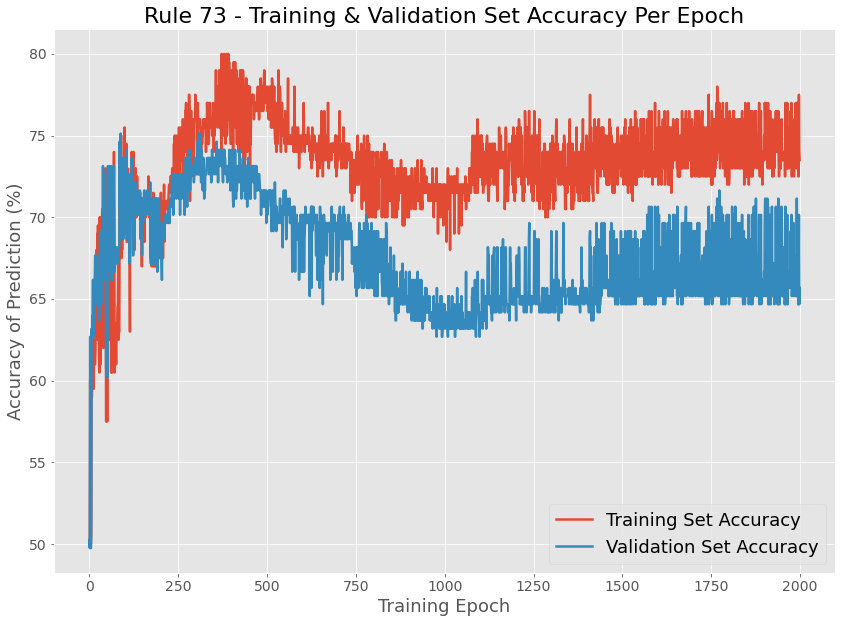

Highest Training Accuracy = 80.0
The epoch for which these values were obtained = 391
Highest Validation Accuracy = 75.12437810945273
The epoch for which these values were obtained = 310


In [58]:
### = Main Section/Comment
# = Sub Section/Comment

###Initializing variables.
#Initialized weight vector.
w = np.zeros(len(training_data[0][0])) 

#Vote count and y_prime.
c = 0
y_prime = int

#Updated c*w.
voteWeightVector = 0 

#Lists for keeping count of the accuracy.
lforTrain = np.zeros(len(training_data))
lforVal = np.zeros(len(validation_data))

#Counts for accuracy check.
countforTrain = 0 
countforValid = 0
prediction = 0 
accTrain = 0 
accValid = 0
previousaccTrain = 0
previousaccVal = 0
matchTrain = 0
matchVal = 0 
epochcount = 0
epochcountVal = 0
plotlistTrain = []
plotlistValid = []
xlist = []
curious_list = []

###Used to train the Voted Perceptron to convergence.
for epoch in range(2000):

  countforTrain = 0
  countforValid = 0 
  voteWeightVector = 0
  curious_list = []

  ###The Voted Perceptron algorithm, with 0(1) memory.
  for i in range(len(training_data)):

    #Activation function.
    if np.dot(w, training_data[i][0]) >= 0:
        y_prime = 1
    else:
        y_prime = 0

    #Vote count.
    if y_prime == training_data[i][1]:
        c += 1

    #If y_prime guess is incorrect, then w*c is updated.
    else:
        voteWeightVector += np.dot(w, c)

        c = 1
        signSwitch = [element * (training_data[i][1] - y_prime) for element 
                     in training_data[i][0]]
        w = list(map(add, w, signSwitch))
  
  #Updating the w*c again. Making sure latest w and number
  #...of votes gets accounted for. 
  voteWeightVector += np.dot(w, c)

  ###Training Set - Making a prediction and accuracy count for epoch.
  for k in range(len(training_data)):
    if np.dot(voteWeightVector, training_data[k][0]) >= 0:
      lforTrain[k] = 1
    else:
      lforTrain[k] = 0
    if lforTrain[k] == training_data[k][1]:
      countforTrain += 1
  accTrain = (countforTrain/len(training_data)) * 100

  ###Validation Set - Making a prediction and accuracy count for epoch.
  for k in range(len(validation_data)):
    if np.dot(voteWeightVector, validation_data[k][0]) >= 0:
        lforVal[k] = 1
    else:
        lforVal[k] = 0
    if lforVal[k] == validation_data[k][1]:
        countforValid += 1
    elif lforVal[k] == 1 and validation_data[k][1] == 0:
        curious_list.append(k)
  accValid = (countforValid/len(validation_data)) * 100

  ###Lists for plotting training/validation set accuracy per epoch.
  plotlistTrain.append(accTrain)
  plotlistValid.append(accValid)

  #List for x-axis in plot.
  xlist.append(epoch)

  ###Keeping track of the epoch which has highest training accuracy.
  if accTrain >= previousaccTrain:
    previousaccTrain = accTrain
    matchTrain = accTrain
    epochcount = epoch
    
  ###Keeping track of the epoch which has highest validation accuracy.
  if accValid >= previousaccVal:
    previousaccVal = accValid
    matchVal = accValid
    epochcountVal = epoch
  
###Calling the plot.
plt.figure(figsize=(14,10))
plt.plot(xlist, plotlistTrain, label='Training Set Accuracy', lw=2.5)
plt.plot(xlist, plotlistValid, label='Validation Set Accuracy', lw=2.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Rule 73 - Training & Validation Set Accuracy Per Epoch', fontsize=22)
plt.xlabel('Training Epoch', fontsize=18)
plt.ylabel('Accuracy of Prediction (%)', fontsize=18)
plt.legend(fontsize=18)
plt.savefig("ValidSetAccuracyVotedPerceptron.png", bbox_inches="tight")
plt.show()

###Prints the highest validation set accuracy, the corresponding...
#... training accuracy and the epoch.
print("Highest Training Accuracy =", matchTrain)
print("The epoch for which these values were obtained =", epochcount)
print("Highest Validation Accuracy =", matchVal)
print("The epoch for which these values were obtained =", epochcountVal)

## Another Rule (105)

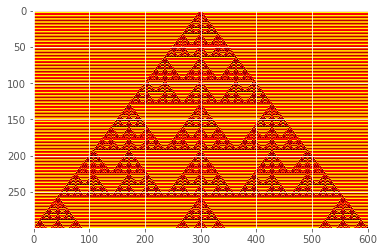

In [45]:
rule_function_use = make_rule(105)

plt.imshow(apply_rule(rule_function_use, 300, False, 0, 0), cmap='hot', aspect='auto')

In [121]:
emergent_shape = (6, 6)

nah 13 36 23.400000000000002 12.6


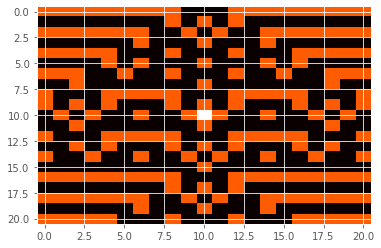

In [122]:
timestep = 171
cell = 332
tup = emergent_shape
cell_one_number = 0
cell_number = 0
length = math.floor(tup[0]/2) 
width = math.floor(tup[1]/2)


matrix_unperturb = apply_rule(rule_function_use, 300, False, 0, 0)
matrix_unperturb[timestep, cell] = 2

matrix_unperturb_region_check = matrix_unperturb[timestep-10:timestep+11, cell-10:cell+11]

submatrix = matrix_unperturb[timestep-length:timestep+(length), cell-width:cell+(width)]

for row in submatrix:
    for cell in row:
        cell_number += 1
        if cell == 1:
            cell_one_number += 1
 

area = (math.floor(tup[0]) * math.floor(tup[1]))

if cell_one_number >= (.65 * area) or cell_one_number <= (.35 * area):
    emergence_guess = 1
    print('whatsup', cell_one_number, cell_number,.65 * area,.35 * area)

else:
    emergence_guess = 0
    print('nah', cell_one_number, cell_number,.65 * area,.35 * area)


plt.imshow(matrix_unperturb_region_check, cmap='hot', aspect='auto')

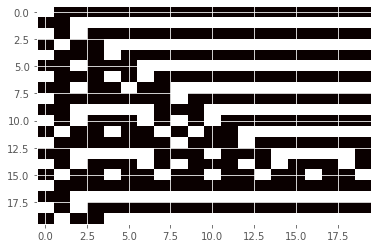

In [123]:
matrix_perturb = apply_rule(rule_function_use, 300, True, 170, 310)
matrix_unperturb = apply_rule(rule_function_use, 300, False, 0, 0)

matrix_perturb_region_check = matrix_perturb[160:180, 300:320]
matrix_unperturb_region_check = matrix_unperturb[160:180, 300:320]

plt.imshow(matrix_unperturb_region_check, cmap='hot', aspect='auto')

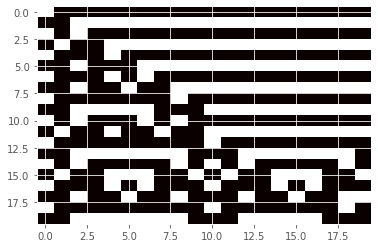

In [124]:
plt.imshow(matrix_perturb_region_check, cmap='hot', aspect='auto')

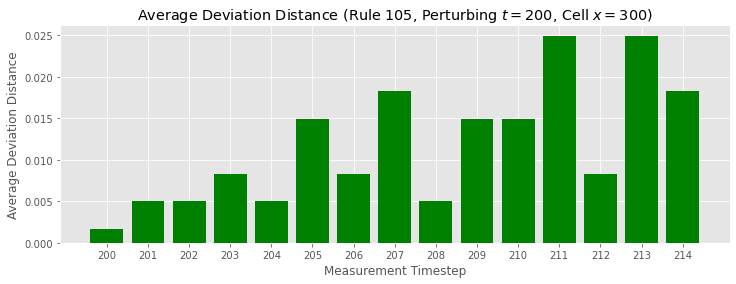

In [47]:
measurement_timestep_list = [i for i in range(200, 215)]
average_list = single_perturbation_multiple_timesteps(rule_function_use, 300, 200, 300, 215)
plot_for_average(average_list, measurement_timestep_list, "Average Deviation Distance (Rule 105, Perturbing $t = 200$, Cell $x = 300$)", "Measurement Timestep", "Average Deviation Distance")

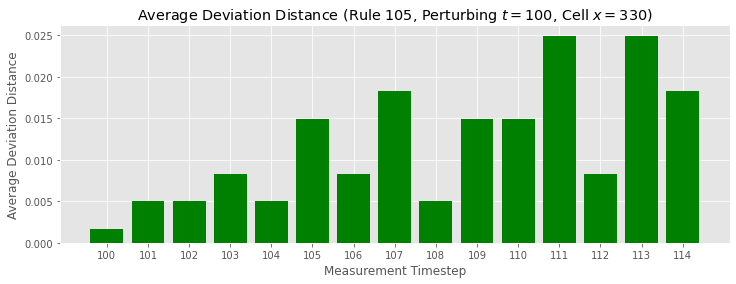

In [48]:
measurement_timestep_list = [i for i in range(100, 115)]
average_list = single_perturbation_multiple_timesteps(rule_function_use, 300, 100, 330, 115)
plot_for_average(average_list, measurement_timestep_list, "Average Deviation Distance (Rule 105, Perturbing $t = 100$, Cell $x = 330$)", "Measurement Timestep", "Average Deviation Distance")

In [127]:
def check_emergence_modified(rule_function, n, timestep, cell, tup):
    cell_one_number = 0
    matrix_unperturb = apply_rule(rule_function, n, False, 0, 0)
    
    value_holder = matrix_unperturb[timestep, cell]
    matrix_unperturb[timestep, cell] = 2
    
    length = math.floor(tup[0]/2) 
    width = math.floor(tup[1]/2)
    
    submatrix = matrix_unperturb[timestep-length:timestep+(length), cell-width:cell+(width)]

    for row in submatrix:
        for cell in row:
            if cell == 1:
                cell_one_number += 1
    
    area = (math.floor(tup[0]) * math.floor(tup[1]))
    
    if cell_one_number >= (.65 * area) or cell_one_number <= (.35 * area):
        emergence_guess = 1
    else:
        emergence_guess = 0

    matrix_unperturb[timestep, cell] = value_holder    

    return emergence_guess 

In [128]:
# training_data_list = collect_training_data_modified(rule_function_use, 300, 20000, "triangle", emergent_shape)

# with open("Saved_Training_Data_For_Rule105.txt", "wb") as fp:   #Pickling
#     pickle.dump(training_data_list, fp)

In [59]:
count = 0

with open("Saved_Training_Data_For_Rule105.txt", "rb") as fp:   # Unpickling
    training_data = pickle.load(fp)
    
for item in training_data:
    if item[1] == 1:
        training_data_test.append(item)
        count += 1
        print(item)
        
print(count)

[array([0.00166389, 0.00499168, 0.00499168, 0.00831947, 0.00499168,
       0.01497504, 0.00831947, 0.01830283, 0.00499168, 0.01497504,
       0.01497504, 0.0249584 , 0.00831947, 0.0249584 , 0.01830283]), 1, 94, 241]
[array([0.00166389, 0.00499168, 0.00499168, 0.00831947, 0.00499168,
       0.01497504, 0.00831947, 0.01830283, 0.00499168, 0.01497504,
       0.01497504, 0.0249584 , 0.00831947, 0.0249584 , 0.01830283]), 1, 118, 402]
[array([0.00166389, 0.00499168, 0.00499168, 0.00831947, 0.00499168,
       0.01497504, 0.00831947, 0.01830283, 0.00499168, 0.01497504,
       0.01497504, 0.0249584 , 0.00831947, 0.0249584 , 0.01830283]), 1, 87, 298]
[array([0.00166389, 0.00499168, 0.00499168, 0.00831947, 0.00499168,
       0.01497504, 0.00831947, 0.01830283, 0.00499168, 0.01497504,
       0.01497504, 0.0249584 , 0.00831947, 0.0249584 , 0.01830283]), 1, 182, 128]
[array([0.00166389, 0.00499168, 0.00499168, 0.00831947, 0.00499168,
       0.01497504, 0.00831947, 0.01830283, 0.00499168, 0.01497504,

In [130]:
# validation_data_list = collect_training_data_modified(rule_function_use, 300, 10000, "triangle", emergent_shape)

# with open("Saved_Validation_Data_For_Rule105.txt", "wb") as pf:   #Pickling
#     pickle.dump(validation_data_list, pf)

In [60]:
count = 0 

with open("Saved_Validation_Data_For_Rule105.txt", "rb") as pf:   # Unpickling
    validation_data = pickle.load(pf)

for item in validation_data:
    if item[1] == 1:
        print(item)
        count += 1
        
print(count)

[array([0.00166389, 0.00499168, 0.00499168, 0.00831947, 0.00499168,
       0.01497504, 0.00831947, 0.01830283, 0.00499168, 0.01497504,
       0.01497504, 0.0249584 , 0.00831947, 0.0249584 , 0.01830283]), 1, 61, 324]
[array([0.00166389, 0.00499168, 0.00499168, 0.00831947, 0.00499168,
       0.01497504, 0.00831947, 0.01830283, 0.00499168, 0.01497504,
       0.01497504, 0.0249584 , 0.00831947, 0.0249584 , 0.01830283]), 1, 222, 125]
[array([0.00166389, 0.00499168, 0.00499168, 0.00831947, 0.00499168,
       0.01497504, 0.00831947, 0.01830283, 0.00499168, 0.01497504,
       0.01497504, 0.0249584 , 0.00831947, 0.0249584 , 0.01830283]), 1, 21, 282]
[array([0.00166389, 0.00499168, 0.00499168, 0.00831947, 0.00499168,
       0.01497504, 0.00831947, 0.01830283, 0.00499168, 0.01497504,
       0.01497504, 0.0249584 , 0.00831947, 0.0249584 , 0.01830283]), 1, 47, 322]
[array([0.00166389, 0.00499168, 0.00499168, 0.00831947, 0.00499168,
       0.01497504, 0.00831947, 0.01830283, 0.00499168, 0.01497504,


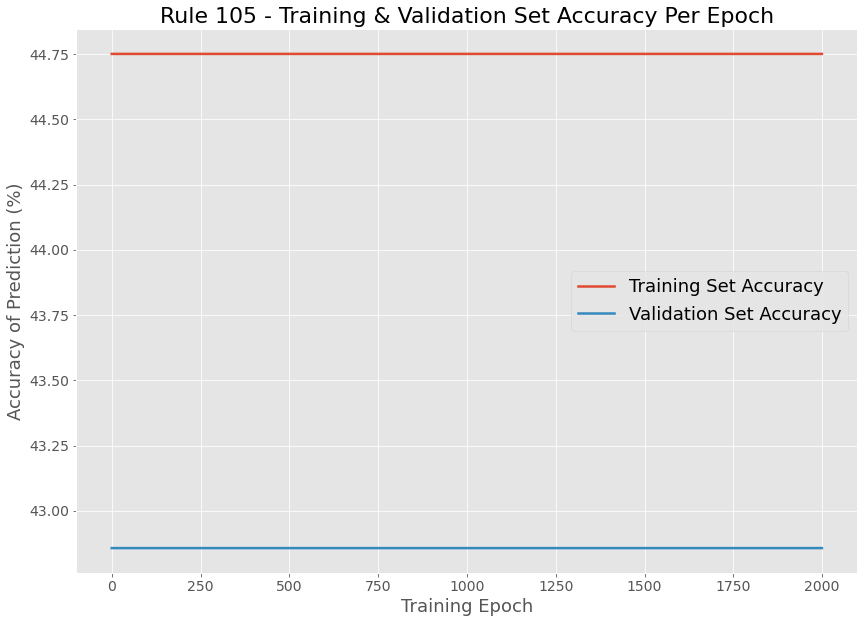

Highest Training Accuracy = 44.751381215469614
The epoch for which these values were obtained = 1999
Highest Validation Accuracy = 42.857142857142854
The epoch for which these values were obtained = 1999


In [61]:
### = Main Section/Comment
# = Sub Section/Comment

###Initializing variables.
#Initialized weight vector.
w = np.zeros(len(training_data[0][0])) 

#Vote count and y_prime.
c = 0
y_prime = int

#Updated c*w.
voteWeightVector = 0 

#Lists for keeping count of the accuracy.
lforTrain = np.zeros(len(training_data))
lforVal = np.zeros(len(validation_data))

#Counts for accuracy check.
countforTrain = 0 
countforValid = 0
prediction = 0 
accTrain = 0 
accValid = 0
previousaccTrain = 0
previousaccVal = 0
matchTrain = 0
matchVal = 0 
epochcount = 0
epochcountVal = 0
plotlistTrain = []
plotlistValid = []
xlist = []
curious_list = []

###Used to train the Voted Perceptron to convergence.
for epoch in range(2000):

  countforTrain = 0
  countforValid = 0 
  voteWeightVector = 0
  curious_list = []

  ###The Voted Perceptron algorithm, with 0(1) memory.
  for i in range(len(training_data)):

    #Activation function.
    if np.dot(w, training_data[i][0]) >= 0:
        y_prime = 1
    else:
        y_prime = 0

    #Vote count.
    if y_prime == training_data[i][1]:
        c += 1

    #If y_prime guess is incorrect, then w*c is updated.
    else:
        voteWeightVector += np.dot(w, c)

        c = 1
        signSwitch = [element * (training_data[i][1] - y_prime) for element 
                     in training_data[i][0]]
        w = list(map(add, w, signSwitch))
  
  #Updating the w*c again. Making sure latest w and number
  #...of votes gets accounted for. 
  voteWeightVector += np.dot(w, c)

  ###Training Set - Making a prediction and accuracy count for epoch.
  for k in range(len(training_data)):
    if np.dot(voteWeightVector, training_data[k][0]) >= 0:
      lforTrain[k] = 1
    else:
      lforTrain[k] = 0
    if lforTrain[k] == training_data[k][1]:
      countforTrain += 1
  accTrain = (countforTrain/len(training_data)) * 100

  ###Validation Set - Making a prediction and accuracy count for epoch.
  for k in range(len(validation_data)):
    if np.dot(voteWeightVector, validation_data[k][0]) >= 0:
        lforVal[k] = 1
    else:
        lforVal[k] = 0
    if lforVal[k] == validation_data[k][1]:
        countforValid += 1
    elif lforVal[k] == 1 and validation_data[k][1] == 0:
        curious_list.append(k)
  accValid = (countforValid/len(validation_data)) * 100

  ###Lists for plotting training/validation set accuracy per epoch.
  plotlistTrain.append(accTrain)
  plotlistValid.append(accValid)

  #List for x-axis in plot.
  xlist.append(epoch)

  ###Keeping track of the epoch which has highest training accuracy.
  if accTrain >= previousaccTrain:
    previousaccTrain = accTrain
    matchTrain = accTrain
    epochcount = epoch
    
  ###Keeping track of the epoch which has highest validation accuracy.
  if accValid >= previousaccVal:
    previousaccVal = accValid
    matchVal = accValid
    epochcountVal = epoch
  
###Calling the plot.
plt.figure(figsize=(14,10))
plt.plot(xlist, plotlistTrain, label='Training Set Accuracy', lw=2.5)
plt.plot(xlist, plotlistValid, label='Validation Set Accuracy', lw=2.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Rule 105 - Training & Validation Set Accuracy Per Epoch', fontsize=22)
plt.xlabel('Training Epoch', fontsize=18)
plt.ylabel('Accuracy of Prediction (%)', fontsize=18)
plt.legend(fontsize=18)
plt.savefig("ValidSetAccuracyVotedPerceptron.png", bbox_inches="tight")
plt.show()

###Prints the highest validation set accuracy, the corresponding...
#... training accuracy and the epoch.
print("Highest Training Accuracy =", matchTrain)
print("The epoch for which these values were obtained =", epochcount)
print("Highest Validation Accuracy =", matchVal)
print("The epoch for which these values were obtained =", epochcountVal)

**This is because the deviation distance is the same for every perturbation possible within the state space. No discernable difference between emergent structure and the underlying structure.**

## Another Rule (90)

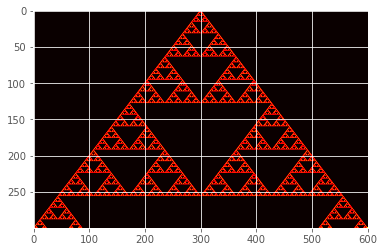

In [68]:
rule_function_use = make_rule(90)

plt.imshow(apply_rule(rule_function_use, 300, False, 0, 0), cmap='hot', aspect='auto')

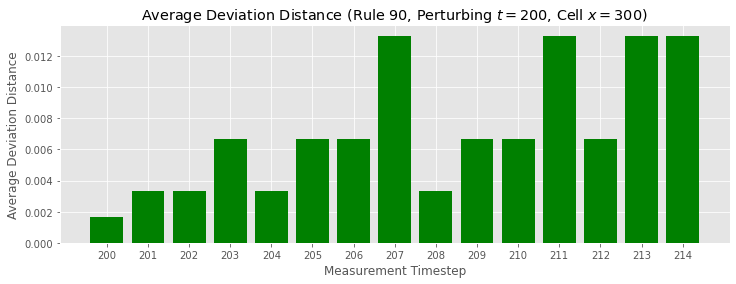

In [69]:
measurement_timestep_list = [i for i in range(200, 215)]
average_list = single_perturbation_multiple_timesteps(rule_function_use, 300, 200, 300, 215)
plot_for_average(average_list, measurement_timestep_list, "Average Deviation Distance (Rule 90, Perturbing $t = 200$, Cell $x = 300$)", "Measurement Timestep", "Average Deviation Distance")

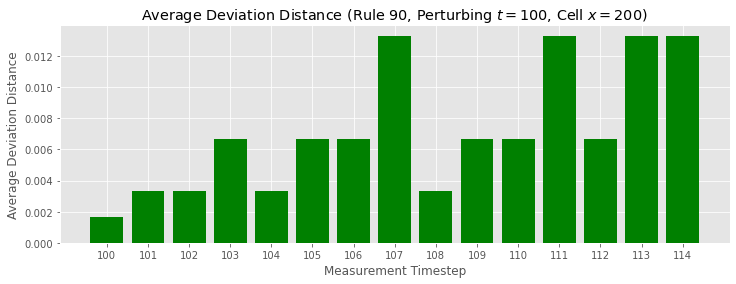

In [70]:
measurement_timestep_list = [i for i in range(100, 115)]
average_list = single_perturbation_multiple_timesteps(rule_function_use, 300, 100, 200, 115)
plot_for_average(average_list, measurement_timestep_list, "Average Deviation Distance (Rule 90, Perturbing $t = 100$, Cell $x = 200$)", "Measurement Timestep", "Average Deviation Distance")

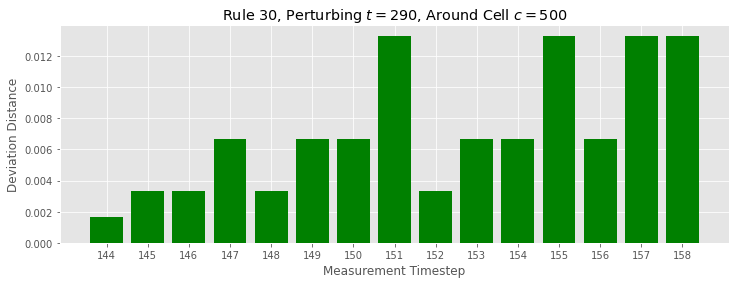

In [136]:
measurement_timestep_list = [i for i in range(144, 159)]
average_list = single_perturbation_multiple_timesteps(rule_function_use, 300, 144, 342, 159)
plot_for_average(average_list, measurement_timestep_list, "Rule 30, Perturbing $t = 290$, Around Cell $c = 500$", "Measurement Timestep", "Deviation Distance")

**We see that we get no discernable difference again. There is no change in deviation distance no matter where the perturbation takes place.**

Rule 90 and Rule 102 are called additive cellular automata. This means that, if two initial states are combined by computing the exclusive or of each their states, then their subsequent configurations will be combined in the same way. More generally, one can partition any configuration of Rule 90 into two subsets with disjoint nonzero cells, evolve the two subsets separately, and compute each successive configuration of the original automaton as the exclusive or of the configurations on the same time steps of the two subsets. - https://link.springer.com/article/10.1007/BF01223745

## Another Rule (75)

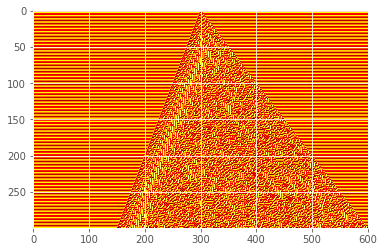

In [137]:
rule_function_use = make_rule(75)

plt.imshow(apply_rule(rule_function_use, 300, False, 0, 0), cmap='hot', aspect='auto')

In [138]:
emergent_shape = (10, 10)

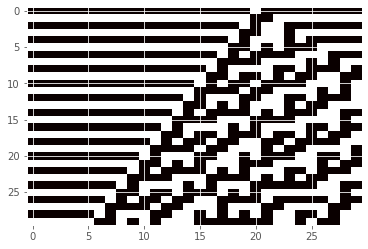

In [139]:
matrix_perturb = apply_rule(rule_function_use, 300, True, 1, 299)
matrix_unperturb = apply_rule(rule_function_use, 300, False, 0, 0)

matrix_perturb_region_check = matrix_perturb[0:30, 290:300]
matrix_unperturb_region_check = matrix_unperturb[0:30, 280:310]

plt.imshow(matrix_unperturb_region_check, cmap='hot', aspect='auto')

whatsup 66 121 60.0 40.0


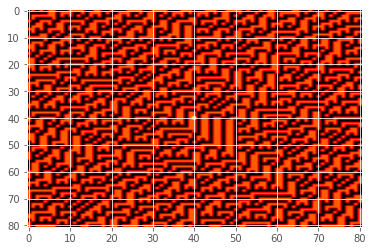

In [140]:
timestep = 130
cell = 345
tup = emergent_shape
cell_one_number = 0
cell_number = 0
length = math.floor(tup[0]/2) 
width = math.floor(tup[1]/2)


matrix_unperturb = apply_rule(rule_function_use, 300, False, 0, 0)
matrix_unperturb[timestep, cell] = 2

matrix_unperturb_region_check = matrix_unperturb[timestep-40:timestep+41, cell-40:cell+41]

submatrix = matrix_unperturb[timestep-length:timestep+(length+1), cell-width:cell+(width+1)]

for row in submatrix:
    for cell in row:
        cell_number += 1
        if cell == 1:
            cell_one_number += 1
 

area = (math.floor(tup[0]) * math.floor(tup[1]))

if cell_one_number >= (.65 * area) or cell_one_number <= (.35 * area):
    emergence_guess = 1
    print('whatsup', cell_one_number, cell_number,.60 * area,.40 * area)

else:
    emergence_guess = 0
    print('nah', cell_one_number, cell_number,.60 * area,.40 * area)


plt.imshow(matrix_unperturb_region_check, cmap='hot', aspect='auto')

In [141]:
check_emergence_modified(rule_function_use, 300, 130, 345, emergent_shape)

0

In [142]:
def check_emergence_modified(rule_function, n, timestep, cell, tup):
    cell_one_number = 0
    matrix_unperturb = apply_rule(rule_function, n, False, 0, 0)
    
    value_holder = matrix_unperturb[timestep, cell]
    matrix_unperturb[timestep, cell] = 2
    
    length = math.floor(tup[0]/2) 
    width = math.floor(tup[1]/2)
    
    submatrix = matrix_unperturb[timestep-length:timestep+(length+1), cell-width:cell+(width+1)]

    for row in submatrix:
        for cell in row:
            if cell == 1:
                cell_one_number += 1
    
    area = (math.floor(tup[0]) * math.floor(tup[1]))
    
    if cell_one_number >= (.65 * area) or cell_one_number <= (.35 * area):
        emergence_guess = 1
    else:
        emergence_guess = 0

    matrix_unperturb[timestep, cell] = value_holder    

    return emergence_guess 

In [143]:
# training_data_list = collect_training_data_modified(rule_function_use, 300, 20000, "half_triangle_right_skew", emergent_shape)

# with open("Saved_Training_Data_For_Rule75.txt", "wb") as fp:   #Pickling
#     pickle.dump(training_data_list, fp)

In [76]:
count = 0

with open("Saved_Training_Data_For_Rule75.txt", "rb") as fp:   # Unpickling
    training_data = pickle.load(fp)
    
for item in training_data:
    if item[1] == 1:
        training_data_test.append(item)
        count += 1
        print(item)
        
print(count)

[array([0.00166389, 0.00332779, 0.00499168, 0.00554631, 0.00776484,
       0.00721021, 0.00776484, 0.01053799, 0.00721021, 0.00942873,
       0.01220189, 0.01331115, 0.01497504, 0.01442041, 0.01497504]), 1, 98, 281]
[array([0.00166389, 0.00388242, 0.00388242, 0.00554631, 0.00942873,
       0.00942873, 0.00831947, 0.01053799, 0.01053799, 0.01442041,
       0.0160843 , 0.01386578, 0.01552967, 0.02107598, 0.0160843 ]), 1, 271, 374]
[array([0.00166389, 0.00388242, 0.00554631, 0.00776484, 0.00998336,
       0.00831947, 0.00831947, 0.01220189, 0.01331115, 0.01220189,
       0.01941209, 0.01552967, 0.0177482 , 0.02052135, 0.01885746]), 1, 109, 288]
[array([0.00166389, 0.00277316, 0.00554631, 0.00721021, 0.00942873,
       0.01109262, 0.0088741 , 0.01220189, 0.01164725, 0.01830283,
       0.01331115, 0.01109262, 0.01275652, 0.01220189, 0.01442041]), 1, 236, 199]
[array([0.00166389, 0.00332779, 0.00499168, 0.00554631, 0.00721021,
       0.00721021, 0.00665557, 0.01164725, 0.00721021, 0.01164725

In [145]:
# validation_data_list = collect_training_data_modified(rule_function_use, 300, 10000, "half_triangle_right_skew", emergent_shape)

# with open("Saved_Validation_Data_For_Rule75.txt", "wb") as pf:   #Pickling
#     pickle.dump(validation_data_list, pf)

In [75]:
count = 0 

with open("Saved_Validation_Data_For_Rule75.txt", "rb") as pf:   # Unpickling
    validation_data = pickle.load(pf)

for item in validation_data:
    if item[1] == 0:
        print(item)
        count += 1
        
print(count)

[array([0.00166389, 0.00277316, 0.00388242, 0.00665557, 0.00721021,
       0.00776484, 0.00665557, 0.00998336, 0.01053799, 0.00942873,
       0.01275652, 0.01220189, 0.01220189, 0.01830283, 0.01497504]), 0, 140, 408]
[array([0.00166389, 0.00277316, 0.00443705, 0.00610094, 0.00721021,
       0.00831947, 0.01109262, 0.01220189, 0.01164725, 0.01164725,
       0.01663894, 0.01719357, 0.01552967, 0.0177482 , 0.02052135]), 0, 35, 286]
[array([0.00166389, 0.00443705, 0.00665557, 0.00831947, 0.00776484,
       0.00998336, 0.00665557, 0.00721021, 0.00998336, 0.01331115,
       0.01220189, 0.0160843 , 0.01719357, 0.01996672, 0.01552967]), 0, 146, 326]
[array([0.00166389, 0.00443705, 0.00499168, 0.00554631, 0.00721021,
       0.00665557, 0.00721021, 0.00776484, 0.00942873, 0.01220189,
       0.01053799, 0.01109262, 0.01497504, 0.01830283, 0.01663894]), 0, 85, 267]
[array([0.00166389, 0.00388242, 0.00332779, 0.00443705, 0.00721021,
       0.00721021, 0.00776484, 0.00776484, 0.00942873, 0.01109262,

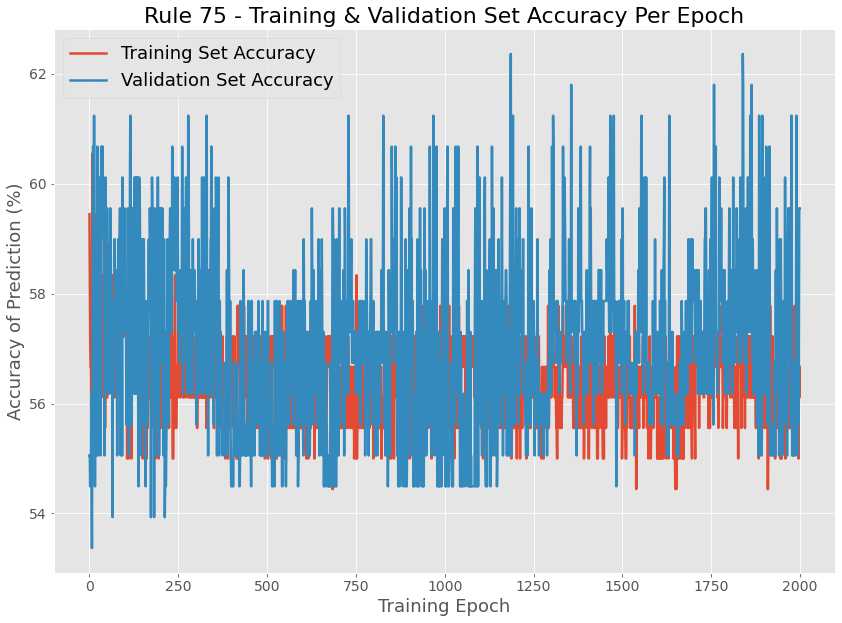

Highest Training Accuracy = 60.55555555555555
The epoch for which these values were obtained = 9
Highest Validation Accuracy = 62.35955056179775
The epoch for which these values were obtained = 1839


In [78]:
### = Main Section/Comment
# = Sub Section/Comment

###Initializing variables.
#Initialized weight vector.
w = np.zeros(len(training_data[0][0])) 

#Vote count and y_prime.
c = 0
y_prime = int

#Updated c*w.
voteWeightVector = 0 

#Lists for keeping count of the accuracy.
lforTrain = np.zeros(len(training_data))
lforVal = np.zeros(len(validation_data))

#Counts for accuracy check.
countforTrain = 0 
countforValid = 0
prediction = 0 
accTrain = 0 
accValid = 0
previousaccTrain = 0
previousaccVal = 0
matchTrain = 0
matchVal = 0 
epochcount = 0
epochcountVal = 0
plotlistTrain = []
plotlistValid = []
xlist = []
curious_list = []

###Used to train the Voted Perceptron to convergence.
for epoch in range(2000):

  countforTrain = 0
  countforValid = 0 
  voteWeightVector = 0
  curious_list = []

  ###The Voted Perceptron algorithm, with 0(1) memory.
  for i in range(len(training_data)):

    #Activation function.
    if np.dot(w, training_data[i][0]) >= 0:
        y_prime = 1
    else:
        y_prime = 0

    #Vote count.
    if y_prime == training_data[i][1]:
        c += 1

    #If y_prime guess is incorrect, then w*c is updated.
    else:
        voteWeightVector += np.dot(w, c)

        c = 1
        signSwitch = [element * (training_data[i][1] - y_prime) for element 
                     in training_data[i][0]]
        w = list(map(add, w, signSwitch))
  
  #Updating the w*c again. Making sure latest w and number
  #...of votes gets accounted for. 
  voteWeightVector += np.dot(w, c)

  ###Training Set - Making a prediction and accuracy count for epoch.
  for k in range(len(training_data)):
    if np.dot(voteWeightVector, training_data[k][0]) >= 0:
      lforTrain[k] = 1
    else:
      lforTrain[k] = 0
    if lforTrain[k] == training_data[k][1]:
      countforTrain += 1
  accTrain = (countforTrain/len(training_data)) * 100

  ###Validation Set - Making a prediction and accuracy count for epoch.
  for k in range(len(validation_data)):
    if np.dot(voteWeightVector, validation_data[k][0]) >= 0:
        lforVal[k] = 1
    else:
        lforVal[k] = 0
    if lforVal[k] == validation_data[k][1]:
        countforValid += 1
    elif lforVal[k] == 1 and validation_data[k][1] == 0:
        curious_list.append(k)
  accValid = (countforValid/len(validation_data)) * 100

  ###Lists for plotting training/validation set accuracy per epoch.
  plotlistTrain.append(accTrain)
  plotlistValid.append(accValid)

  #List for x-axis in plot.
  xlist.append(epoch)

  ###Keeping track of the epoch which has highest training accuracy.
  if accTrain >= previousaccTrain:
    previousaccTrain = accTrain
    matchTrain = accTrain
    epochcount = epoch
    
  ###Keeping track of the epoch which has highest validation accuracy.
  if accValid >= previousaccVal:
    previousaccVal = accValid
    matchVal = accValid
    epochcountVal = epoch
  
###Calling the plot.
plt.figure(figsize=(14,10))
plt.plot(xlist, plotlistTrain, label='Training Set Accuracy', lw=2.5)
plt.plot(xlist, plotlistValid, label='Validation Set Accuracy', lw=2.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Rule 75 - Training & Validation Set Accuracy Per Epoch', fontsize=22)
plt.xlabel('Training Epoch', fontsize=18)
plt.ylabel('Accuracy of Prediction (%)', fontsize=18)
plt.legend(fontsize=18)
plt.savefig("ValidSetAccuracyVotedPerceptron.png", bbox_inches="tight")
plt.show()

###Prints the highest validation set accuracy, the corresponding...
#... training accuracy and the epoch.
print("Highest Training Accuracy =", matchTrain)
print("The epoch for which these values were obtained =", epochcount)
print("Highest Validation Accuracy =", matchVal)
print("The epoch for which these values were obtained =", epochcountVal)

# Can we predict Rule AND Emergent Structure? 

In [113]:
# For rule30.

with open("Saved_Training_Data.txt", "rb") as fp:   # Unpickling
    training_data_for_rule30 = pickle.load(fp)
    
for item in training_data_for_rule30:
    item.append(0)
    print(item)

[array([0.00166389, 0.00221852, 0.00554631, 0.00665557, 0.00831947,
       0.00998336, 0.00998336, 0.01053799, 0.01386578, 0.01053799,
       0.01275652, 0.0160843 , 0.0160843 , 0.01941209, 0.02052135]), 0, 229, 77, 0]
[array([0.00166389, 0.00388242, 0.00554631, 0.00610094, 0.00665557,
       0.00831947, 0.01109262, 0.01331115, 0.01164725, 0.01442041,
       0.01719357, 0.01220189, 0.0160843 , 0.0160843 , 0.01996672]), 0, 255, 166, 0]
[array([0.00166389, 0.00332779, 0.00610094, 0.00610094, 0.00721021,
       0.00721021, 0.00942873, 0.01109262, 0.01275652, 0.01220189,
       0.0160843 , 0.01719357, 0.0177482 , 0.01497504, 0.0177482 ]), 0, 108, 203, 0]
[array([0.00166389, 0.00332779, 0.00443705, 0.00499168, 0.00721021,
       0.00998336, 0.00831947, 0.01164725, 0.01275652, 0.01331115,
       0.01386578, 0.01719357, 0.01442041, 0.0160843 , 0.02107598]), 0, 82, 245, 0]
[array([0.00166389, 0.00332779, 0.00443705, 0.00499168, 0.00721021,
       0.00831947, 0.00942873, 0.01275652, 0.01109262,

In [114]:
# Val for rule30.

with open("Saved_Validation_Data.txt", "rb") as pf:   # Unpickling
    validation_data_for_rule30 = pickle.load(pf)
    
for item in validation_data_for_rule30:
    item.append(0)
    print(item)

[array([0.00166389, 0.00332779, 0.00499168, 0.00554631, 0.00776484,
       0.0088741 , 0.00942873, 0.01053799, 0.01331115, 0.0177482 ,
       0.01552967, 0.01552967, 0.01996672, 0.01996672, 0.02273988]), 0, 212, 89, 0]
[array([0.00166389, 0.00388242, 0.00499168, 0.00554631, 0.00499168,
       0.00776484, 0.0088741 , 0.00776484, 0.00942873, 0.01552967,
       0.01220189, 0.01164725, 0.01331115, 0.01275652, 0.01663894]), 0, 144, 370, 0]
[array([0.00166389, 0.00332779, 0.00499168, 0.00610094, 0.0088741 ,
       0.0088741 , 0.00942873, 0.01164725, 0.01386578, 0.01830283,
       0.01442041, 0.01663894, 0.02107598, 0.02273988, 0.02717693]), 0, 8, 292, 0]
[array([0.00166389, 0.00277316, 0.00499168, 0.00554631, 0.00554631,
       0.00776484, 0.00942873, 0.00998336, 0.01053799, 0.01109262,
       0.01386578, 0.01442041, 0.01552967, 0.0177482 , 0.01941209]), 0, 54, 273, 0]
[array([0.00166389, 0.00277316, 0.00610094, 0.00665557, 0.00721021,
       0.00831947, 0.00831947, 0.00831947, 0.01109262, 0

In [115]:
# For rule110.

with open("Saved_Training_Data_For_Rule110.txt", "rb") as fp:   # Unpickling
    training_data_for_rule110 = pickle.load(fp)
    
for item in training_data_for_rule110:
    item.append(1)
    print(item)
    
print(len(training_data_for_rule110))

[array([0.00166389, 0.00332779, 0.00332779, 0.00554631, 0.00388242,
       0.00554631, 0.00776484, 0.0088741 , 0.00776484, 0.00831947,
       0.00998336, 0.00942873, 0.01275652, 0.00998336, 0.00998336]), 0, 195, 287, 1]
[array([0.00166389, 0.00277316, 0.00499168, 0.00665557, 0.00554631,
       0.0088741 , 0.00831947, 0.01386578, 0.01164725, 0.01497504,
       0.01386578, 0.01275652, 0.01109262, 0.01719357, 0.01552967]), 0, 15, 287, 1]
[array([0.00166389, 0.00332779, 0.00388242, 0.00443705, 0.00721021,
       0.00776484, 0.0088741 , 0.01109262, 0.01386578, 0.01164725,
       0.01331115, 0.01164725, 0.01275652, 0.01164725, 0.0177482 ]), 0, 154, 150, 1]
[array([0.00166389, 0.00277316, 0.00499168, 0.00499168, 0.00776484,
       0.0088741 , 0.00610094, 0.0088741 , 0.01053799, 0.01220189,
       0.00942873, 0.01275652, 0.01275652, 0.01053799, 0.00998336]), 0, 106, 297, 1]
[array([0.00166389, 0.00277316, 0.00443705, 0.00665557, 0.00499168,
       0.00665557, 0.00554631, 0.00776484, 0.01053799

In [116]:
# Val for rule110.

with open("Saved_Validation_Data_For_Rule110.txt", "rb") as pf:   # Unpickling
    validation_data_for_rule110 = pickle.load(pf)

for item in validation_data_for_rule110:
    item.append(1)
    print(item)

[array([0.00166389, 0.00221852, 0.00388242, 0.00554631, 0.00554631,
       0.00776484, 0.0088741 , 0.01053799, 0.01164725, 0.00998336,
       0.01386578, 0.01552967, 0.01386578, 0.0160843 , 0.01885746]), 0, 121, 205, 1]
[array([0.00166389, 0.00388242, 0.00332779, 0.00610094, 0.00499168,
       0.00776484, 0.00831947, 0.01164725, 0.01220189, 0.01220189,
       0.01442041, 0.01941209, 0.0160843 , 0.01442041, 0.0177482 ]), 0, 164, 137, 1]
[array([0.00166389, 0.00277316, 0.00388242, 0.00721021, 0.00554631,
       0.00554631, 0.00721021, 0.0088741 , 0.01220189, 0.01275652,
       0.01053799, 0.01164725, 0.01386578, 0.01275652, 0.01442041]), 0, 215, 265, 1]
[array([0.00166389, 0.00332779, 0.00499168, 0.00610094, 0.00665557,
       0.00721021, 0.00776484, 0.00942873, 0.01053799, 0.01053799,
       0.0088741 , 0.01442041, 0.01053799, 0.00998336, 0.01497504]), 0, 234, 213, 1]
[array([0.00166389, 0.00332779, 0.00443705, 0.00610094, 0.00554631,
       0.00721021, 0.00721021, 0.00721021, 0.0116472

Now we implement a voted perceptron to differentiate between the two rules and whether or not the deviation distance can from an emergent structure.  

In [117]:
# Concatenating training data for rule30 and rule110.

count = 0

training_data = training_data_for_rule30
    
for item in training_data_for_rule110:
    training_data.append(item)
    
    
print(training_data)

[[array([0.00166389, 0.00221852, 0.00554631, 0.00665557, 0.00831947,
       0.00998336, 0.00998336, 0.01053799, 0.01386578, 0.01053799,
       0.01275652, 0.0160843 , 0.0160843 , 0.01941209, 0.02052135]), 0, 229, 77, 0], [array([0.00166389, 0.00388242, 0.00554631, 0.00610094, 0.00665557,
       0.00831947, 0.01109262, 0.01331115, 0.01164725, 0.01442041,
       0.01719357, 0.01220189, 0.0160843 , 0.0160843 , 0.01996672]), 0, 255, 166, 0], [array([0.00166389, 0.00332779, 0.00610094, 0.00610094, 0.00721021,
       0.00721021, 0.00942873, 0.01109262, 0.01275652, 0.01220189,
       0.0160843 , 0.01719357, 0.0177482 , 0.01497504, 0.0177482 ]), 0, 108, 203, 0], [array([0.00166389, 0.00332779, 0.00443705, 0.00499168, 0.00721021,
       0.00998336, 0.00831947, 0.01164725, 0.01275652, 0.01331115,
       0.01386578, 0.01719357, 0.01442041, 0.0160843 , 0.02107598]), 0, 82, 245, 0], [array([0.00166389, 0.00332779, 0.00443705, 0.00499168, 0.00721021,
       0.00831947, 0.00942873, 0.01275652, 0.0110

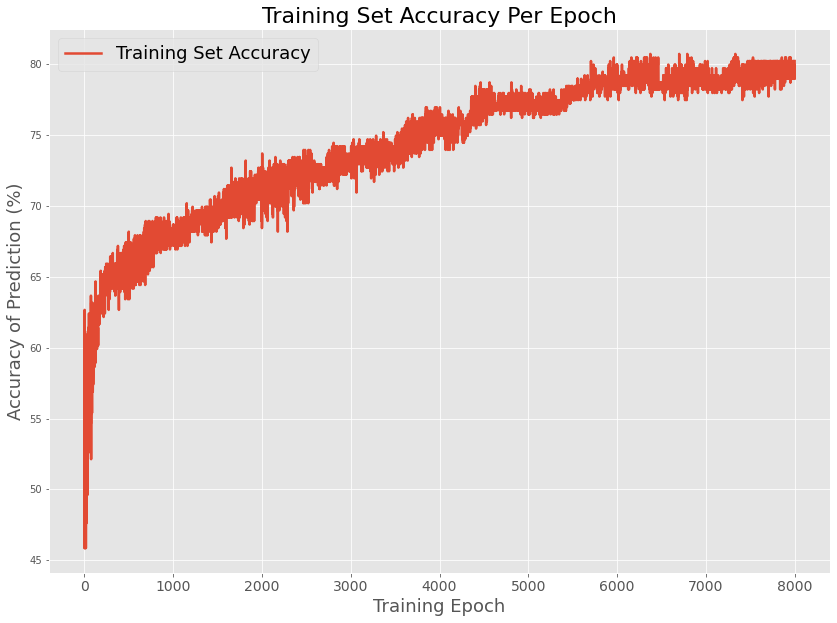

Highest Training Accuracy = 80.7017543859649
The epoch for which these values were obtained = 7331


In [118]:
### = Main Section/Comment
# = Sub Section/Comment

###Initializing variables.
#Initialized weight vector.
w = np.zeros(len(training_data[0][0])) 

#Vote count and y_prime.
c = 0
y_prime = int

#Updated c*w.
voteWeightVector = 0 

#Lists for keeping count of the accuracy.
lforTrain = np.zeros(len(training_data))

#Counts for accuracy check.
countforTrain = 0 
countforValid = 0
prediction = 0 
accTrain = 0 
accValid = 0
previousaccTrain = 0
previousaccVal = 0
matchTrain = 0
matchVal = 0 
epochcount = 0
epochcountVal = 0
plotlistTrain = []
plotlistValid = []
xlist = []

###Used to train the Voted Perceptron to convergence.
for epoch in range(8000):

  countforTrain = 0
  countforValid = 0 
  voteWeightVector = 0

  ###The Voted Perceptron algorithm, with 0(1) memory.
  for i in range(len(training_data)):

    #Activation function.
    if np.dot(w, training_data[i][0]) >= 0:
        y_prime = 1
    else:
        y_prime = 0

    #Vote count.
    if y_prime == training_data[i][-1]:
        c += 1

    #If y_prime guess is incorrect, then w*c is updated.
    else:
        voteWeightVector += np.dot(w, c)

        c = 1
        signSwitch = [element * (training_data[i][-1] - y_prime) for element 
                     in training_data[i][0]]
        w = list(map(add, w, signSwitch))
  
  #Updating the w*c again. Making sure latest w and number
  #...of votes gets accounted for. 
  voteWeightVector += np.dot(w, c)

  ###Training Set - Making a prediction and accuracy count for epoch.
  for k in range(len(training_data)):
    if np.dot(voteWeightVector, training_data[k][0]) >= 0:
      lforTrain[k] = 1
    else:
      lforTrain[k] = 0
    if lforTrain[k] == training_data[k][-1]:
      countforTrain += 1
  accTrain = (countforTrain/len(training_data)) * 100

  ###Lists for plotting training/validation set accuracy per epoch.
  plotlistTrain.append(accTrain)

  #List for x-axis in plot.
  xlist.append(epoch)

  ###Keeping track of the epoch which has highest training accuracy.
  if accTrain >= previousaccTrain:
    previousaccTrain = accTrain
    matchTrain = accTrain
    epochcount = epoch
    
###Calling the plot.
plt.figure(figsize=(14,10))
plt.plot(xlist, plotlistTrain, label='Training Set Accuracy', lw=2.5)
plt.xticks(fontsize=14)
plt.title('Training Set Accuracy Per Epoch', fontsize=22)
plt.xlabel('Training Epoch', fontsize=18)
plt.ylabel('Accuracy of Prediction (%)', fontsize=18)
plt.legend(fontsize=18)
plt.savefig("ValidSetAccuracyVotedPerceptron.png", bbox_inches="tight")
plt.show()

###Prints the highest validation set accuracy, the corresponding...
#... training accuracy and the epoch.
print("Highest Training Accuracy =", matchTrain)
print("The epoch for which these values were obtained =", epochcount)


Including Validation Data?

In [119]:
# Concatenating validation data for rule30 and rule110.

count = 0

validation_data = validation_data_for_rule30
    
for item in validation_data_for_rule110:
    validation_data.append(item)
    
    
print(validation_data)

[[array([0.00166389, 0.00332779, 0.00499168, 0.00554631, 0.00776484,
       0.0088741 , 0.00942873, 0.01053799, 0.01331115, 0.0177482 ,
       0.01552967, 0.01552967, 0.01996672, 0.01996672, 0.02273988]), 0, 212, 89, 0], [array([0.00166389, 0.00388242, 0.00499168, 0.00554631, 0.00499168,
       0.00776484, 0.0088741 , 0.00776484, 0.00942873, 0.01552967,
       0.01220189, 0.01164725, 0.01331115, 0.01275652, 0.01663894]), 0, 144, 370, 0], [array([0.00166389, 0.00332779, 0.00499168, 0.00610094, 0.0088741 ,
       0.0088741 , 0.00942873, 0.01164725, 0.01386578, 0.01830283,
       0.01442041, 0.01663894, 0.02107598, 0.02273988, 0.02717693]), 0, 8, 292, 0], [array([0.00166389, 0.00277316, 0.00499168, 0.00554631, 0.00554631,
       0.00776484, 0.00942873, 0.00998336, 0.01053799, 0.01109262,
       0.01386578, 0.01442041, 0.01552967, 0.0177482 , 0.01941209]), 0, 54, 273, 0], [array([0.00166389, 0.00277316, 0.00610094, 0.00665557, 0.00721021,
       0.00831947, 0.00831947, 0.00831947, 0.011092

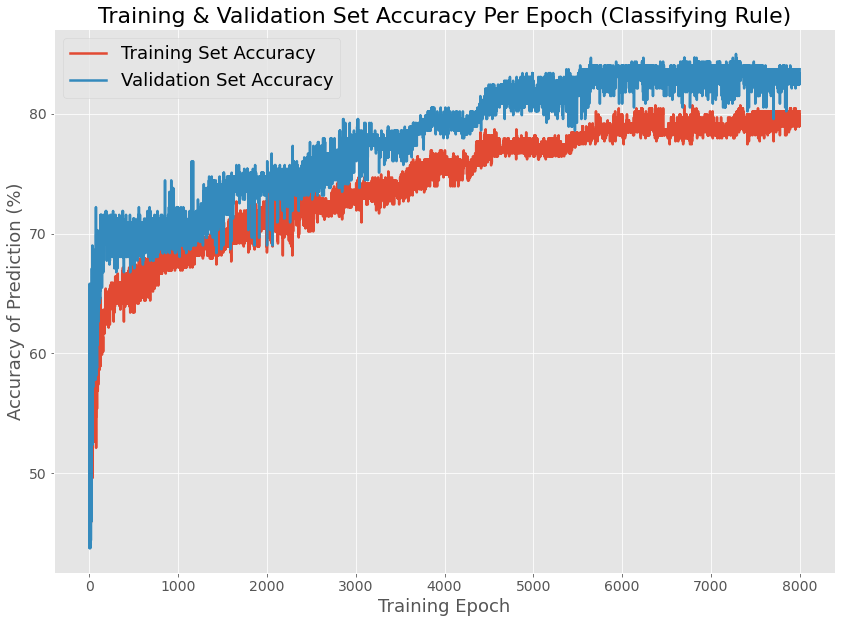

Highest Training Accuracy = 80.7017543859649
The epoch for which these values were obtained = 7331
Highest Validation Accuracy = 84.98402555910543
The epoch for which these values were obtained = 7282


In [121]:
### = Main Section/Comment
# = Sub Section/Comment

###Initializing variables.
#Initialized weight vector.
w = np.zeros(len(training_data[0][0])) 

#Vote count and y_prime.
c = 0
y_prime = int

#Updated c*w.
voteWeightVector = 0 

#Lists for keeping count of the accuracy.
lforTrain = np.zeros(len(training_data))
lforVal = np.zeros(len(validation_data))

#Counts for accuracy check.
countforTrain = 0 
countforValid = 0
prediction = 0 
accTrain = 0 
accValid = 0
previousaccTrain = 0
previousaccVal = 0
matchTrain = 0
matchVal = 0 
epochcount = 0
epochcountVal = 0
plotlistTrain = []
plotlistValid = []
xlist = []
curious_list = []

###Used to train the Voted Perceptron to convergence.
for epoch in range(8000):

  countforTrain = 0
  countforValid = 0 
  voteWeightVector = 0
  curious_list = []

  ###The Voted Perceptron algorithm, with 0(1) memory.
  for i in range(len(training_data)):

    #Activation function.
    if np.dot(w, training_data[i][0]) >= 0:
        y_prime = 1
    else:
        y_prime = 0

    #Vote count.
    if y_prime == training_data[i][-1]:
        c += 1

    #If y_prime guess is incorrect, then w*c is updated.
    else:
        voteWeightVector += np.dot(w, c)

        c = 1
        signSwitch = [element * (training_data[i][-1] - y_prime) for element 
                     in training_data[i][0]]
        w = list(map(add, w, signSwitch))
  
  #Updating the w*c again. Making sure latest w and number
  #...of votes gets accounted for. 
  voteWeightVector += np.dot(w, c)

  ###Training Set - Making a prediction and accuracy count for epoch.
  for k in range(len(training_data)):
    if np.dot(voteWeightVector, training_data[k][0]) >= 0:
      lforTrain[k] = 1
    else:
      lforTrain[k] = 0
    if lforTrain[k] == training_data[k][-1]:
      countforTrain += 1
  accTrain = (countforTrain/len(training_data)) * 100

  ###Validation Set - Making a prediction and accuracy count for epoch.
  for k in range(len(validation_data)):
    if np.dot(voteWeightVector, validation_data[k][0]) >= 0:
        lforVal[k] = 1
    else:
        lforVal[k] = 0
    if lforVal[k] == validation_data[k][-1]:
        countforValid += 1
  accValid = (countforValid/len(validation_data)) * 100

  ###Lists for plotting training/validation set accuracy per epoch.
  plotlistTrain.append(accTrain)
  plotlistValid.append(accValid)

  #List for x-axis in plot.
  xlist.append(epoch)

  ###Keeping track of the epoch which has highest training accuracy.
  if accTrain >= previousaccTrain:
    previousaccTrain = accTrain
    matchTrain = accTrain
    epochcount = epoch
    
  ###Keeping track of the epoch which has highest validation accuracy.
  if accValid >= previousaccVal:
    previousaccVal = accValid
    matchVal = accValid
    epochcountVal = epoch
    voteWeightVectorForRuleCheck = voteWeightVector
  
###Calling the plot.
plt.figure(figsize=(14,10))
plt.plot(xlist, plotlistTrain, label='Training Set Accuracy', lw=2.5)
plt.plot(xlist, plotlistValid, label='Validation Set Accuracy', lw=2.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Training & Validation Set Accuracy Per Epoch (Classifying Rule)', fontsize=22)
plt.xlabel('Training Epoch', fontsize=18)
plt.ylabel('Accuracy of Prediction (%)', fontsize=18)
plt.legend(fontsize=18)
plt.savefig("ValidSetAccuracyVotedPerceptron.png", bbox_inches="tight")
plt.show()

###Prints the highest validation set accuracy, the corresponding...
#... training accuracy and the epoch.
print("Highest Training Accuracy =", matchTrain)
print("The epoch for which these values were obtained =", epochcount)
print("Highest Validation Accuracy =", matchVal)
print("The epoch for which these values were obtained =", epochcountVal)

Now learn for each specific rule the emergent structure check.

In [156]:
# For rule30.

with open("Saved_Training_Data.txt", "rb") as fp:   # Unpickling
    training_data_for_rule30 = pickle.load(fp)
    
for item in training_data_for_rule30:
    item.append(0)
    print(item)

[array([0.00166389, 0.00221852, 0.00554631, 0.00665557, 0.00831947,
       0.00998336, 0.00998336, 0.01053799, 0.01386578, 0.01053799,
       0.01275652, 0.0160843 , 0.0160843 , 0.01941209, 0.02052135]), 0, 229, 77, 0]
[array([0.00166389, 0.00388242, 0.00554631, 0.00610094, 0.00665557,
       0.00831947, 0.01109262, 0.01331115, 0.01164725, 0.01442041,
       0.01719357, 0.01220189, 0.0160843 , 0.0160843 , 0.01996672]), 0, 255, 166, 0]
[array([0.00166389, 0.00332779, 0.00610094, 0.00610094, 0.00721021,
       0.00721021, 0.00942873, 0.01109262, 0.01275652, 0.01220189,
       0.0160843 , 0.01719357, 0.0177482 , 0.01497504, 0.0177482 ]), 0, 108, 203, 0]
[array([0.00166389, 0.00332779, 0.00443705, 0.00499168, 0.00721021,
       0.00998336, 0.00831947, 0.01164725, 0.01275652, 0.01331115,
       0.01386578, 0.01719357, 0.01442041, 0.0160843 , 0.02107598]), 0, 82, 245, 0]
[array([0.00166389, 0.00332779, 0.00443705, 0.00499168, 0.00721021,
       0.00831947, 0.00942873, 0.01275652, 0.01109262,

In [157]:
# Val for rule30.

with open("Saved_Validation_Data.txt", "rb") as pf:   # Unpickling
    validation_data_for_rule30 = pickle.load(pf)
    
for item in validation_data_for_rule30:
    item.append(0)
    print(item)

[array([0.00166389, 0.00332779, 0.00499168, 0.00554631, 0.00776484,
       0.0088741 , 0.00942873, 0.01053799, 0.01331115, 0.0177482 ,
       0.01552967, 0.01552967, 0.01996672, 0.01996672, 0.02273988]), 0, 212, 89, 0]
[array([0.00166389, 0.00388242, 0.00499168, 0.00554631, 0.00499168,
       0.00776484, 0.0088741 , 0.00776484, 0.00942873, 0.01552967,
       0.01220189, 0.01164725, 0.01331115, 0.01275652, 0.01663894]), 0, 144, 370, 0]
[array([0.00166389, 0.00332779, 0.00499168, 0.00610094, 0.0088741 ,
       0.0088741 , 0.00942873, 0.01164725, 0.01386578, 0.01830283,
       0.01442041, 0.01663894, 0.02107598, 0.02273988, 0.02717693]), 0, 8, 292, 0]
[array([0.00166389, 0.00277316, 0.00499168, 0.00554631, 0.00554631,
       0.00776484, 0.00942873, 0.00998336, 0.01053799, 0.01109262,
       0.01386578, 0.01442041, 0.01552967, 0.0177482 , 0.01941209]), 0, 54, 273, 0]
[array([0.00166389, 0.00277316, 0.00610094, 0.00665557, 0.00721021,
       0.00831947, 0.00831947, 0.00831947, 0.01109262, 0

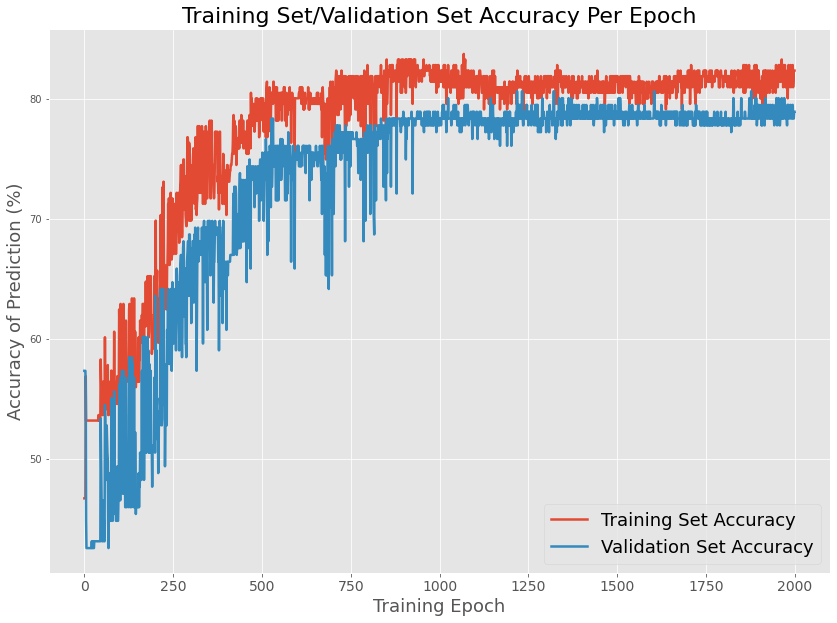

Highest Training Accuracy = 83.79629629629629
The epoch for which these values were obtained = 1068
Highest Validation Accuracy = 80.68181818181817
The epoch for which these values were obtained = 1877


In [158]:
### = Main Section/Comment
# = Sub Section/Comment

###Initializing variables.
#Initialized weight vector.
w = np.zeros(len(training_data_for_rule30[0][0])) 

#Vote count and y_prime.
c = 0
y_prime = int

#Updated c*w.
voteWeightVector = 0 

#Lists for keeping count of the accuracy.
lforTrain = np.zeros(len(training_data_for_rule30))
lforVal = np.zeros(len(validation_data_for_rule30))

#Counts for accuracy check.
countforTrain = 0 
countforValid = 0
prediction = 0 
accTrain = 0 
accValid = 0
previousaccTrain = 0
previousaccVal = 0
matchTrain = 0
matchVal = 0 
epochcount = 0
epochcountVal = 0
plotlistTrain = []
plotlistValid = []
xlist = []
curious_list = []

###Used to train the Voted Perceptron to convergence.
for epoch in range(2000):

  countforTrain = 0
  countforValid = 0 
  voteWeightVector = 0
  curious_list = []

  ###The Voted Perceptron algorithm, with 0(1) memory.
  for i in range(len(training_data_for_rule30)):

    #Activation function.
    if np.dot(w, training_data_for_rule30[i][0]) >= 0:
        y_prime = 1
    else:
        y_prime = 0

    #Vote count.
    if y_prime == training_data_for_rule30[i][1]:
        c += 1

    #If y_prime guess is incorrect, then w*c is updated.
    else:
        voteWeightVector += np.dot(w, c)

        c = 1
        signSwitch = [element * (training_data_for_rule30[i][1] - y_prime) for element 
                     in training_data_for_rule30[i][0]]
        w = list(map(add, w, signSwitch))
  
  #Updating the w*c again. Making sure latest w and number
  #...of votes gets accounted for. 
  voteWeightVector += np.dot(w, c)

  ###Training Set - Making a prediction and accuracy count for epoch.
  for k in range(len(training_data_for_rule30)):
    if np.dot(voteWeightVector, training_data_for_rule30[k][0]) >= 0:
      lforTrain[k] = 1
    else:
      lforTrain[k] = 0
    if lforTrain[k] == training_data_for_rule30[k][1]:
      countforTrain += 1
  accTrain = (countforTrain/len(training_data_for_rule30)) * 100

  ###Validation Set - Making a prediction and accuracy count for epoch.
  for k in range(len(validation_data_for_rule30)):
    if np.dot(voteWeightVector, validation_data_for_rule30[k][0]) >= 0:
        lforVal[k] = 1
    else:
        lforVal[k] = 0
    if lforVal[k] == validation_data_for_rule30[k][1]:
        countforValid += 1
  accValid = (countforValid/len(validation_data_for_rule30)) * 100

  ###Lists for plotting training/validation set accuracy per epoch.
  plotlistTrain.append(accTrain)
  plotlistValid.append(accValid)

  #List for x-axis in plot.
  xlist.append(epoch)

  ###Keeping track of the epoch which has highest training accuracy.
  if accTrain >= previousaccTrain:
    previousaccTrain = accTrain
    matchTrain = accTrain
    epochcount = epoch
    
  ###Keeping track of the epoch which has highest validation accuracy.
  if accValid >= previousaccVal:
    previousaccVal = accValid
    matchVal = accValid
    epochcountVal = epoch
    voteWeightVectorForRule30 = voteWeightVector
  
###Calling the plot.
plt.figure(figsize=(14,10))
plt.plot(xlist, plotlistTrain, label='Training Set Accuracy', lw=2.5)
plt.plot(xlist, plotlistValid, label='Validation Set Accuracy', lw=2.5)
plt.xticks(fontsize=14)
plt.title('Training Set/Validation Set Accuracy Per Epoch', fontsize=22)
plt.xlabel('Training Epoch', fontsize=18)
plt.ylabel('Accuracy of Prediction (%)', fontsize=18)
plt.legend(fontsize=18)
plt.savefig("ValidSetAccuracyVotedPerceptron.png", bbox_inches="tight")
plt.show()

###Prints the highest validation set accuracy, the corresponding...
#... training accuracy and the epoch.
print("Highest Training Accuracy =", matchTrain)
print("The epoch for which these values were obtained =", epochcount)
print("Highest Validation Accuracy =", matchVal)
print("The epoch for which these values were obtained =", epochcountVal)

In [55]:
### = Main Section/Comment
# = Sub Section/Comment

###Initializing variables.
#Initialized weight vector.
w = np.zeros(len(training_data_for_rule110[0][0])) 

#Vote count and y_prime.
c = 0
y_prime = int

#Updated c*w.
voteWeightVector = 0 

#Lists for keeping count of the accuracy.
lforTrain = np.zeros(len(training_data_for_rule110))
lforVal = np.zeros(len(validation_data_for_rule110))

#Counts for accuracy check.
countforTrain = 0 
countforValid = 0
prediction = 0 
accTrain = 0 
accValid = 0
previousaccTrain = 0
previousaccVal = 0
matchTrain = 0
matchVal = 0 
epochcount = 0
epochcountVal = 0
plotlistTrain = []
plotlistValid = []
xlist = []
curious_list = []

###Used to train the Voted Perceptron to convergence.
for epoch in range(2000):

  countforTrain = 0
  countforValid = 0 
  voteWeightVector = 0
  curious_list = []

  ###The Voted Perceptron algorithm, with 0(1) memory.
  for i in range(len(training_data_for_rule110)):

    #Activation function.
    if np.dot(w, training_data_for_rule110[i][0]) >= 0:
        y_prime = 1
    else:
        y_prime = 0

    #Vote count.
    if y_prime == training_data_for_rule110[i][1]:
        c += 1

    #If y_prime guess is incorrect, then w*c is updated.
    else:
        voteWeightVector += np.dot(w, c)

        c = 1
        signSwitch = [element * (training_data_for_rule110[i][1] - y_prime) for element 
                     in training_data_for_rule110[i][0]]
        w = list(map(add, w, signSwitch))
  
  #Updating the w*c again. Making sure latest w and number
  #...of votes gets accounted for. 
  voteWeightVector += np.dot(w, c)

  ###Training Set - Making a prediction and accuracy count for epoch.
  for k in range(len(training_data_for_rule110)):
    if np.dot(voteWeightVector, training_data_for_rule110[k][0]) >= 0:
      lforTrain[k] = 1
    else:
      lforTrain[k] = 0
    if lforTrain[k] == training_data_for_rule110[k][1]:
      countforTrain += 1
  accTrain = (countforTrain/len(training_data_for_rule110)) * 100

  ###Validation Set - Making a prediction and accuracy count for epoch.
  for k in range(len(validation_data_for_rule110)):
    if np.dot(voteWeightVector, validation_data_for_rule110[k][0]) >= 0:
        lforVal[k] = 1
    else:
        lforVal[k] = 0
    if lforVal[k] == validation_data_for_rule110[k][1]:
        countforValid += 1
  accValid = (countforValid/len(validation_data_for_rule110)) * 100

  ###Lists for plotting training/validation set accuracy per epoch.
  plotlistTrain.append(accTrain)
  plotlistValid.append(accValid)

  #List for x-axis in plot.
  xlist.append(epoch)

  ###Keeping track of the epoch which has highest training accuracy.
  if accTrain >= previousaccTrain:
    previousaccTrain = accTrain
    matchTrain = accTrain
    epochcount = epoch
    
  ###Keeping track of the epoch which has highest validation accuracy.
  if accValid >= previousaccVal:
    previousaccVal = accValid
    matchVal = accValid
    epochcountVal = epoch
    voteWeightVectorForRule110 = voteWeightVector
  
###Calling the plot.
plt.figure(figsize=(14,10))
plt.plot(xlist, plotlistTrain, label='Training Set Accuracy', lw=2.5)
plt.plot(xlist, plotlistValid, label='Validation Set Accuracy', lw=2.5)
plt.xticks(fontsize=14)
plt.title('Training Set/Validation Set Accuracy Per Epoch', fontsize=22)
plt.xlabel('Training Epoch', fontsize=18)
plt.ylabel('Accuracy of Prediction (%)', fontsize=18)
plt.legend(fontsize=18)
plt.savefig("ValidSetAccuracyVotedPerceptron.png", bbox_inches="tight")
plt.show()

###Prints the highest validation set accuracy, the corresponding...
#... training accuracy and the epoch.
print("Highest Training Accuracy =", matchTrain)
print("The epoch for which these values were obtained =", epochcount)
print("Highest Validation Accuracy =", matchVal)
print("The epoch for which these values were obtained =", epochcountVal)

NameError: name 'training_data_for_rule110' is not defined

Now check accuracy, this is **NOT** an MLP. Just sequentially applying voted perceptron guesses and counting accuracy. Each layer size is 1, in this sense. 

In [160]:
count = 0

for item in validation_data:
    if np.dot(voteWeightVectorForRuleCheck, item[0]) >= 0:
        rule_guess = 1
    else:
        rule_guess = 0
        
    if rule_guess == 1:
        if np.dot(voteWeightVectorForRule110, item[0]) >= 0:
            emergence_guess = 1
        else:
            emergence_guess = 0
    else:
        if np.dot(voteWeightVectorForRule30, item[0]) >= 0:
            emergence_guess = 1
        else:
            emergence_guess = 0
            
            
    if item[-1] == rule_guess and item[1] == emergence_guess:
        count += 1
        
print((count/len(validation_data))*100)

66.13418530351439


Applying an MLP. 

**TO BE CONTINUED...**

# The Game of Life - Inverse Problem

In [79]:
def initial_state_life(n, num_of_initial_ones):
    initial_matrix_life = np.zeros((n, n))
    count = 0

    for i in range(20):

        row = random.randint(2, (7))
        column = random.randint(2, (7))
        
        if initial_matrix_life[row, column] == 1:
            continue

        else:
            initial_matrix_life[row, column] = 1
            count += 1
            
        if count == num_of_initial_ones:
            break
        
    return initial_matrix_life
    

In [80]:
def game_of_life(initial_matrix, num_of_timesteps):
    
    length = initial_matrix.shape[0]
    
    for k in range(num_of_timesteps):
        updated_matrix = np.zeros((length, length))
        
        for i in range(len(initial_matrix)):
            for j in range(len(initial_matrix)):

                neighbor_count = initial_matrix[i, (j+1)%length] + initial_matrix[i, (j-1)%length] + initial_matrix[(i+1)%length, j] + initial_matrix[(i+1)%length, (j+1)%length] + initial_matrix[(i+1)%length, (j-1)%length] + initial_matrix[(i-1)%length, j] + initial_matrix[(i-1)%length, (j+1)%length] + initial_matrix[(i-1)%length, (j-1)%length] 

                if neighbor_count < 2 or neighbor_count > 3:
                    updated_matrix[i, j] = 0
                elif neighbor_count == 3 and initial_matrix[i, j] == 0:
                    updated_matrix[i, j] = 1
                elif (neighbor_count == 2 or neighbor_count == 3) and initial_matrix[i, j] == 1:
                    updated_matrix[i, j] = 1

        initial_matrix = updated_matrix
        
    
    return updated_matrix       
                

In [83]:
yo = initial_state_life(10, 9)

print(yo)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [84]:
game_of_life(yo, 15)

array([[0., 0., 1., 1., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.]])

In [85]:
def collect_data_life(n, num_of_timesteps, max_number_of_ones, num_of_datapoints_per_number):
    
    final_data_list = []
    final_y_list = []
    
    for num in range(3, max_number_of_ones):
        for i in range(num_of_datapoints_per_number):

            initial_state = initial_state_life(n, num)
            final_state = game_of_life(initial_state, num_of_timesteps)
            
#             data_list.append(final_state)
#             data_list.append(num)
            
#             final_data_list.append(data_list)

            if np.count_nonzero(final_state) == 0:
                continue

            final_state = final_state.flatten()

            final_data_list.append(final_state)
            final_y_list.append(num)
            
        print(num)
    
    return final_data_list, final_y_list
        

In [166]:
# final_list, final_y = collect_data_life(10, 6, 20, 5000)

# with open("Saved_Training_Data_Life_Proof.txt", "wb") as fp:   #Pickling
#     pickle.dump(final_list, fp)
    
# with open("Saved_Training_Data_Life_Proof_ys.txt", "wb") as pf:   #Pickling
#     pickle.dump(final_y, pf)

In [519]:
# final_list, final_y = collect_data_life(10, 6, 20, 5000)

# with open("Saved_Validation_Data_Life_Proof.txt", "wb") as fp:   #Pickling
#     pickle.dump(final_list, fp)
    
# with open("Saved_Validation_Data_Life_Proof_ys.txt", "wb") as pf:   #Pickling
#     pickle.dump(final_y, pf)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [86]:
with open("Saved_Training_Data_Life_Proof.txt", "rb") as pf:   # Unpickling
    final_list = pickle.load(pf)
with open("Saved_Training_Data_Life_Proof_ys.txt", "rb") as fp:   # Unpickling
    final_y = pickle.load(fp)

In [87]:
with open("Saved_Validation_Data_Life_Proof.txt", "rb") as pf:   # Unpickling
    final_list_val = pickle.load(pf)
with open("Saved_Validation_Data_Life_Proof_ys.txt", "rb") as fp:   # Unpickling
    final_y_val = pickle.load(fp)

In [88]:
print(np.count_nonzero(final_list[0]))

print(len(final_list))

3
60723


In [89]:
print(np.count_nonzero(final_list_val[0]))

print(len(final_list_val))

3
60588


## Implementing MLP - Game of Life Question

In [90]:
bag_train = torch.FloatTensor(final_list)
final_y = np.array(final_y) - 3 
final_ys = torch.tensor(final_y, dtype=torch.long)

print(final_y)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [91]:
for i in range(len(final_ys)):
    if final_ys[i] == 10:
        print(i)
        break
        
#27019
#36577

27019


In [92]:
number_yo = np.where(final_ys == 12)

print(number_yo[0][0])

36577


In [93]:
final_ys = final_ys[27019:36577]
bag_train = bag_train[27019:36577]

print(final_ys)

tensor([10, 10, 10,  ..., 11, 11, 11])


In [94]:
final_ys = final_ys - 10

In [95]:
# Calculates accuracy
def accuracy(data, model, y):
    y_scores = model(data)
    y_pred = y_scores.argmax(dim=1)
    correct_pred = (y_pred == y)
#     correct_pred += (y_pred == y-1)
#     correct_pred += (y_pred == y+1)
#     correct_pred += (y_pred == y-2)
#     correct_pred += (y_pred == y+2)
    acc = correct_pred.sum() / len(correct_pred) * 100
    return acc

EPOCH #1:
tensor(0.6932, grad_fn=<NllLossBackward>)
training loss: 0.6932363510131836
training acc: 53.72462844848633
EPOCH #2:
tensor(0.6912, grad_fn=<NllLossBackward>)
training loss: 0.6911855340003967
training acc: 53.525840759277344
EPOCH #3:
tensor(0.6891, grad_fn=<NllLossBackward>)
training loss: 0.6890970468521118
training acc: 53.954803466796875
EPOCH #4:
tensor(0.6875, grad_fn=<NllLossBackward>)
training loss: 0.6874983906745911
training acc: 54.938270568847656
EPOCH #5:
tensor(0.6853, grad_fn=<NllLossBackward>)
training loss: 0.6853170990943909
training acc: 55.37769317626953
EPOCH #6:
tensor(0.6840, grad_fn=<NllLossBackward>)
training loss: 0.683992862701416
training acc: 55.524169921875
EPOCH #7:
tensor(0.6828, grad_fn=<NllLossBackward>)
training loss: 0.6828461289405823
training acc: 56.48671340942383
EPOCH #8:
tensor(0.6807, grad_fn=<NllLossBackward>)
training loss: 0.680692195892334
training acc: 57.12491989135742
EPOCH #9:
tensor(0.6787, grad_fn=<NllLossBackward>)
train

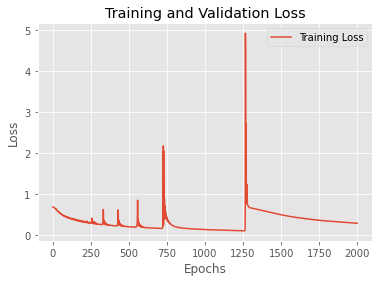

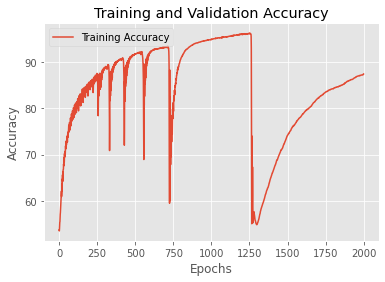

In [96]:
model = torch.nn.Sequential(
    torch.nn.Linear(100, 50),
    torch.nn.ReLU(),
    #torch.nn.Sigmoid(),
    torch.nn.Linear(50, 20),
    torch.nn.ReLU(),
    #torch.nn.Sigmoid(),
    torch.nn.Linear(20, 2)
    #torch.nn.Softmax(dim=1)
)

criterion = torch.nn.CrossEntropyLoss() #Cross-entropy loss criterion, combines negative log-likelihood and LogSoftMax.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) #Adam optimizer with learning rate  0.01.
loss_train_list = []
loss_valid_list = []

acc_train_list = []
acc_valid_list = []

best_val_accuracy = 0
epsilon = 1e-6 # Specified bound for the change in loss.

n_epochs = 2000

for epoch in range(n_epochs):
    model.train()
    print("EPOCH #" + str(epoch + 1) + ":")
    y_scores = model(bag_train)

    loss_train = criterion(y_scores, final_ys)
    print(loss_train)

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    loss_train_list.append(loss_train)

    with torch.no_grad():
        # Calculates accuracy for the whole training set. 
        acc_train = accuracy(bag_train, model, final_ys)
        acc_train_list.append(acc_train.item())

#         # Validation.
#         y_scores_valid = model(bag_valid)
        
#         # Calculates validation loss for this epoch.
#         loss_valid = criterion(y_scores_valid, torch.tensor(sstvalidys))
#         loss_valid_list.append(loss_valid.data)
        
#         # Calculates validation accuracy for this epoch.
#         acc_valid = accuracy(bag_valid, model, torch.tensor(sstvalidys))
#         acc_valid_list.append(acc_valid.item())
        
#         # If validation accuracy is the highest, it saves this model as the best one.
#         if acc_valid > best_val_accuracy:
#             best_val_accuracy = acc_valid
#             print("Saving new model...")
#             torch.save(model, 'best_model_q4.pt')

    print("training loss: " + str(loss_train.item()))
#     print("validation loss: " + str(loss_valid.item()))
    print("training acc: " + str(acc_train.item()))
#     print("validation acc: " + str(acc_valid.item()))
    
#     #If change in validation loss is below the specified level, we finish training.
#     if epoch > 0 and abs(loss_valid.item() - loss_valid_list[-2].item()) < epsilon:
#         break

# Q4: Loss and accuracy on each epoch for training and validation set - plots
plt.plot(loss_train_list, label='Training Loss')
# plt.plot(loss_valid_list, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(acc_train_list, label='Training Accuracy')
# plt.plot(acc_valid_list, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Automate this process for all combination of pairs of initial number of "on" states, to see the learnability of the perceptron as a function of the density of the initial state. 

---------LOWER NUMBER----------3-------------------
---------UPPER NUMBER----------4-------------------


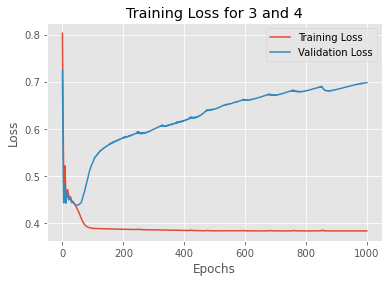

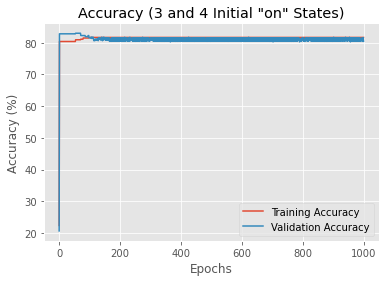

---------LOWER NUMBER----------4-------------------
---------UPPER NUMBER----------5-------------------


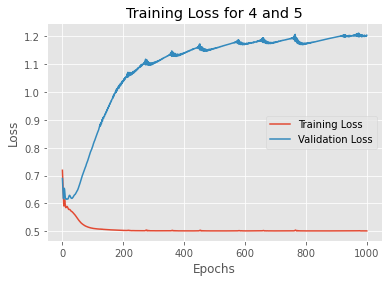

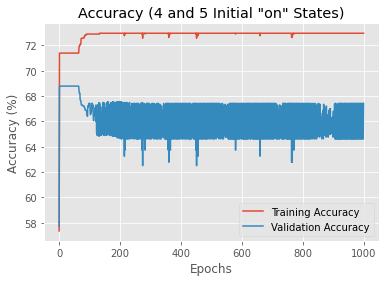

---------LOWER NUMBER----------5-------------------
---------UPPER NUMBER----------6-------------------


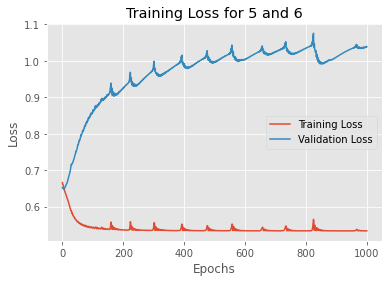

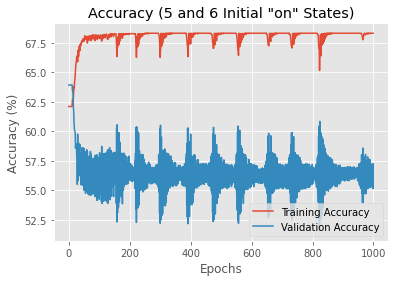

---------LOWER NUMBER----------6-------------------
---------UPPER NUMBER----------7-------------------


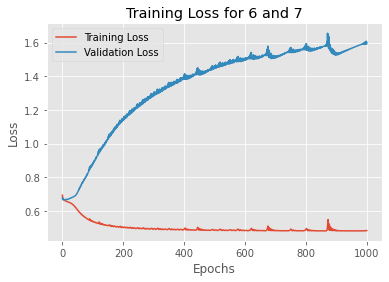

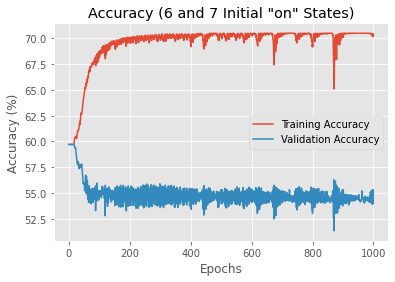

---------LOWER NUMBER----------7-------------------
---------UPPER NUMBER----------8-------------------


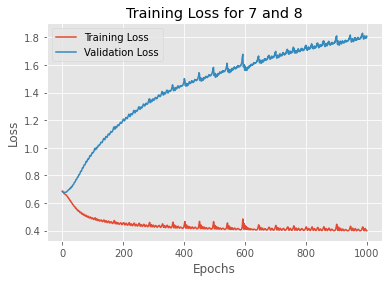

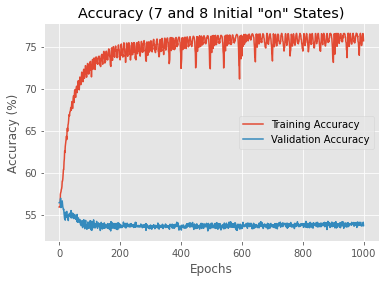

---------LOWER NUMBER----------8-------------------
---------UPPER NUMBER----------9-------------------


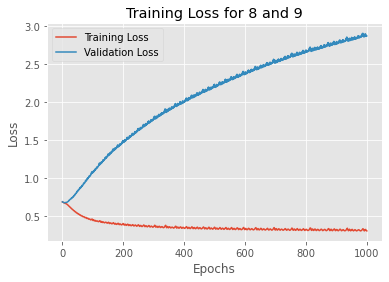

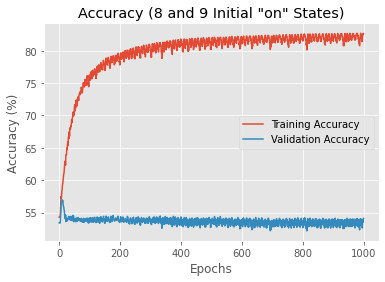

---------LOWER NUMBER----------9-------------------
---------UPPER NUMBER----------10-------------------


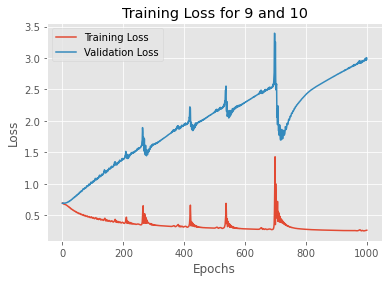

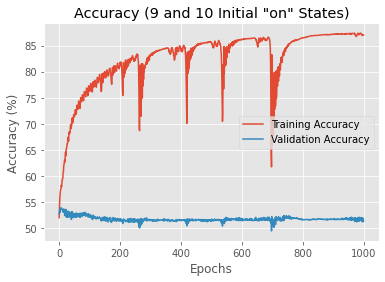

---------LOWER NUMBER----------10-------------------
---------UPPER NUMBER----------11-------------------


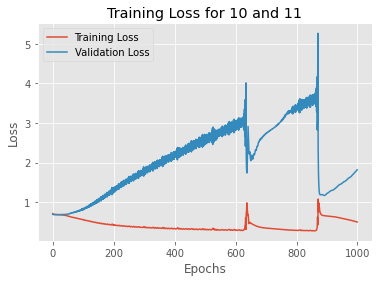

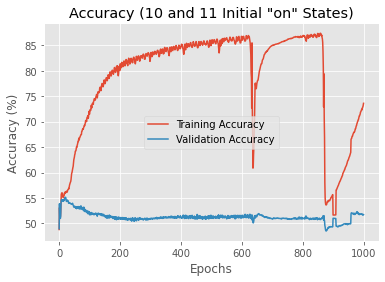

---------LOWER NUMBER----------11-------------------
---------UPPER NUMBER----------12-------------------


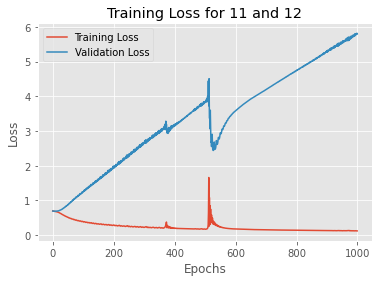

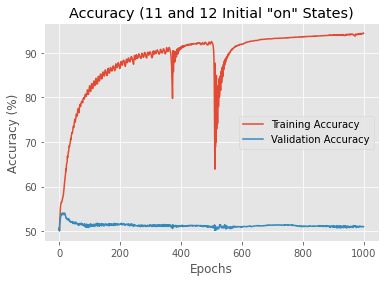

---------LOWER NUMBER----------12-------------------
---------UPPER NUMBER----------13-------------------


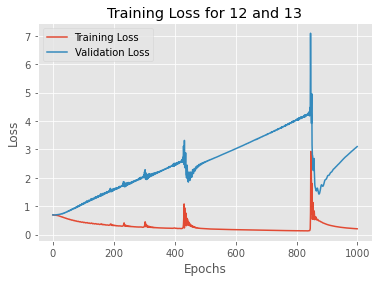

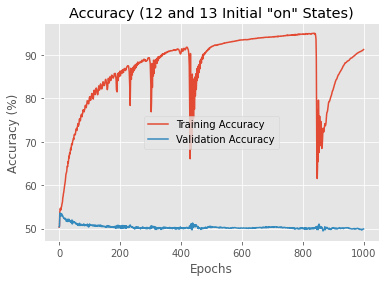

---------LOWER NUMBER----------13-------------------
---------UPPER NUMBER----------14-------------------


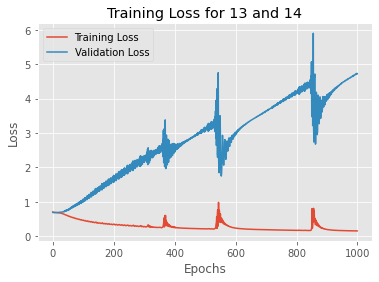

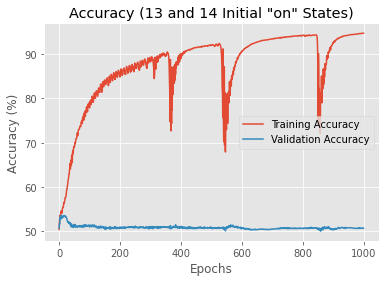

---------LOWER NUMBER----------14-------------------
---------UPPER NUMBER----------15-------------------


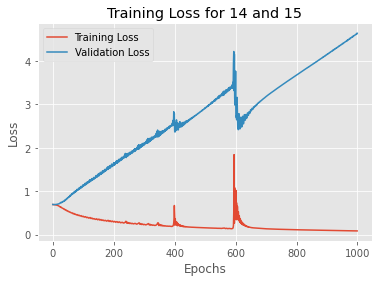

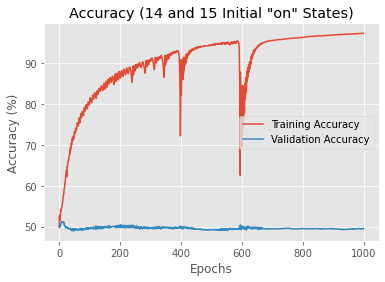

---------LOWER NUMBER----------15-------------------
---------UPPER NUMBER----------16-------------------


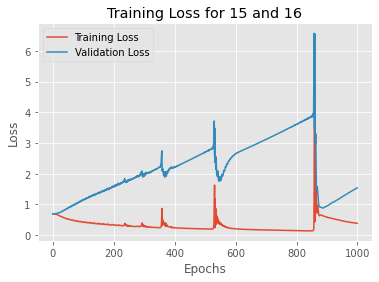

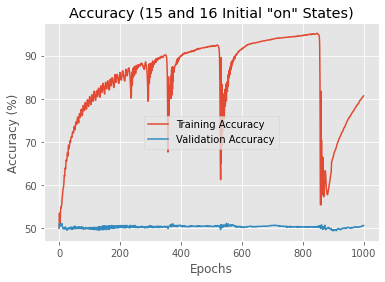

---------LOWER NUMBER----------16-------------------
---------UPPER NUMBER----------17-------------------


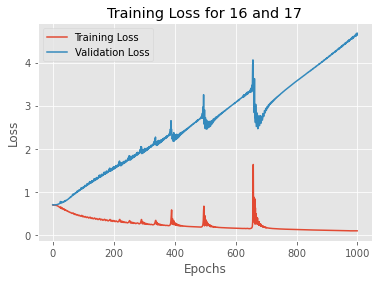

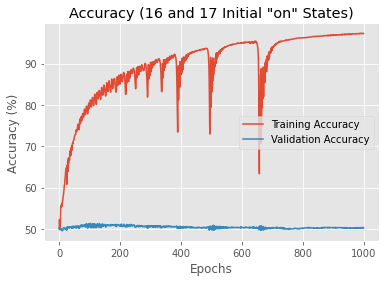

---------LOWER NUMBER----------17-------------------
---------UPPER NUMBER----------18-------------------


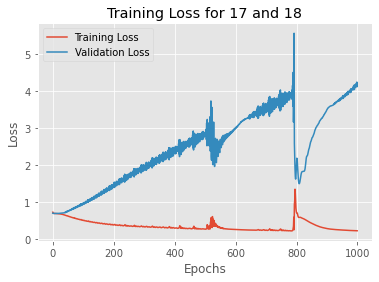

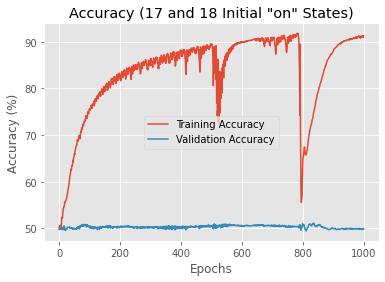

---------LOWER NUMBER----------18-------------------
---------UPPER NUMBER----------19-------------------


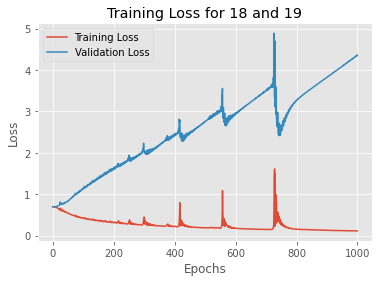

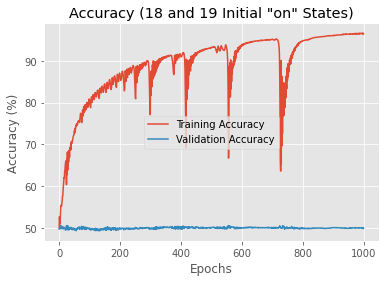

In [105]:
acc_best_list = []

for i in range(1000):
    
    with open("Saved_Training_Data_Life_Proof.txt", "rb") as pf:   # Unpickling
        final_list = pickle.load(pf)
    with open("Saved_Training_Data_Life_Proof_ys.txt", "rb") as fp:   # Unpickling
        final_y = pickle.load(fp)
        
    with open("Saved_Validation_Data_Life_Proof.txt", "rb") as pf:   # Unpickling
        final_list_val = pickle.load(pf)
    with open("Saved_Validation_Data_Life_Proof_ys.txt", "rb") as fp:   # Unpickling
        final_y_val = pickle.load(fp) 
    
        
    bag_train = torch.FloatTensor(final_list)
    final_y = np.array(final_y) - 3 
    final_ys = torch.tensor(final_y, dtype=torch.long)
    
    bag_val = torch.FloatTensor(final_list_val)
    final_y_val = np.array(final_y_val) - 3 
    final_ys_val = torch.tensor(final_y_val, dtype=torch.long)
    
    
    if i == 15:
        lower_number = np.where(final_ys == i)
        upper_number = [[60723]]
        
        lower_number_val = np.where(final_ys_val == i)
        upper_number_val = [[60588]]
    else:
        lower_number = np.where(final_ys == i)
        upper_number = np.where(final_ys == (i+2))
        
        lower_number_val = np.where(final_ys_val == i)
        upper_number_val = np.where(final_ys_val == (i+2))
        
    
    final_ys = final_ys[lower_number[0][0]:upper_number[0][0]]
    bag_train = bag_train[lower_number[0][0]:upper_number[0][0]]
    
    final_ys_val = final_ys_val[lower_number_val[0][0]:upper_number_val[0][0]]
    bag_val = bag_val[lower_number_val[0][0]:upper_number_val[0][0]]
    
    print(f"---------LOWER NUMBER----------{i+3}-------------------")
    print(f"---------UPPER NUMBER----------{i+4}-------------------")
    
    final_ys = final_ys - i
    final_ys_val = final_ys_val - i 
    
    model = torch.nn.Sequential(
        torch.nn.Linear(100, 50),
        torch.nn.ReLU(),
        #torch.nn.Sigmoid(),
        torch.nn.Linear(50, 20),
        torch.nn.ReLU(),
        #torch.nn.Sigmoid(),
        torch.nn.Linear(20, 2)
        #torch.nn.Softmax(dim=1)
    )

    criterion = torch.nn.CrossEntropyLoss() #Cross-entropy loss criterion, combines negative log-likelihood and LogSoftMax.
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01) #Adam optimizer with learning rate  0.01.
    loss_train_list = []
    loss_valid_list = []

    acc_train_list = []
    acc_valid_list = []

    best_val_accuracy = 0
    best_train_accuracy = 0
    epsilon = 1e-6 # Specified bound for the change in loss.

    n_epochs = 1000

    for epoch in range(n_epochs):
        model.train()
#         print("EPOCH #" + str(epoch + 1) + ":")
        y_scores = model(bag_train)

        loss_train = criterion(y_scores, final_ys)
#         print(loss_train)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        loss_train_list.append(loss_train)

        with torch.no_grad():
            # Calculates accuracy for the whole training set. 
            acc_train = accuracy(bag_train, model, final_ys)
            acc_train_list.append(acc_train.item())
            
            if acc_train > best_train_accuracy:
                best_train_accuracy = acc_train

            # Validation.
            y_scores_valid = model(bag_val)

            # Calculates validation loss for this epoch.
            loss_valid = criterion(y_scores_valid, final_ys_val)
            loss_valid_list.append(loss_valid.data)

            # Calculates validation accuracy for this epoch.
            acc_valid = accuracy(bag_val, model, final_ys_val)
            acc_valid_list.append(acc_valid.item())
            
#             if acc_valid > best_train_accuracy:
#                 best_train_accuracy = acc_train


    # Q4: Loss and accuracy on each epoch for training and validation set - plots
    plt.plot(loss_train_list, label='Training Loss')
    plt.plot(loss_valid_list, label='Validation Loss')
    plt.title(f'Training Loss for {i+3} and {i+4}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(acc_train_list, label='Training Accuracy')
    plt.plot(acc_valid_list, label='Validation Accuracy')
    plt.title(f'Accuracy ({i+3} and {i+4} Initial "on" States)')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()    
    
    acc_best_list.append(best_train_accuracy.item())
    
    if i == 15:
        break

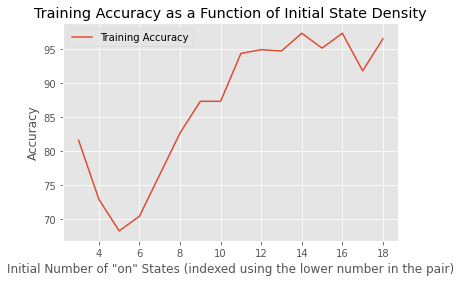

In [106]:
test_list = [] 

for i in range(3, 19):
    test_list.append(i)

plt.plot(test_list, acc_best_list, label='Training Accuracy')
# plt.plot(acc_valid_list, label='Validation Accuracy')
plt.title(f'Training Accuracy as a Function of Initial State Density')
plt.xlabel('Initial Number of "on" States (indexed using the lower number in the pair)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Proof of Concept Done, Now Implement Ensemble Learning. 

In [108]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torchvision import datasets, transforms

from torchensemble import VotingClassifier
from torchensemble.utils.logging import set_logger

ModuleNotFoundError: No module named 'torchensemble'

**Placing a pause to the above direction of investigation**, Moving onto generalizing the 1D ECA to the next-nearest neighbors. 

# 1D Elementary Cellular Automata: Next Nearest Neighbors

In [119]:
binary = str(bin(4294967295)[2:])

if len(binary) < 32:
    binary = binary.zfill(32)

print(binary)
print(len(binary))

11111111111111111111111111111111
32


In [120]:
def make_rule_V2(integer):
    binary = str(bin(integer)[2:])
    
    if len(binary) < 32:
        binary = binary.zfill(32)
    
    def rule_function_V2(array):
        row1 = array
        next_row = array.copy()
        for x in range(2, len(row1)-2):
                
            # Given cell state is "off", then update given the neighbors like - 
            if row1[x] == 0:
                
                if (row1[x-2] == 0) and (row1[x-1] == 0) and (row1[x+1] == 0) and (row1[x+2] == 0):
                    next_row[x] = int(binary[0])
                if (row1[x-2] == 1) and (row1[x-1] == 1) and (row1[x+1] == 1) and (row1[x+2] == 1):
                    next_row[x] = int(binary[1])
    
                    
                    
                if (row1[x-2] == 0) and (row1[x-1] == 0) and (row1[x+1] == 0) and (row1[x+2] == 1):
                    next_row[x] = int(binary[2])
                
                if (row1[x-2] == 0) and (row1[x-1] == 0) and (row1[x+1] == 1) and (row1[x+2] == 0):
                    next_row[x] = int(binary[3])
                
                if (row1[x-2] == 0) and (row1[x-1] == 1) and (row1[x+1] == 0) and (row1[x+2] == 0):
                    next_row[x] = int(binary[4])
                    
                if (row1[x-2] == 1) and (row1[x-1] == 0) and (row1[x+1] == 0) and (row1[x+2] == 0):
                    next_row[x] = int(binary[5])
                    
                
                
                if (row1[x-2] == 1) and (row1[x-1] == 0) and (row1[x+1] == 0) and (row1[x+2] == 1):
                    next_row[x] = int(binary[6])
                    
                if (row1[x-2] == 1) and (row1[x-1] == 0) and (row1[x+1] == 1) and (row1[x+2] == 0):
                    next_row[x] = int(binary[7])

                if (row1[x-2] == 0) and (row1[x-1] == 1) and (row1[x+1] == 0) and (row1[x+2] == 1):
                    next_row[x] = int(binary[8])
                    
                if (row1[x-2] == 0) and (row1[x-1] == 1) and (row1[x+1] == 1) and (row1[x+2] == 0):
                    next_row[x] = int(binary[9])
                    
                if (row1[x-2] == 1) and (row1[x-1] == 1) and (row1[x+1] == 0) and (row1[x+2] == 0):
                    next_row[x] = int(binary[10])
                    
                if (row1[x-2] == 0) and (row1[x-1] == 0) and (row1[x+1] == 1) and (row1[x+2] == 1):
                    next_row[x] = int(binary[11])
                    
                    
                    
                if (row1[x-2] == 1) and (row1[x-1] == 1) and (row1[x+1] == 1) and (row1[x+2] == 0):
                    next_row[x] = int(binary[12])
                
                if (row1[x-2] == 1) and (row1[x-1] == 1) and (row1[x+1] == 0) and (row1[x+2] == 1):
                    next_row[x] = int(binary[13])
                
                if (row1[x-2] == 1) and (row1[x-1] == 0) and (row1[x+1] == 1) and (row1[x+2] == 1):
                    next_row[x] = int(binary[14])
                    
                if (row1[x-2] == 0) and (row1[x-1] == 1) and (row1[x+1] == 1) and (row1[x+2] == 1):
                    next_row[x] = int(binary[15])
            

            # Given cell state is "on", then update given the neighbors like -   
            else:
                
                if (row1[x-2] == 0) and (row1[x-1] == 0) and (row1[x+1] == 0) and (row1[x+2] == 0):
                    next_row[x] = int(binary[16])
                if (row1[x-2] == 1) and (row1[x-1] == 1) and (row1[x+1] == 1) and (row1[x+2] == 1):
                    next_row[x] = int(binary[17])
    
                    
                    
                if (row1[x-2] == 0) and (row1[x-1] == 0) and (row1[x+1] == 0) and (row1[x+2] == 1):
                    next_row[x] = int(binary[18])
                
                if (row1[x-2] == 0) and (row1[x-1] == 0) and (row1[x+1] == 1) and (row1[x+2] == 0):
                    next_row[x] = int(binary[19])
                
                if (row1[x-2] == 0) and (row1[x-1] == 1) and (row1[x+1] == 0) and (row1[x+2] == 0):
                    next_row[x] = int(binary[20])
                    
                if (row1[x-2] == 1) and (row1[x-1] == 0) and (row1[x+1] == 0) and (row1[x+2] == 0):
                    next_row[x] = int(binary[21])
                    
                
                
                if (row1[x-2] == 1) and (row1[x-1] == 0) and (row1[x+1] == 0) and (row1[x+2] == 1):
                    next_row[x] = int(binary[22])
                    
                if (row1[x-2] == 1) and (row1[x-1] == 0) and (row1[x+1] == 1) and (row1[x+2] == 0):
                    next_row[x] = int(binary[23])

                if (row1[x-2] == 0) and (row1[x-1] == 1) and (row1[x+1] == 0) and (row1[x+2] == 1):
                    next_row[x] = int(binary[24])
                    
                if (row1[x-2] == 0) and (row1[x-1] == 1) and (row1[x+1] == 1) and (row1[x+2] == 0):
                    next_row[x] = int(binary[25])
                    
                if (row1[x-2] == 1) and (row1[x-1] == 1) and (row1[x+1] == 0) and (row1[x+2] == 0):
                    next_row[x] = int(binary[26])
                    
                if (row1[x-2] == 0) and (row1[x-1] == 0) and (row1[x+1] == 1) and (row1[x+2] == 1):
                    next_row[x] = int(binary[27])
                    
                    
                    
                if (row1[x-2] == 1) and (row1[x-1] == 1) and (row1[x+1] == 1) and (row1[x+2] == 0):
                    next_row[x] = int(binary[28])
                
                if (row1[x-2] == 1) and (row1[x-1] == 1) and (row1[x+1] == 0) and (row1[x+2] == 1):
                    next_row[x] = int(binary[29])
                
                if (row1[x-2] == 1) and (row1[x-1] == 0) and (row1[x+1] == 1) and (row1[x+2] == 1):
                    next_row[x] = int(binary[30])
                    
                if (row1[x-2] == 0) and (row1[x-1] == 1) and (row1[x+1] == 1) and (row1[x+2] == 1):
                    next_row[x] = int(binary[31])

                    
            next_row[0] = next_row[2]
            next_row[1] = next_row[2]
            next_row[len(row1)-1] = next_row[len(row1)-3]
            next_row[len(row1)-2] = next_row[len(row1)-3]
            

        return np.array(next_row)

    return rule_function_V2

In [121]:
# NOTE: 'timestep' variable used to denote the timestep in which the perturbation will occur, and 'n' is the number of...
#... iterations performed by the ECA. 

def apply_rule_V2(rule_function, n, perturbation_boolean, timestep, cell):
    ini_state = initial_state(4*n + 1)
    rv = []
    rv.append(ini_state)
    if perturbation_boolean == True:
        for i in range(1, n):
            if i == timestep:
                timestep_update = rule_function(ini_state)
                if timestep_update[cell] == 0:
                    timestep_update[cell] = 1
                else:
                    timestep_update[cell] = 0
                    
                rv.append(timestep_update)
                ini_state = timestep_update
                
            else:
                timestep_update = rule_function(ini_state)
                rv.append(timestep_update)
                ini_state = timestep_update
          
    else:
        for i in range(1, n):
            timestep_update = rule_function(ini_state)
            rv.append(timestep_update)
            ini_state = timestep_update
        
    return np.array(rv)

Text(0.5, 0, 'Cell Index')

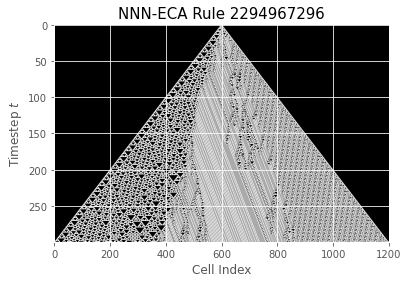

In [122]:
# 2^32 = 4294967296

rule_function_check = make_rule_V2(2294967296)

plt.imshow(apply_rule_V2(rule_function_check, 300, False, 0, 0), cmap='binary', aspect='auto')
plt.title('NNN-ECA Rule 2294967296', fontsize=15)
plt.ylabel("Timestep $t$", fontsize=12)
plt.xlabel("Cell Index", fontsize=12)
# plt.xlim([595, 605])
# plt.ylim([1, 0])

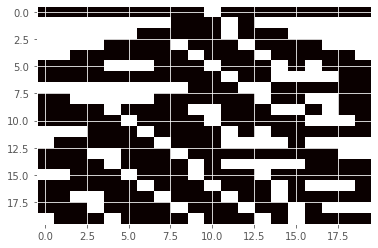

In [123]:
matrix_unperturb = apply_rule_V2(rule_function_check, 300, False, 0, 0)

matrix_unperturb_region_check = matrix_unperturb[0:20, 590:610]

plt.imshow(matrix_unperturb_region_check, cmap='hot', aspect='auto')

## Now Collect Training Data For Various Next-Nearest Neighbor ECA

### Starting off with Rule 2294967296

In [124]:
def deviation_distanceS_V2(rule_function, matrix, n, timestep, cell, up_to_measurement_timesteps):
    unperturbed_matrix = matrix
    perturbed_matrix = apply_rule_V2(rule_function, n, True, timestep, cell)
    final_answer_list = []
    
    for i in range(timestep, up_to_measurement_timesteps):
        
        perturbed_state = perturbed_matrix[i]
        unperturbed_state = unperturbed_matrix[i]

        count = differences(perturbed_state, unperturbed_state)
        final_answer = count/len(perturbed_state)
        final_answer_list.append(final_answer)
    
    return final_answer_list

In [132]:
def single_perturbation_multiple_timesteps_V2(rule_function, matrix, n, timestep, around_cell, up_to_measurement_timesteps):
    deviation_distance_list_list = [0, 0, 0]
    average_list = []
    x_list = [-1, 0, 1]

    for i in range(3):
        x = x_list[i]
        cell = around_cell + x
        deviation_distance_list = deviation_distanceS_V2(rule_function, matrix, n, timestep, cell, up_to_measurement_timesteps)
        deviation_distance_list_list[i] = deviation_distance_list
    
    for j in range(len(deviation_distance_list)):
        average_list.append(deviation_distance_list_list[0][j] + deviation_distance_list_list[1][j] + deviation_distance_list_list[2][j])
    
    average_list = np.array(average_list)/3
    average_list.tolist()
     
    return average_list

In [126]:
measurement_timestep_list = [i for i in range(196, 211)]

In [127]:
matrix_unperturb_k = apply_rule_V2(rule_function_check, 300, False, 0, 0)

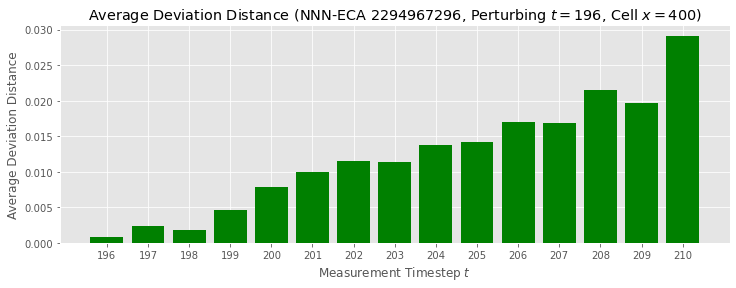

In [128]:
average_list = single_perturbation_multiple_timesteps_V2(rule_function_check, matrix_unperturb_k, 300, 196, 400, 211)
plot_for_average(average_list, measurement_timestep_list, "Average Deviation Distance (NNN-ECA 2294967296, Perturbing $t = 196$, Cell $x = 400$)", "Measurement Timestep $t$", "Average Deviation Distance")

Next we implement the emergence rule check criteria.

In [133]:
def check_emergence_modified_V2(rule_function, matrix, n, timestep, cell, tup):
    cell_one_number = 0
    matrix_unperturb = matrix
    
    value_holder = matrix_unperturb[timestep, cell]
    matrix_unperturb[timestep, cell] = 2
    
    length = math.floor(tup[0]/2) 
    width = math.floor(tup[1]/2)
    
    submatrix = matrix_unperturb[timestep-length:timestep+(length+1), cell-width:cell+(width+1)]

    for row in submatrix:
        for cell in row:
            if cell == 1:
                cell_one_number += 1
    
    area = (math.floor(tup[0]) * math.floor(tup[1])) - 5
    
    if cell_one_number >= (.75 * area) or cell_one_number <= (.25 * area):
        emergence_guess = 1
    else:
        emergence_guess = 0

    matrix_unperturb[timestep, cell] = value_holder    

    return emergence_guess 

In [134]:
def collect_training_data_modified_V2(rule_function, n, num_of_datapoints, area_of_interest_string, tup):
    
    training_data_list = []
    count_for_emergence = 0
    count_for_not = 0
    matrix_unperturb_k = apply_rule_V2(rule_function, n, False, 0, 0)
    
    for i in range(num_of_datapoints):
        
        list_for_datapoint = []
        
        if i%10 == 0:
            print(i)
            
        timestep = random.randint(4, n-1)
        
        if timestep >= (n-15):
            continue
            
            
        if area_of_interest_string == "triangle":
            around_cell = random.randint(n-timestep, n+timestep)
        if area_of_interest_string == "half_triangle_right":
            around_cell = random.randint(n, n+timestep)
        if area_of_interest_string == "half_triangle_left":
            around_cell = random.randint(n-timestep, n)  
        if area_of_interest_string == "random":
            around_cell = random.randint(0, 2*n)
        if area_of_interest_string == "half_triangle_right_skew":
            around_cell = random.randint(n-int(timestep/2), n+timestep)
        if area_of_interest_string == "half_triangle_left_skew":
            around_cell = random.randint(n-timestep, n+int(timestep/2))
        if area_of_interest_string == "big_triangle":
            around_cell = random.randint(((2*n)-(2*timestep)), ((2*n)+(2*timestep)))
        if area_of_interest_string == "triangle_V2":
            around_cell = random.randint(((2*n)-(timestep)), ((2*n)+(timestep)))
            
            
        up_to_measurement_timesteps = timestep + 15
        
        
        emergence_guess = check_emergence_modified_V2(rule_function, matrix_unperturb_k, n, timestep, around_cell, tup)
        if emergence_guess == 1:
            count_for_emergence += 1
            print("Got one!", count_for_emergence)
        else:
            count_for_not += 1
            print("blah", count_for_not)
            
        if count_for_not > 100 and emergence_guess == 0:
            continue
            
        average_list = single_perturbation_multiple_timesteps_V2(rule_function, matrix_unperturb_k, n, timestep, around_cell, up_to_measurement_timesteps)
        
        list_for_datapoint.append(average_list)
        list_for_datapoint.append(emergence_guess)
        list_for_datapoint.append(timestep)
        list_for_datapoint.append(around_cell)
        
        training_data_list.append(list_for_datapoint)
        
        if count_for_emergence > 100:
            break
    
    return training_data_list

Text(0.5, 0, 'Cell Index')

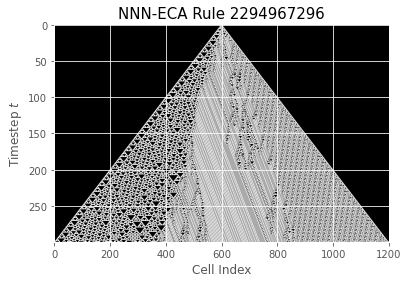

In [110]:
# 2^32 = 4294967296

rule_function_check = make_rule_V2(2294967296)

plt.imshow(apply_rule_V2(rule_function_check, 300, False, 0, 0), cmap='binary', aspect='auto')
plt.title('NNN-ECA Rule 2294967296', fontsize=15)
plt.ylabel("Timestep $t$", fontsize=12)
plt.xlabel("Cell Index", fontsize=12)
# plt.xlim([595, 605])
# plt.ylim([1, 0])

Text(0.5, 0, 'Cell Index')

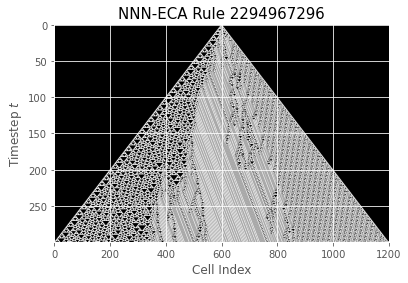

In [112]:
plt.imshow(apply_rule_V2(rule_function_check, 300, True, 196, 400), cmap='binary', aspect='auto')
plt.title('NNN-ECA Rule 2294967296', fontsize=15)
plt.ylabel("Timestep $t$", fontsize=12)
plt.xlabel("Cell Index", fontsize=12)
# plt.xlim([200, 600])
# plt.ylim([200, 0])

Text(0.5, 0, 'Cell Index')

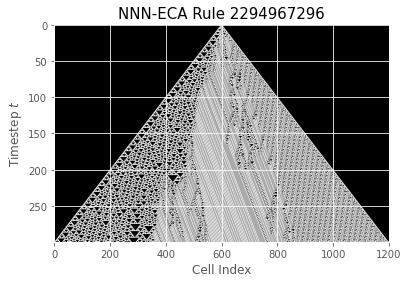

In [139]:
plt.imshow(apply_rule_V2(rule_function_check, 300, True, 202, 400), cmap='binary', aspect='auto')
plt.title('NNN-ECA Rule 2294967296', fontsize=15)
plt.ylabel("Timestep $t$", fontsize=12)
plt.xlabel("Cell Index", fontsize=12)
# plt.xlim([595, 605])
# plt.ylim([1, 0])

Text(0.5, 0, 'Cell Index')

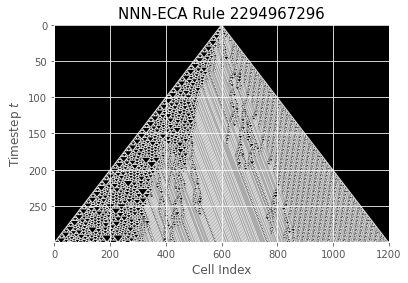

In [114]:
plt.imshow(apply_rule_V2(rule_function_check, 300, True, 150, 400), cmap='binary', aspect='auto')
plt.title('NNN-ECA Rule 2294967296', fontsize=15)
plt.ylabel("Timestep $t$", fontsize=12)
plt.xlabel("Cell Index", fontsize=12)
# plt.xlim([595, 605])
# plt.ylim([1, 0])

nah 10 36 23.25 7.75


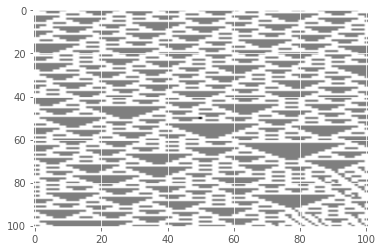

In [135]:
emergent_shape = (6, 6)
timestep = 196
cell = 400
tup = emergent_shape
cell_one_number = 0
cell_number = 0
length = math.floor(tup[0]/2) 
width = math.floor(tup[1]/2)


matrix_unperturb = apply_rule_V2(rule_function_check, 300, False, 0, 0)
matrix_unperturb[timestep, cell] = 2

matrix_unperturb_region_check = matrix_unperturb[timestep-50:timestep+51, cell-50:cell+51]

submatrix = matrix_unperturb[timestep-length:timestep+(length), cell-width:cell+(width)]

for row in submatrix:
    for cell in row:
        cell_number += 1
        if cell == 1:
            cell_one_number += 1
 

area = (math.floor(tup[0]) * math.floor(tup[1])) - 5

if cell_one_number >= (.75 * area) or cell_one_number <= (.25 * area):
    emergence_guess = 1
    print('whatsup', cell_one_number, cell_number,.75 * area,.25 * area)

else:
    emergence_guess = 0
    print('nah', cell_one_number, cell_number,.75 * area,.25 * area)


plt.imshow(matrix_unperturb_region_check, cmap='binary', aspect='auto')

In [773]:
check_emergence_modified_V2(rule_function_check, matrix_unperturb, 300, 185, 400, (6, 6))

1

In [116]:
# training_data_list = collect_training_data_modified_V2(rule_function_check, 300, 20000, "big_triangle", emergent_shape)

# with open("Saved_Training_Data_For_NNNRule2294967296.txt", "wb") as fp:   #Pickling
#     pickle.dump(training_data_list, fp)

0
blah 1
blah 2
blah 3
blah 4
blah 5
blah 6
Got one! 1
blah 7
blah 8
blah 9
10
blah 10
Got one! 2
blah 11
blah 12
blah 13
blah 14
blah 15
blah 16
blah 17
20
blah 18
blah 19
blah 20
blah 21
blah 22
blah 23
blah 24
Got one! 3
blah 25
blah 26
30
Got one! 4
blah 27
Got one! 5
blah 28
blah 29
blah 30
blah 31
blah 32
blah 33
40
blah 34
blah 35
blah 36
blah 37
blah 38
blah 39
blah 40
Got one! 6
blah 41
50
blah 42
Got one! 7
blah 43
blah 44
blah 45
blah 46
blah 47
Got one! 8
Got one! 9
60
blah 48
blah 49
blah 50
blah 51
blah 52
blah 53
blah 54
blah 55
blah 56
blah 57
70
blah 58
blah 59
blah 60
blah 61
blah 62
blah 63
blah 64
blah 65
blah 66
80
Got one! 10
Got one! 11
Got one! 12
blah 67
blah 68
blah 69
blah 70
blah 71
blah 72
blah 73
90
Got one! 13
Got one! 14
Got one! 15
blah 74
blah 75
blah 76
blah 77
blah 78
100
blah 79
Got one! 16
blah 80
blah 81
blah 82
blah 83
blah 84
blah 85
110
blah 86
blah 87
blah 88
blah 89
blah 90
blah 91
blah 92
blah 93
blah 94
120
blah 95
blah 96
blah 97
blah 98
b

In [117]:
count = 0

with open("Saved_Training_Data_For_NNNRule2294967296.txt", "rb") as fp:   # Unpickling
    training_data = pickle.load(fp)
    
for item in training_data:
    if item[1] == 1:
        count += 1
        
print(count)

101


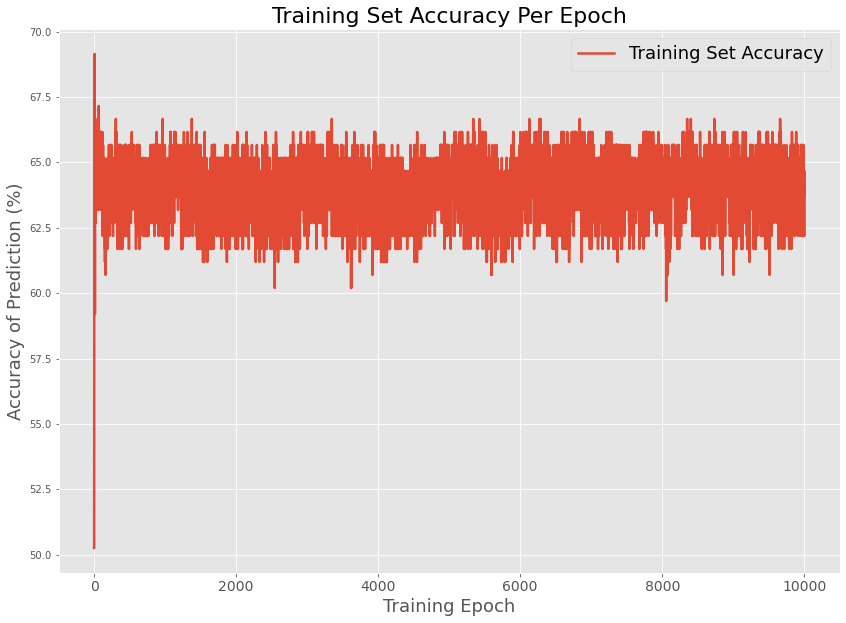

Highest Training Accuracy = 69.15422885572139
The epoch for which these values were obtained = 8


In [118]:
### = Main Section/Comment
# = Sub Section/Comment

###Initializing variables.
#Initialized weight vector.
w = np.zeros(len(training_data[0][0])) 

#Vote count and y_prime.
c = 0
y_prime = int

#Updated c*w.
voteWeightVector = 0 

#Lists for keeping count of the accuracy.
lforTrain = np.zeros(len(training_data))
# lforVal = np.zeros(len(validation_data))

#Counts for accuracy check.
countforTrain = 0 
countforValid = 0
prediction = 0 
accTrain = 0 
accValid = 0
previousaccTrain = 0
previousaccVal = 0
matchTrain = 0
matchVal = 0 
epochcount = 0
epochcountVal = 0
plotlistTrain = []
plotlistValid = []
xlist = []

###Used to train the Voted Perceptron to convergence.
for epoch in range(10000):

  countforTrain = 0
  countforValid = 0 
  voteWeightVector = 0

  ###The Voted Perceptron algorithm, with 0(1) memory.
  for i in range(len(training_data)):

    #Activation function.
    if np.dot(w, training_data[i][0]) >= 0:
        y_prime = 1
    else:
        y_prime = 0

    #Vote count.
    if y_prime == training_data[i][1]:
        c += 1

    #If y_prime guess is incorrect, then w*c is updated.
    else:
        voteWeightVector += np.dot(w, c)

        c = 1
        signSwitch = [element * (training_data[i][1] - y_prime) for element 
                     in training_data[i][0]]
        w = list(map(add, w, signSwitch))
  
  #Updating the w*c again. Making sure latest w and number
  #...of votes gets accounted for. 
  voteWeightVector += np.dot(w, c)

  ###Training Set - Making a prediction and accuracy count for epoch.
  for k in range(len(training_data)):
    if np.dot(voteWeightVector, training_data[k][0]) >= 0:
      lforTrain[k] = 1
    else:
      lforTrain[k] = 0
    if lforTrain[k] == training_data[k][1]:
      countforTrain += 1
  accTrain = (countforTrain/len(training_data)) * 100

#   ###Validation Set - Making a prediction and accuracy count for epoch.
#   for k in range(len(validation_data)):
#     if np.dot(voteWeightVector, validation_data[k][0]) >= 0:
#       lforVal[k] = 1
#     else:
#       lforVal[k] = 0
#     if lforVal[k] == validation_data[k][1]:
#       countforValid += 1
#   accValid = (countforValid/len(validation_data)) * 100

  ###Lists for plotting training/validation set accuracy per epoch.
  plotlistTrain.append(accTrain)
#   plotlistValid.append(accValid)

  #List for x-axis in plot.
  xlist.append(epoch)

  ###Keeping track of the epoch which has highest training accuracy.
  if accTrain >= previousaccTrain:
    previousaccTrain = accTrain
    matchTrain = accTrain
    epochcount = epoch
    
#   ###Keeping track of the epoch which has highest validation accuracy.
#   if accValid >= previousaccVal:
#     previousaccVal = accValid
#     matchVal = accValid
#     epochcountVal = epoch
  
###Calling the plot.
plt.figure(figsize=(14,10))
plt.plot(xlist, plotlistTrain, label='Training Set Accuracy', lw=2.5)
# plt.plot(xlist, plotlistValid, label='Validation Set Accuracy', lw=2.5)
plt.xticks(fontsize=14)
plt.title('Training Set Accuracy Per Epoch', fontsize=22)
plt.xlabel('Training Epoch', fontsize=18)
plt.ylabel('Accuracy of Prediction (%)', fontsize=18)
plt.legend(fontsize=18)
plt.savefig("ValidSetAccuracyVotedPerceptron.png", bbox_inches="tight")
plt.show()

###Prints the highest validation set accuracy, the corresponding...
#... training accuracy and the epoch.
print("Highest Training Accuracy =", matchTrain)
print("The epoch for which these values were obtained =", epochcount)
# print("Highest Validation Accuracy =", matchVal)
# print("The epoch for which these values were obtained =", epochcountVal)

In [136]:
# validation_data_list = collect_training_data_modified_V2(rule_function_check, 300, 20000, "big_triangle", emergent_shape)

# with open("Saved_Validation_Data_For_NNNRule2294967296.txt", "wb") as fp:   #Pickling
#     pickle.dump(validation_data_list, fp)

0
blah 1
blah 2
blah 3
blah 4
blah 5
blah 6
Got one! 1
blah 7
Got one! 2
10
blah 8
Got one! 3
blah 9
blah 10
blah 11
blah 12
blah 13
blah 14
20
blah 15
Got one! 4
blah 16
blah 17
blah 18
blah 19
blah 20
blah 21
blah 22
30
blah 23
Got one! 5
blah 24
blah 25
Got one! 6
blah 26
blah 27
40
Got one! 7
blah 28
blah 29
blah 30
blah 31
blah 32
blah 33
blah 34
blah 35
50
blah 36
blah 37
blah 38
blah 39
blah 40
blah 41
blah 42
blah 43
Got one! 8
60
blah 44
blah 45
blah 46
blah 47
blah 48
blah 49
blah 50
blah 51
Got one! 9
70
blah 52
blah 53
Got one! 10
blah 54
blah 55
blah 56
blah 57
blah 58
blah 59
80
blah 60
blah 61
blah 62
blah 63
blah 64
blah 65
Got one! 11
blah 66
blah 67
blah 68
90
blah 69
blah 70
Got one! 12
blah 71
blah 72
blah 73
blah 74
blah 75
blah 76
blah 77
100
blah 78
blah 79
blah 80
blah 81
blah 82
Got one! 13
blah 83
blah 84
Got one! 14
blah 85
110
blah 86
blah 87
blah 88
blah 89
blah 90
Got one! 15
blah 91
blah 92
blah 93
Got one! 16
120
blah 94
blah 95
blah 96
blah 97
blah 98
G

In [137]:
count = 0

with open("Saved_Validation_Data_For_NNNRule2294967296.txt", "rb") as fp:   # Unpickling
    validation_data = pickle.load(fp)
    
for item in validation_data:
    if item[1] == 0:
        count += 1
        
print(count)

100


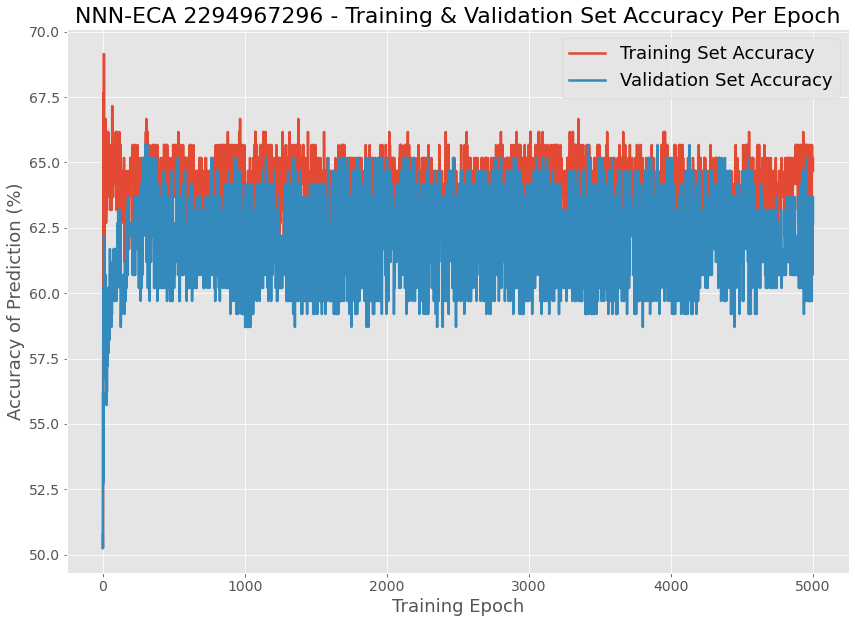

Highest Training Accuracy = 69.15422885572139
The epoch for which these values were obtained = 8
Highest Validation Accuracy = 65.67164179104478
The epoch for which these values were obtained = 4130


In [138]:
### = Main Section/Comment
# = Sub Section/Comment

###Initializing variables.
#Initialized weight vector.
w = np.zeros(len(training_data[0][0])) 

#Vote count and y_prime.
c = 0
y_prime = int

#Updated c*w.
voteWeightVector = 0 

#Lists for keeping count of the accuracy.
lforTrain = np.zeros(len(training_data))
lforVal = np.zeros(len(validation_data))

#Counts for accuracy check.
countforTrain = 0 
countforValid = 0
prediction = 0 
accTrain = 0 
accValid = 0
previousaccTrain = 0
previousaccVal = 0
matchTrain = 0
matchVal = 0 
epochcount = 0
epochcountVal = 0
plotlistTrain = []
plotlistValid = []
xlist = []

###Used to train the Voted Perceptron to convergence.
for epoch in range(5000):

  countforTrain = 0
  countforValid = 0 
  voteWeightVector = 0

  ###The Voted Perceptron algorithm, with 0(1) memory.
  for i in range(len(training_data)):

    #Activation function.
    if np.dot(w, training_data[i][0]) >= 0:
        y_prime = 1
    else:
        y_prime = 0

    #Vote count.
    if y_prime == training_data[i][1]:
        c += 1

    #If y_prime guess is incorrect, then w*c is updated.
    else:
        voteWeightVector += np.dot(w, c)

        c = 1
        signSwitch = [element * (training_data[i][1] - y_prime) for element 
                     in training_data[i][0]]
        w = list(map(add, w, signSwitch))
  
  #Updating the w*c again. Making sure latest w and number
  #...of votes gets accounted for. 
  voteWeightVector += np.dot(w, c)

  ###Training Set - Making a prediction and accuracy count for epoch.
  for k in range(len(training_data)):
    if np.dot(voteWeightVector, training_data[k][0]) >= 0:
      lforTrain[k] = 1
    else:
      lforTrain[k] = 0
    if lforTrain[k] == training_data[k][1]:
      countforTrain += 1
  accTrain = (countforTrain/len(training_data)) * 100

  ###Validation Set - Making a prediction and accuracy count for epoch.
  for k in range(len(validation_data)):
    if np.dot(voteWeightVector, validation_data[k][0]) >= 0:
      lforVal[k] = 1
    else:
      lforVal[k] = 0
    if lforVal[k] == validation_data[k][1]:
      countforValid += 1
  accValid = (countforValid/len(validation_data)) * 100

  ###Lists for plotting training/validation set accuracy per epoch.
  plotlistTrain.append(accTrain)
  plotlistValid.append(accValid)

  #List for x-axis in plot.
  xlist.append(epoch)

  ###Keeping track of the epoch which has highest training accuracy.
  if accTrain >= previousaccTrain:
    previousaccTrain = accTrain
    matchTrain = accTrain
    epochcount = epoch
    
  ###Keeping track of the epoch which has highest validation accuracy.
  if accValid >= previousaccVal:
    previousaccVal = accValid
    matchVal = accValid
    epochcountVal = epoch
  
###Calling the plot.
plt.figure(figsize=(14,10))
plt.plot(xlist, plotlistTrain, label='Training Set Accuracy', lw=2.5)
plt.plot(xlist, plotlistValid, label='Validation Set Accuracy', lw=2.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('NNN-ECA 2294967296 - Training & Validation Set Accuracy Per Epoch', fontsize=22)
plt.xlabel('Training Epoch', fontsize=18)
plt.ylabel('Accuracy of Prediction (%)', fontsize=18)
plt.legend(fontsize=18)
plt.savefig("ValidSetAccuracyVotedPerceptron.png", bbox_inches="tight")
plt.show()

###Prints the highest validation set accuracy, the corresponding...
#... training accuracy and the epoch.
print("Highest Training Accuracy =", matchTrain)
print("The epoch for which these values were obtained =", epochcount)
print("Highest Validation Accuracy =", matchVal)
print("The epoch for which these values were obtained =", epochcountVal)

### NNN Rule 331267296

NOTE TO SELF: 4294467296 is the rule for elongated sierpinski, can investigate.

NOTE TO SELF: 423323224 is the rule for elongated sierpinski, can investigate.

Text(0.5, 0, 'Cell Index')

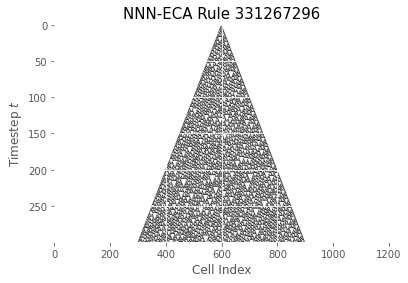

In [77]:
# 2^32 = 4294967296

rule_function_check = make_rule_V2(331267296)

plt.imshow(apply_rule_V2(rule_function_check, 300, False, 0, 0), cmap='binary', aspect='auto')
plt.title('NNN-ECA Rule 331267296', fontsize=15)
plt.ylabel("Timestep $t$", fontsize=12)
plt.xlabel("Cell Index", fontsize=12)

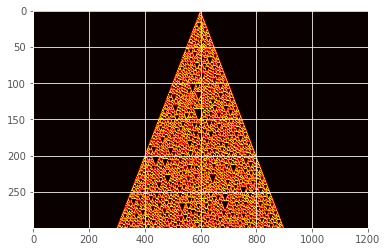

In [779]:
plt.imshow(apply_rule_V2(rule_function_check, 300, True, 50, 600), cmap='hot', aspect='auto')

In [78]:
def check_emergence_modified_V2(rule_function, matrix, n, timestep, cell, tup):
    cell_one_number = 0
    matrix_unperturb = matrix
    
    value_holder = matrix_unperturb[timestep, cell]
    matrix_unperturb[timestep, cell] = 2
    
    length = math.floor(tup[0]/2) 
    width = math.floor(tup[1]/2)
    
    submatrix = matrix_unperturb[timestep-length:timestep+(length+1), cell-width:cell+(width+1)]

    for row in submatrix:
        for cell in row:
            if cell == 1:
                cell_one_number += 1
    
    area = (math.floor(tup[0]) * math.floor(tup[1]))
    
    if cell_one_number >= (.75 * area) or cell_one_number <= (.25 * area):
        emergence_guess = 1
    else:
        emergence_guess = 0

    matrix_unperturb[timestep, cell] = value_holder    

    return emergence_guess 

whatsup 4 25 18.75 6.25


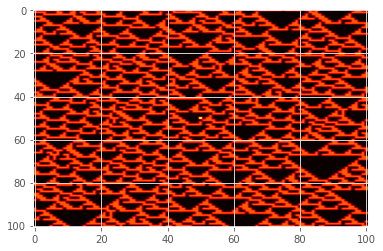

In [79]:
emergent_shape = (5, 5)
timestep = 190
cell = 530
tup = emergent_shape
cell_one_number = 0
cell_number = 0
length = math.floor(tup[0]/2) 
width = math.floor(tup[1]/2)


matrix_unperturb = apply_rule_V2(rule_function_check, 300, False, 0, 0)
matrix_unperturb[timestep, cell] = 2

matrix_unperturb_region_check = matrix_unperturb[timestep-50:timestep+51, cell-50:cell+51]

submatrix = matrix_unperturb[timestep-length:timestep+(length+1), cell-width:cell+(width+1)]

for row in submatrix:
    for cell in row:
        cell_number += 1
        if cell == 1:
            cell_one_number += 1
 

area = (math.floor(tup[0]) * math.floor(tup[1]))

if cell_one_number >= (.75 * area) or cell_one_number <= (.25 * area):
    emergence_guess = 1
    print('whatsup', cell_one_number, cell_number,.75 * area,.25 * area)

else:
    emergence_guess = 0
    print('nah', cell_one_number, cell_number,.75 * area,.25 * area)


plt.imshow(matrix_unperturb_region_check, cmap='hot', aspect='auto')

In [782]:
check_emergence_modified_V2(rule_function_check, matrix_unperturb, 300, 190, 531, (5, 5))

0

In [742]:
# training_data_list = collect_training_data_modified_V2(rule_function_check, 300, 20000, "triangle_V2", emergent_shape)

# with open("Saved_Training_Data_For_NNNRule331267296.txt", "wb") as fp:   #Pickling
#     pickle.dump(training_data_list, fp)

0
Got one! 1
blah 1
Got one! 2
blah 2
Got one! 3
blah 3
blah 4
blah 5
blah 6
10
blah 7
Got one! 4
blah 8
blah 9
blah 10
blah 11
blah 12
Got one! 5
blah 13
blah 14
20
blah 15
blah 16
blah 17
blah 18
blah 19
blah 20
blah 21
blah 22
blah 23
blah 24
30
blah 25
blah 26
blah 27
blah 28
blah 29
blah 30
blah 31
blah 32
blah 33
40
blah 34
blah 35
Got one! 6
blah 36
blah 37
blah 38
blah 39
blah 40
blah 41
blah 42
50
blah 43
Got one! 7
blah 44
blah 45
blah 46
blah 47
blah 48
blah 49
Got one! 8
blah 50
60
blah 51
blah 52
blah 53
blah 54
blah 55
blah 56
blah 57
blah 58
blah 59
blah 60
70
blah 61
blah 62
blah 63
blah 64
blah 65
blah 66
Got one! 9
blah 67
blah 68
80
blah 69
blah 70
blah 71
blah 72
blah 73
Got one! 10
blah 74
blah 75
blah 76
blah 77
90
blah 78
blah 79
blah 80
blah 81
blah 82
blah 83
blah 84
blah 85
blah 86
blah 87
100
blah 88
blah 89
blah 90
blah 91
blah 92
Got one! 11
blah 93
blah 94
blah 95
blah 96
110
blah 97
blah 98
blah 99
blah 100
blah 101
blah 102
blah 103
blah 104
120
blah 105

In [80]:
count = 0

with open("Saved_Training_Data_For_NNNRule331267296.txt", "rb") as fp:   # Unpickling
    training_data = pickle.load(fp)
    
for item in training_data:
    if item[1] == 1:
        count += 1
        
print(count)

101


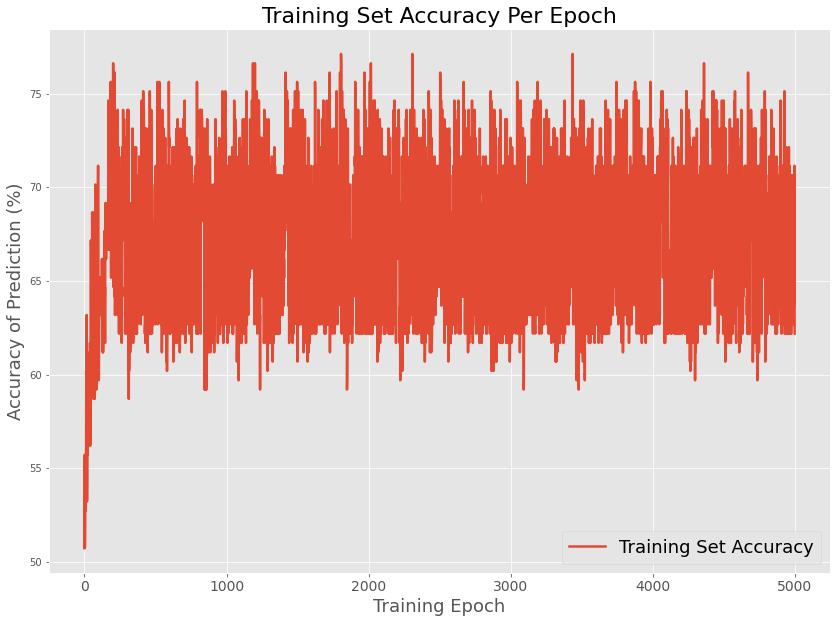

Highest Training Accuracy = 77.11442786069652
The epoch for which these values were obtained = 3436


In [784]:
### = Main Section/Comment
# = Sub Section/Comment

###Initializing variables.
#Initialized weight vector.
w = np.zeros(len(training_data[0][0])) 

#Vote count and y_prime.
c = 0
y_prime = int

#Updated c*w.
voteWeightVector = 0 

#Lists for keeping count of the accuracy.
lforTrain = np.zeros(len(training_data))
# lforVal = np.zeros(len(validation_data))

#Counts for accuracy check.
countforTrain = 0 
countforValid = 0
prediction = 0 
accTrain = 0 
accValid = 0
previousaccTrain = 0
previousaccVal = 0
matchTrain = 0
matchVal = 0 
epochcount = 0
epochcountVal = 0
plotlistTrain = []
plotlistValid = []
xlist = []

###Used to train the Voted Perceptron to convergence.
for epoch in range(5000):

  countforTrain = 0
  countforValid = 0 
  voteWeightVector = 0

  ###The Voted Perceptron algorithm, with 0(1) memory.
  for i in range(len(training_data)):

    #Activation function.
    if np.dot(w, training_data[i][0]) >= 0:
        y_prime = 1
    else:
        y_prime = 0

    #Vote count.
    if y_prime == training_data[i][1]:
        c += 1

    #If y_prime guess is incorrect, then w*c is updated.
    else:
        voteWeightVector += np.dot(w, c)

        c = 1
        signSwitch = [element * (training_data[i][1] - y_prime) for element 
                     in training_data[i][0]]
        w = list(map(add, w, signSwitch))
  
  #Updating the w*c again. Making sure latest w and number
  #...of votes gets accounted for. 
  voteWeightVector += np.dot(w, c)

  ###Training Set - Making a prediction and accuracy count for epoch.
  for k in range(len(training_data)):
    if np.dot(voteWeightVector, training_data[k][0]) >= 0:
      lforTrain[k] = 1
    else:
      lforTrain[k] = 0
    if lforTrain[k] == training_data[k][1]:
      countforTrain += 1
  accTrain = (countforTrain/len(training_data)) * 100

#   ###Validation Set - Making a prediction and accuracy count for epoch.
#   for k in range(len(validation_data)):
#     if np.dot(voteWeightVector, validation_data[k][0]) >= 0:
#       lforVal[k] = 1
#     else:
#       lforVal[k] = 0
#     if lforVal[k] == validation_data[k][1]:
#       countforValid += 1
#   accValid = (countforValid/len(validation_data)) * 100

  ###Lists for plotting training/validation set accuracy per epoch.
  plotlistTrain.append(accTrain)
#   plotlistValid.append(accValid)

  #List for x-axis in plot.
  xlist.append(epoch)

  ###Keeping track of the epoch which has highest training accuracy.
  if accTrain >= previousaccTrain:
    previousaccTrain = accTrain
    matchTrain = accTrain
    epochcount = epoch
    
#   ###Keeping track of the epoch which has highest validation accuracy.
#   if accValid >= previousaccVal:
#     previousaccVal = accValid
#     matchVal = accValid
#     epochcountVal = epoch
  
###Calling the plot.
plt.figure(figsize=(14,10))
plt.plot(xlist, plotlistTrain, label='Training Set Accuracy', lw=2.5)
# plt.plot(xlist, plotlistValid, label='Validation Set Accuracy', lw=2.5)
plt.xticks(fontsize=14)
plt.title('Training Set Accuracy Per Epoch', fontsize=22)
plt.xlabel('Training Epoch', fontsize=18)
plt.ylabel('Accuracy of Prediction (%)', fontsize=18)
plt.legend(fontsize=18)
plt.savefig("ValidSetAccuracyVotedPerceptron.png", bbox_inches="tight")
plt.show()

###Prints the highest validation set accuracy, the corresponding...
#... training accuracy and the epoch.
print("Highest Training Accuracy =", matchTrain)
print("The epoch for which these values were obtained =", epochcount)
# print("Highest Validation Accuracy =", matchVal)
# print("The epoch for which these values were obtained =", epochcountVal)

In [748]:
print(emergent_shape)

(5, 5)


In [749]:
# validation_data_list = collect_training_data_modified_V2(rule_function_check, 300, 20000, "triangle_V2", emergent_shape)

# with open("Saved_Validation_Data_For_NNNRule331267296.txt", "wb") as fp:   #Pickling
#     pickle.dump(validation_data_list, fp)

0
blah 1
blah 2
blah 3
blah 4
blah 5
blah 6
blah 7
blah 8
blah 9
blah 10
10
blah 11
blah 12
blah 13
blah 14
blah 15
blah 16
blah 17
blah 18
blah 19
blah 20
20
blah 21
blah 22
blah 23
blah 24
blah 25
blah 26
blah 27
Got one! 1
30
blah 28
Got one! 2
blah 29
blah 30
blah 31
blah 32
blah 33
blah 34
blah 35
blah 36
40
blah 37
Got one! 3
blah 38
blah 39
blah 40
blah 41
blah 42
blah 43
blah 44
blah 45
50
blah 46
blah 47
blah 48
blah 49
blah 50
blah 51
blah 52
blah 53
blah 54
60
blah 55
blah 56
Got one! 4
blah 57
blah 58
blah 59
blah 60
blah 61
blah 62
blah 63
70
blah 64
Got one! 5
blah 65
blah 66
blah 67
blah 68
blah 69
blah 70
blah 71
blah 72
80
blah 73
blah 74
blah 75
blah 76
blah 77
blah 78
Got one! 6
blah 79
blah 80
blah 81
90
blah 82
blah 83
blah 84
blah 85
blah 86
blah 87
blah 88
blah 89
blah 90
blah 91
100
blah 92
blah 93
blah 94
blah 95
blah 96
blah 97
blah 98
blah 99
blah 100
blah 101
110
blah 102
blah 103
blah 104
blah 105
blah 106
blah 107
blah 108
blah 109
blah 110
blah 111
120
bl

In [81]:
count = 0

with open("Saved_Validation_Data_For_NNNRule331267296.txt", "rb") as fp:   # Unpickling
    validation_data = pickle.load(fp)
    
for item in validation_data:
    if item[1] == 0:
        count += 1
        
print(count)

100


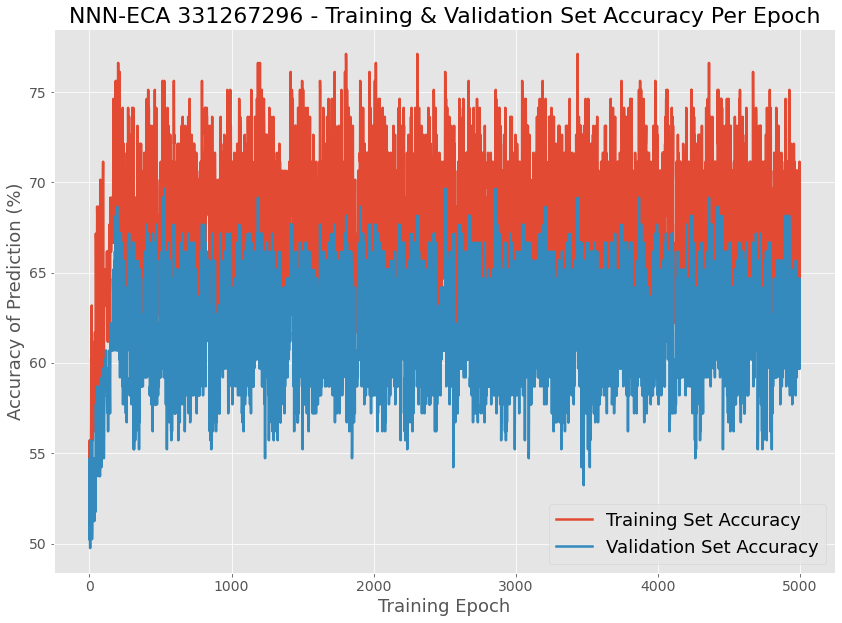

Highest Training Accuracy = 77.11442786069652
The epoch for which these values were obtained = 3436
Highest Validation Accuracy = 69.65174129353234
The epoch for which these values were obtained = 2859


In [84]:
### = Main Section/Comment
# = Sub Section/Comment

###Initializing variables.
#Initialized weight vector.
w = np.zeros(len(training_data[0][0])) 

#Vote count and y_prime.
c = 0
y_prime = int

#Updated c*w.
voteWeightVector = 0 

#Lists for keeping count of the accuracy.
lforTrain = np.zeros(len(training_data))
lforVal = np.zeros(len(validation_data))

#Counts for accuracy check.
countforTrain = 0 
countforValid = 0
prediction = 0 
accTrain = 0 
accValid = 0
previousaccTrain = 0
previousaccVal = 0
matchTrain = 0
matchVal = 0 
epochcount = 0
epochcountVal = 0
plotlistTrain = []
plotlistValid = []
xlist = []

###Used to train the Voted Perceptron to convergence.
for epoch in range(5000):

  countforTrain = 0
  countforValid = 0 
  voteWeightVector = 0

  ###The Voted Perceptron algorithm, with 0(1) memory.
  for i in range(len(training_data)):

    #Activation function.
    if np.dot(w, training_data[i][0]) >= 0:
        y_prime = 1
    else:
        y_prime = 0

    #Vote count.
    if y_prime == training_data[i][1]:
        c += 1

    #If y_prime guess is incorrect, then w*c is updated.
    else:
        voteWeightVector += np.dot(w, c)

        c = 1
        signSwitch = [element * (training_data[i][1] - y_prime) for element 
                     in training_data[i][0]]
        w = list(map(add, w, signSwitch))
  
  #Updating the w*c again. Making sure latest w and number
  #...of votes gets accounted for. 
  voteWeightVector += np.dot(w, c)

  ###Training Set - Making a prediction and accuracy count for epoch.
  for k in range(len(training_data)):
    if np.dot(voteWeightVector, training_data[k][0]) >= 0:
      lforTrain[k] = 1
    else:
      lforTrain[k] = 0
    if lforTrain[k] == training_data[k][1]:
      countforTrain += 1
  accTrain = (countforTrain/len(training_data)) * 100

  ###Validation Set - Making a prediction and accuracy count for epoch.
  for k in range(len(validation_data)):
    if np.dot(voteWeightVector, validation_data[k][0]) >= 0:
      lforVal[k] = 1
    else:
      lforVal[k] = 0
    if lforVal[k] == validation_data[k][1]:
      countforValid += 1
  accValid = (countforValid/len(validation_data)) * 100

  ###Lists for plotting training/validation set accuracy per epoch.
  plotlistTrain.append(accTrain)
  plotlistValid.append(accValid)

  #List for x-axis in plot.
  xlist.append(epoch)

  ###Keeping track of the epoch which has highest training accuracy.
  if accTrain >= previousaccTrain:
    previousaccTrain = accTrain
    matchTrain = accTrain
    epochcount = epoch
    
  ###Keeping track of the epoch which has highest validation accuracy.
  if accValid >= previousaccVal:
    previousaccVal = accValid
    matchVal = accValid
    epochcountVal = epoch
  
###Calling the plot.
plt.figure(figsize=(14,10))
plt.plot(xlist, plotlistTrain, label='Training Set Accuracy', lw=2.5)
plt.plot(xlist, plotlistValid, label='Validation Set Accuracy', lw=2.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('NNN-ECA 331267296 - Training & Validation Set Accuracy Per Epoch', fontsize=22)
plt.xlabel('Training Epoch', fontsize=18)
plt.ylabel('Accuracy of Prediction (%)', fontsize=18)
plt.legend(fontsize=18)
plt.savefig("ValidSetAccuracyVotedPerceptron.png", bbox_inches="tight")
plt.show()

###Prints the highest validation set accuracy, the corresponding...
#... training accuracy and the epoch.
print("Highest Training Accuracy =", matchTrain)
print("The epoch for which these values were obtained =", epochcount)
print("Highest Validation Accuracy =", matchVal)
print("The epoch for which these values were obtained =", epochcountVal)